In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from astropy.io import fits
from astropy.table import Table
from scipy.stats.stats import pearsonr
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
np.random.seed(3791)

#method to use thoughout the exercise 
# From the datacamp statistical thinking in python exercises
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [3]:
# Import galaxies.csv
galaxies = pd.read_csv('galaxies.csv')

In [4]:
# Get the description of the galaxies dataframe
galaxies.describe()

,Seq,ra,dec,x,y,Rmag,e_Rmag,Ap_Rmag,ApD_Rmag,mu_max,MC_z,e_MC_z,MC_z_ml,chi2red,UjMag,e_UjMag,BjMag,e_BjMag,VjMag,e_VjMag,usMag,e_usMag,gsMag,e_gsMag,rsMag,e_rsMag,S280Mag,e_S280Mag,W420F_E,e_W420F_E,W462F_E,e_W462F_E,W485F_D,e_W485F_D,W518F_E,e_W518F_E,W571F_E,e_W571F_E,W604F_E,e_W604F_E,W646F_D,e_W646F_D,W696F_E,e_W696F_E,W753F_E,e_W753F_E,W815F_E,e_W815F_E,W856F_D,e_W856F_D,W914F_D,e_W914F_D,UF_G,e_UF_G,BF_D,e_BF_D,VF_D,e_VF_D,RF_D,e_RF_D,IF_D,e_IF_D
count,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000
mean,32031.989988,53.103185,-27.812231,3996.990690,3822.679154,22.877013,0.044602,23.299326,-0.480696,23.551996,0.660716,0.096852,0.776111,1.269137,-18.515432,0.147874,-18.469470,0.200725,-18.872764,0.217972,-18.668385,0.148902,-18.584857,0.210539,-19.163124,0.223603,-18.611132,0.192622,0.027612,0.003745,0.041034,0.003473,0.036733,0.004380,0.045015,0.004226,0.056532,0.005589,0.063198,0.003966,0.064044,0.007915,0.073702,0.003671,0.081669,0.005835,0.081894,0.007447,0.093600,0.007102,0.093196,0.008108,0.025709,0.003006,0.033998,0.001823,0.047404,0.001736,0.067190,0.000776,0.085599,0.004945
std,18067.286515,0.168712,0.144062,2257.907307,2179.420643,1.106667,0.026406,0.996280,0.513395,0.941022,0.328524,0.127295,0.503929,0.702048,1.923455,0.587412,1.927691,1.245905,1.941073,1.004992,1.923275,0.596859,1.915595,1.004228,1.950311,1.005841,1.960478,0.519188,0.050961,0.001699,0.098724,0.001080,0.098150,0.001342,0.133775,0.001485,0.166020,0.002111,0.193843,0.001715,0.189582,0.002419,0.215692,0.001507,0.234417,0.001757,0.226712,0.002575,0.255815,0.001807,0.261171,0.002314,0.037537,0.000744,0.082987,0.000696,0.144851,0.000838,0.203895,0.000622,0.243303,0.002589
min,28.000000,52.808610,-28.065162,2.755915,2.329053,10.765173,0.000000,17.549747,-14.357697,17.722456,0.002813,0.000262,0.000000,0.129306,-31.328515,0.100072,-31.395583,0.100037,-32.055682,0.100006,-31.461969,0.100072,-31.761922,0.100006,-32.328855,0.100006,-27.869558,0.100193,-0.030357,0.002589,-0.033697,0.002441,-0.009133,0.002867,-0.006709,0.002806,-0.009385,0.003493,-0.004613,0.002620,-0.020517,0.005293,-0.004272,0.002534,-0.008700,0.004051,-0.048792,0.005436,-0.021631,0.004821,-0.014610,0.005809,-0.010006,0.002142,-0.003222,0.001185,-0.002703,0.001203,0.000799,0.000537,0.000088,0.003372
25%,16137.000000,52.959550,-27.940175,2036.078300,1884.456550,22.422863,0.023800,22.842112,-0.652856,23.133142,0.404561,0.025350,0.417831,0.817441,-19.743293,0.106623,-19.712320,0.105233,-20.135760,0.109505,-19.893612,0.106660,-19.830444,0.106631,-20.432413,0.112014,-19.908291,0.116232,0.010426,0.003091,0.014858,0.002941,0.012085,0.003609,0.014369,0.003508,0.017562,0.004382,0.019049,0.003272,0.019373,0.006476,0.021076,0.003088,0.023069,0.004999,0.022117,0.006451,0.027950,0.006109,0.025873,0.006969,0.010468,0.002558,0.011730,0.001485,0.014404,0.001456,0.019037,0.000643,0.022475,0.004069
50%,32464.000000,53.098921,-27.807209,4053.147200,3901.554700,23.217447,0.043000,23.524193,-0.367838,23.745733,0.687348,0.046710,0.705174,1.134658,-18.994874,0.117877,-18.890479,0.120750,-19.233557,0.138117,-19.147485,0.117924,-18.988518,0.129134,-19.501160,0.144694,-19.026564,0.138445,0.017516,0.003431,0.022912,0.003240,0.019210,0.004045,0.021957,0.003918,0.026090,0.0

In [5]:
# Split the data into magnitudes, magnitude errors, photon fluxes,
# photon flux errors, redshifts, and metadata
mags = pd.DataFrame([galaxies['UjMag'],galaxies['BjMag'],galaxies['VjMag'],galaxies['usMag'],
                galaxies['gsMag'],galaxies['rsMag'],galaxies['S280Mag']])
mags = mags.transpose()

Rband = pd.DataFrame([galaxies['Rmag'], galaxies['Ap_Rmag'],galaxies['e_Rmag'], galaxies['ApD_Rmag'], galaxies['mu_max']])
Rband = Rband.transpose()

magsErr = pd.DataFrame([galaxies['e_UjMag'],galaxies['e_BjMag'],galaxies['e_VjMag'],galaxies['e_usMag'],
                galaxies['e_gsMag'],galaxies['e_rsMag'],galaxies['e_S280Mag']])
magsErr = magsErr.transpose()

metadata = pd.DataFrame([galaxies['ra'],galaxies['dec'],galaxies['x'],galaxies['y']
                         ,galaxies['MC_class'],galaxies['MC_z_ml']])
metadata = metadata.transpose()

flux_filter = [col for col in galaxies if col.startswith('W') or col.startswith('UF') or col.startswith('BF')
              or col.startswith('VF') or col.startswith('RF') or col.startswith('IF')]
flux = galaxies[flux_filter]

fluxErr_filter = [col for col in galaxies if col.startswith('e_W') or col.startswith('e_UF') or col.startswith('e_BF')
              or col.startswith('e_VF') or col.startswith('e_RF') or col.startswith('e_IF')]
fluxErr = galaxies[fluxErr_filter]

redshift = pd.DataFrame([galaxies['MC_z'], galaxies['e_MC_z'],
                     galaxies['chi2red'], galaxies['e_MC_z']/galaxies['MC_z']])
redshift = redshift.transpose()
redshift.columns = ['MC_z','e_MC_z','chi2red','e_Frac_z']

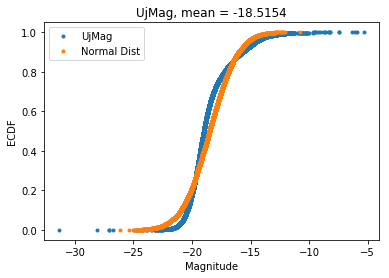

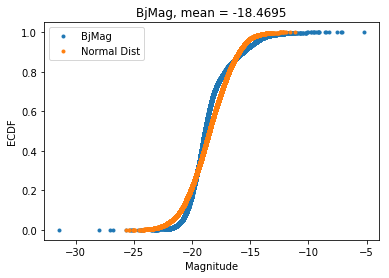

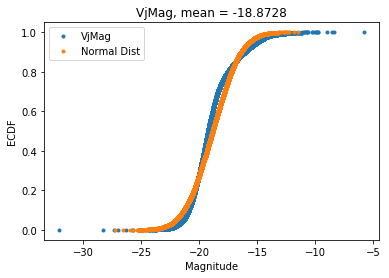

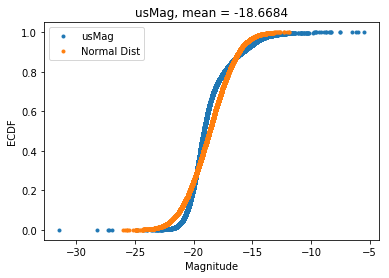

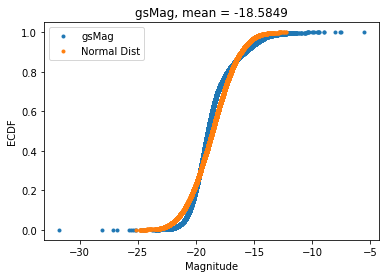

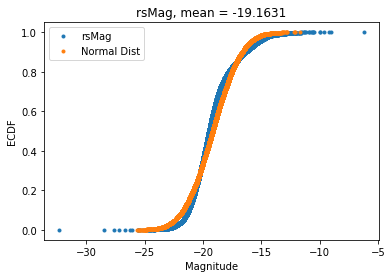

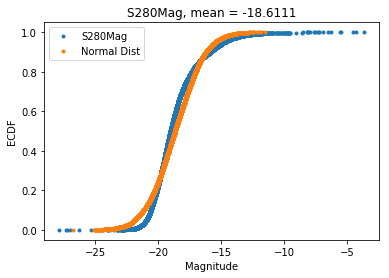

In [7]:
#Perform EDA with a histogram and ECDF
#look at ECDFs with normal distributions for magnitudes

for column in mags:
    x, y = ecdf(mags[column])
    plt.plot(x, y, marker='.', linestyle='none', label=column)
    mean = np.mean(mags[column])
    norm = np.random.normal(mean, np.std(mags[column]), 10000)
    x_norm, y_norm = ecdf(norm)
    plt.plot(x_norm, y_norm, marker='.', linestyle='none', label='Normal Dist')
    plt.title('{}, mean = {:.4f}'.format(column, mean))
    #plt.axvline(mean, color ='k',linestyle='dashed', linewidth=1)
    plt.ylabel('ECDF')
    plt.xlabel('Magnitude')
    plt.legend()
    plt.show()

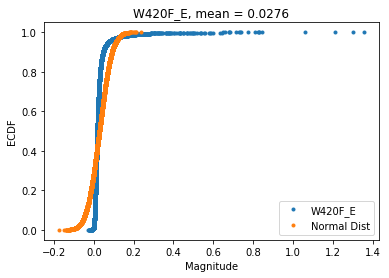

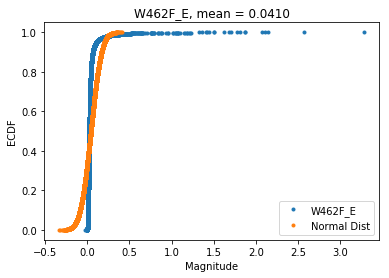

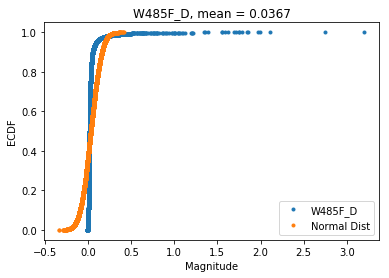

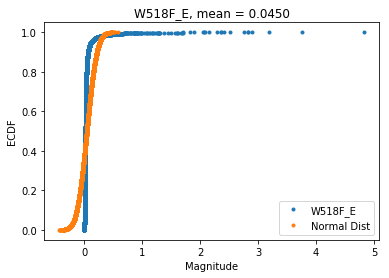

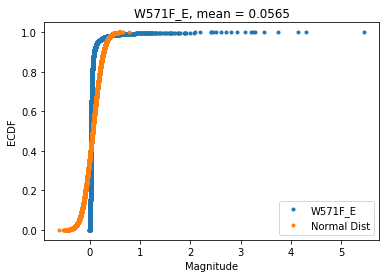

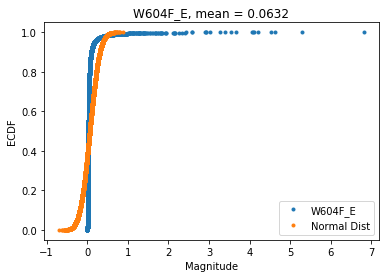

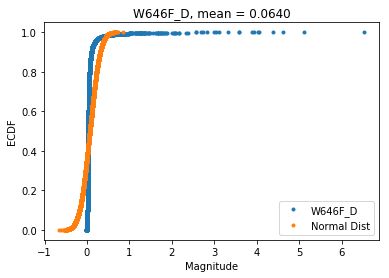

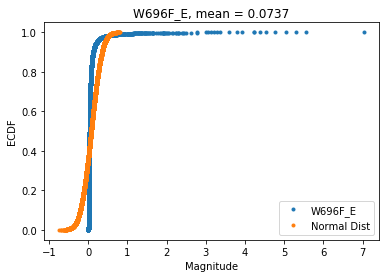

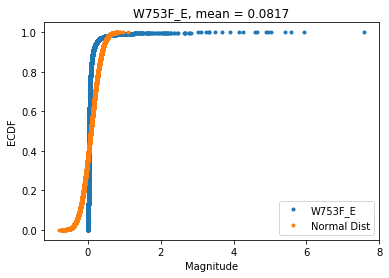

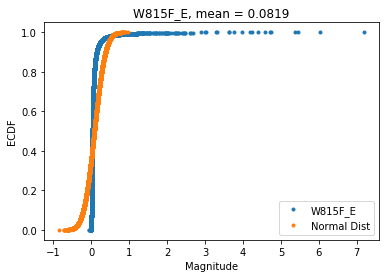

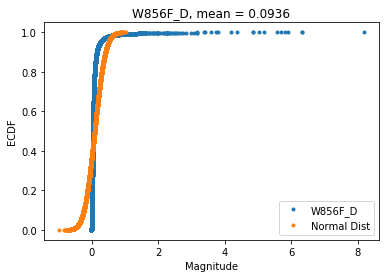

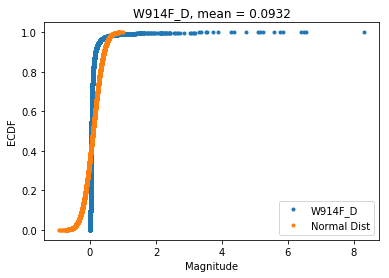

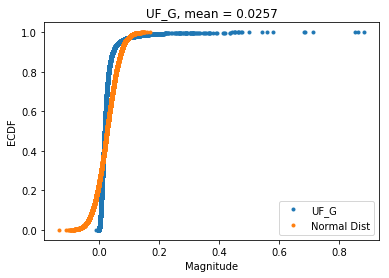

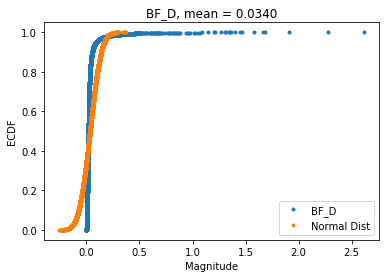

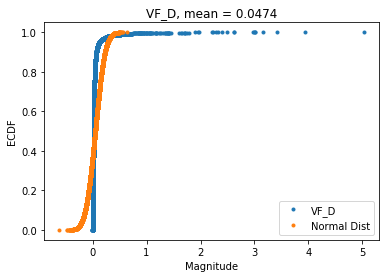

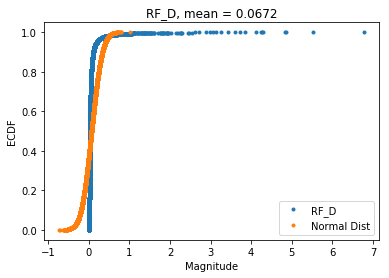

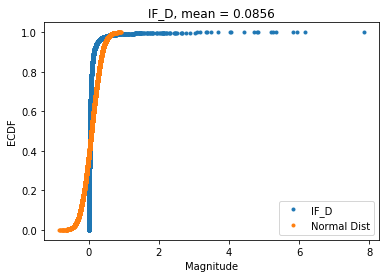

In [8]:
for column in flux:
    x, y = ecdf(flux[column])
    plt.plot(x, y, marker='.', linestyle='none', label=column)
    mean = np.mean(flux[column])
    norm = np.random.normal(mean, np.std(flux[column]), 10000)
    x_norm, y_norm = ecdf(norm)
    plt.plot(x_norm, y_norm, marker='.', linestyle='none', label='Normal Dist')
    plt.title('{}, mean = {:.4f}'.format(column, mean))
    #plt.axvline(mean, color ='k',linestyle='dashed', linewidth=1)
    plt.ylabel('ECDF')
    plt.xlabel('Magnitude')
    plt.legend()
    plt.show()

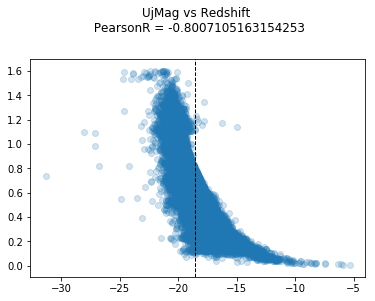

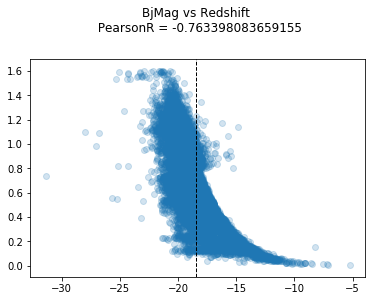

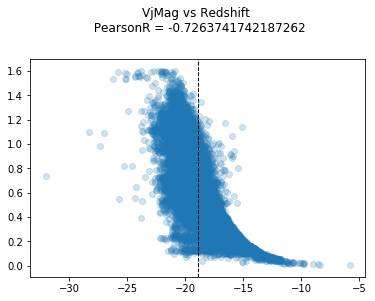

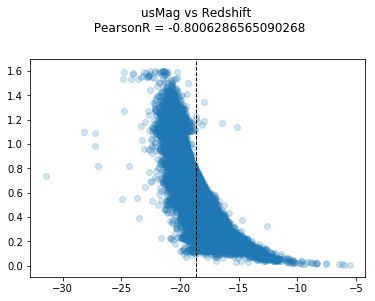

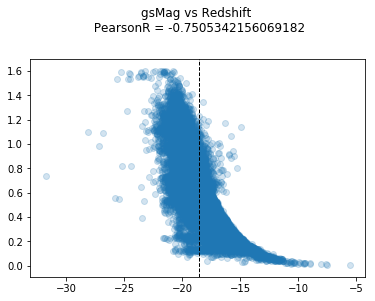

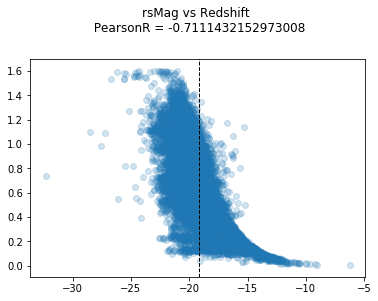

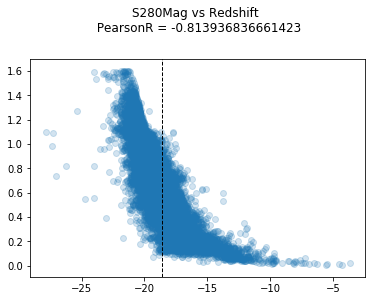

In [49]:
#correlations between high and low redshifts with magnitudes
magRedPairs = []

for column in mags:
    (r, p) = pearsonr(mags[column], redshift['MC_z'])
    if ((r>0.5) or (r<-0.5)) and (p!=1) and (r!=1):
        magRedPairs.append((column,r))
            
#plot all of these pairings
#mags['redshift'] = redshift['MC_z']
for i in range(7):
    plt.scatter(x=mags[magRedPairs[i][0]], y=redshift['MC_z'], alpha=0.2)
    mean = np.mean(mags[magRedPairs[i][0]])
    plt.axvline(mean, color ='k',linestyle='dashed', linewidth=1)
    plt.title(magRedPairs[i][0] + ' vs Redshift \n PearsonR = ' + str(magRedPairs[i][1]),
             y = 1.1)
    plt.show()


On many of these scatter plots, the magnitude is lower than the mean at around redshift 0.8. Test the correlation that higher redshifts correspond to a lower magnitude

In [50]:
low_filter = redshift['MC_z'] <=0.8
high_filter = redshift['MC_z'] > 0.8
low_red = mags[low_filter]
high_red = mags[high_filter]


In [7]:
def draw_bs_reds(column, low, high):
    #make arrays from the excess readmission ratios of high and low
    low_red_arr = np.array(low[column])
    high_red_arr = np.array(high[column])

    #draw bs_replicates from both samples and take their difference
    #to find the difference of the averages of these samples
    bs_replicates_l = draw_bs_reps(low_red_arr, np.mean, 10000)
    bs_replicates_h = draw_bs_reps(high_red_arr, np.mean, 10000)
    bs_replicates = bs_replicates_l - bs_replicates_h

    #calculate the confidence intervals
    conf_int = np.percentile(bs_replicates, [2.5,97.5])

    print('The mean difference in {} between small and large redshift is {:.5f}'.format(column,np.mean(bs_replicates)))
    print('95% confidence interval = {:.5f}, {:.5f}'.format(conf_int[0], conf_int[1]))

    # Plot the histogram of the replicates, the mean, and the 95% confidence interval
    plt.hist(bs_replicates, bins=50, normed=True)
    plt.axvline(np.mean(bs_replicates), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(conf_int[0], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(conf_int[1], color='k', linestyle='dashed', linewidth=1)

    plt.xlabel('Difference for High and Low Redshifts')
    plt.ylabel('PDF')
    plt.title(column)

    plt.show()


    #Find the p-value, assuming the null hypothesis that the difference in means is 0
    mean = np.mean(low_red_arr) - np.mean(high_red_arr)
    std = np.sqrt(np.std(low_red_arr)**2 - np.std(high_red_arr)**2)
    print(mean)
    print(np.mean(low_red_arr))
    print(np.mean(high_red_arr))
    low_shifted = low_red_arr + mean - np.mean(low_red_arr)
    high_shifted = high_red_arr + mean - np.mean(high_red_arr)

    bs_replicates_l = draw_bs_reps(low_shifted, np.mean, 10000)
    bs_replicates_h = draw_bs_reps(high_shifted, np.mean, 10000)
    bs_replicates = bs_replicates_l - bs_replicates_h

    if mean >= 0:
        p = np.sum(bs_replicates >= mean) / 10000
    else:
        p = np.sum(bs_replicates <= mean) / 10000

    print('p = ', p)
    #print('The p value of {} suggests that the null hypothesis should be rejected.'.format(p))


The mean difference in UjMag between small and large redshift is 2.14808
95% confidence interval = 2.10425, 2.19354


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


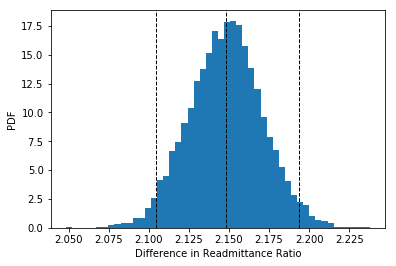

2.1479164467271694
-17.767277939277882
-19.91519438600505
p =  0.0
The mean difference in BjMag between small and large redshift is 1.95555
95% confidence interval = 1.90818, 2.00206


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


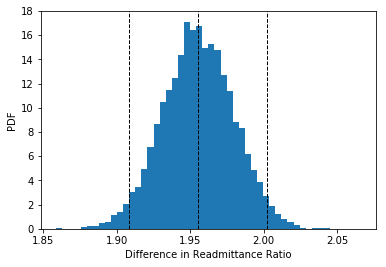

1.9561134370488737
-17.788123650925577
-19.74423708797445
p =  0.0
The mean difference in VjMag between small and large redshift is 1.87875
95% confidence interval = 1.82894, 1.92931


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


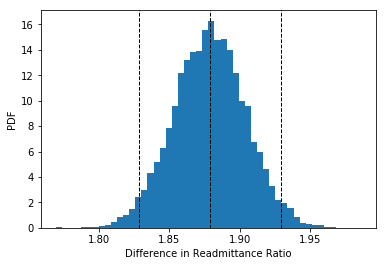

1.8785322372044853
-18.218440994555692
-20.096973231760177
p =  0.0
The mean difference in usMag between small and large redshift is 2.14894
95% confidence interval = 2.10489, 2.19370


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


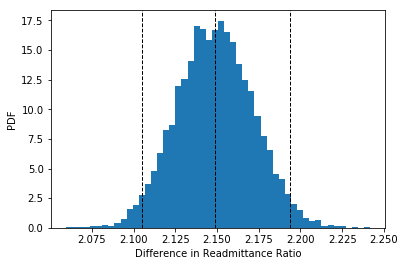

2.1488369857168337
-17.919910716365525
-20.06874770208236
p =  0.0
The mean difference in gsMag between small and large redshift is 1.93174
95% confidence interval = 1.88339, 1.97952


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


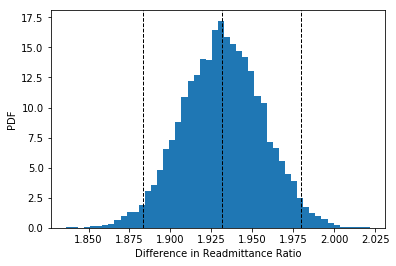

1.9317635356048939
-17.911992557108125
-19.84375609271302
p =  0.0
The mean difference in rsMag between small and large redshift is 1.83503
95% confidence interval = 1.78402, 1.88506


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


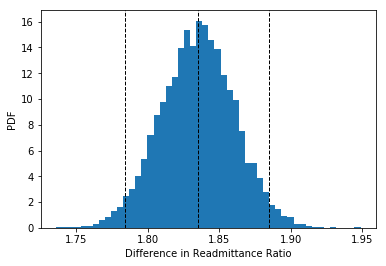

1.835371982750999
-18.523834092478484
-20.359206075229483
p =  0.0
The mean difference in S280Mag between small and large redshift is 2.28269
95% confidence interval = 2.23729, 2.32811


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


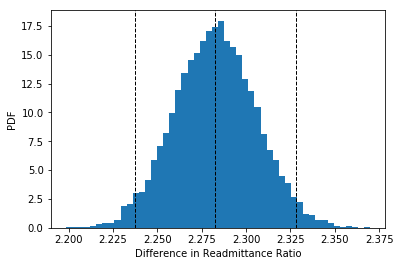

2.2829618541883754
-17.815939413013194
-20.09890126720157
p =  0.0


In [52]:
#look at the 95% confidence intervals and p-values
#for all magnitudes split by above or below r=0.8
for column in mags:   
    draw_bs_reds(column)


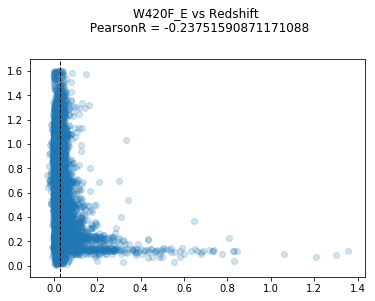

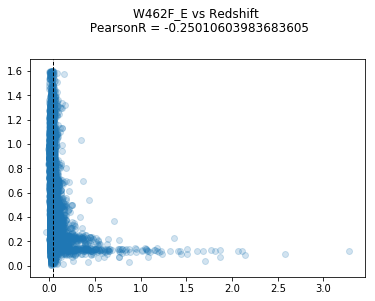

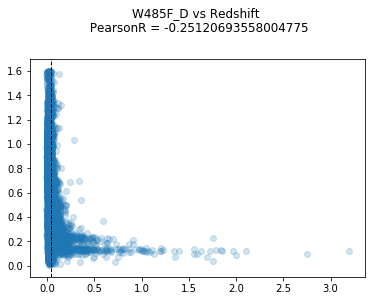

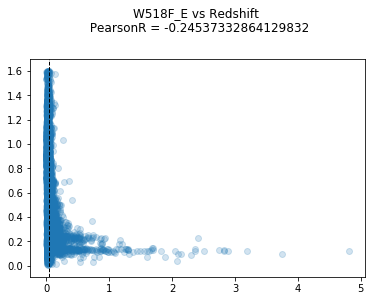

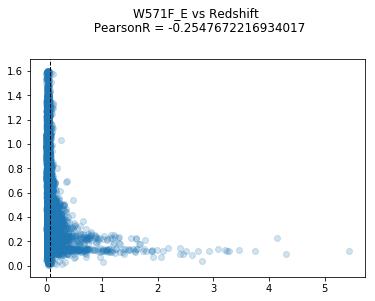

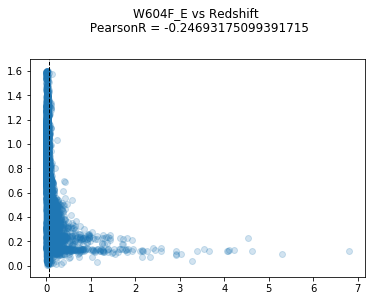

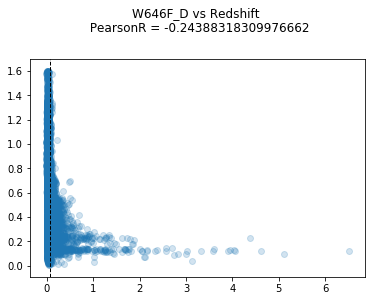

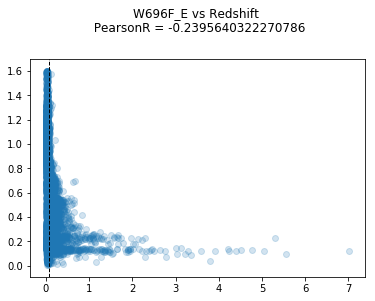

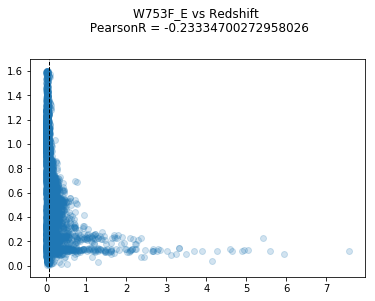

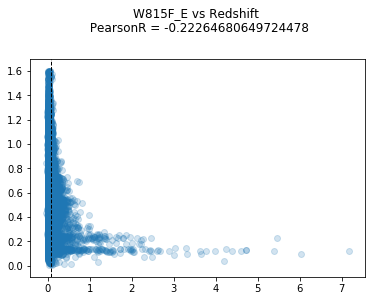

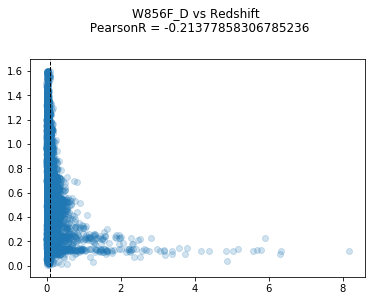

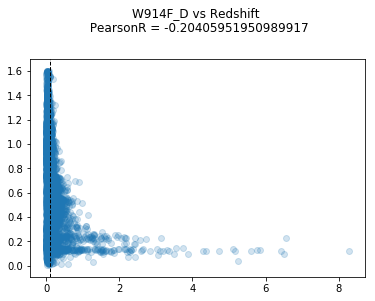

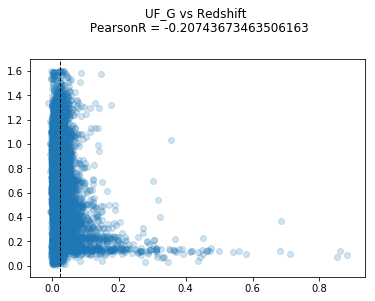

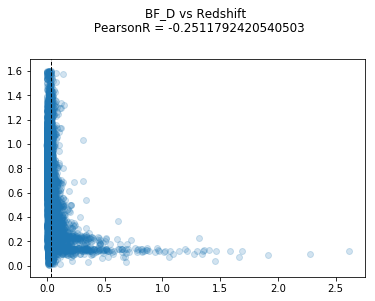

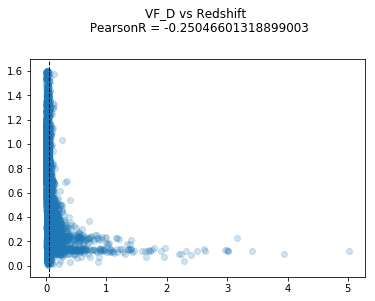

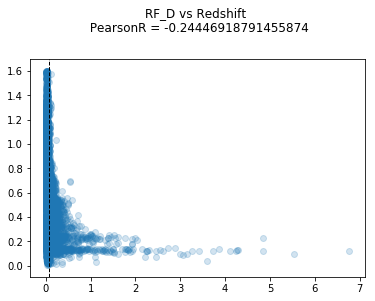

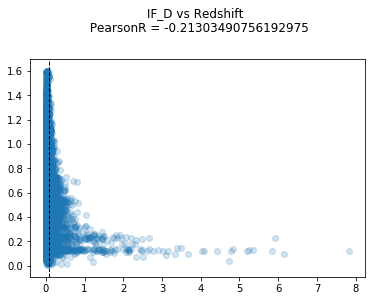

In [60]:
#correlations between high and low redshifts with fluxes
fluxRedPairs = []
for column in flux:
    (r, p) = pearsonr(flux[column], redshift['MC_z'])
    fluxRedPairs.append((column,r))
    
for i in range(len(fluxRedPairs)):
    plt.scatter(x=flux[fluxRedPairs[i][0]], y=redshift['MC_z'], alpha=0.2)
    mean = np.mean(flux[fluxRedPairs[i][0]])
    plt.axvline(mean, color ='k',linestyle='dashed', linewidth=1)
    plt.title(fluxRedPairs[i][0] + ' vs Redshift \n PearsonR = ' + str(fluxRedPairs[i][1]),
             y = 1.1)
    plt.show()


In [66]:
low_filter = redshift['MC_z'] <=0.4
high_filter = redshift['MC_z'] > 0.4
low_red = flux[low_filter]
high_red = flux[high_filter]

The mean difference in W420F_E between small and large redshift is 0.03090
95% confidence interval = 0.02785, 0.03410


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


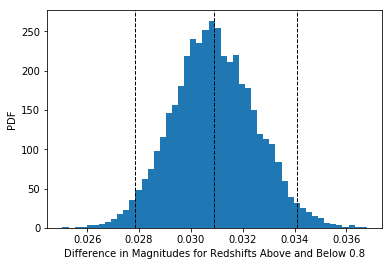

0.03091598744499072
0.050902532924184216
0.019986545479193495
p =  0.0
The mean difference in W462F_E between small and large redshift is 0.06113
95% confidence interval = 0.05504, 0.06757


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


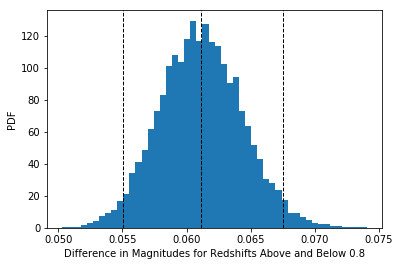

0.06114027242078861
0.08709364512378653
0.025953372702997926
p =  0.0
The mean difference in W485F_D between small and large redshift is 0.06140
95% confidence interval = 0.05543, 0.06781


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


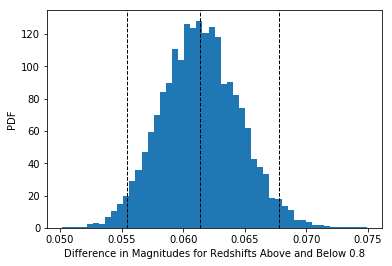

0.06131175969337703
0.08292219418928186
0.021610434495904832
p =  0.0
The mean difference in W518F_E between small and large redshift is 0.08225
95% confidence interval = 0.07403, 0.09094


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


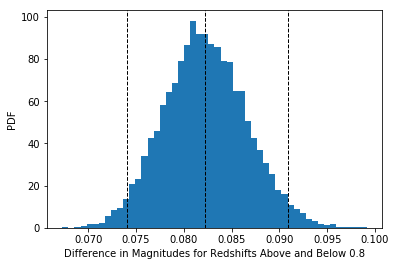

0.082251180344578
0.1069786225492109
0.0247274422046329
p =  0.0
The mean difference in W571F_E between small and large redshift is 0.10268
95% confidence interval = 0.09250, 0.11358


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


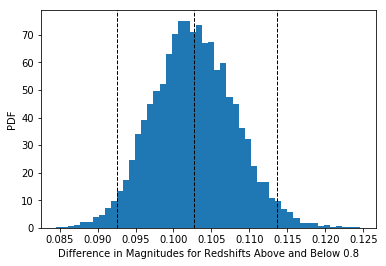

0.10270479091959685
0.13390405552242565
0.0311992646028288
p =  0.0
The mean difference in W604F_E between small and large redshift is 0.11310
95% confidence interval = 0.10106, 0.12594


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


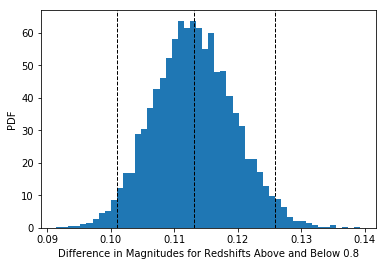

0.11312611122850169
0.14842099822654273
0.03529488699804104
p =  0.0
The mean difference in W646F_D between small and large redshift is 0.10441
95% confidence interval = 0.09267, 0.11664


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


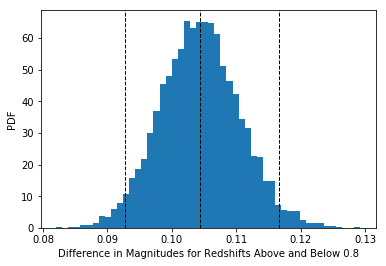

0.10447682596835536
0.1427507666804116
0.038273940712056226
p =  0.0
The mean difference in W696F_E between small and large redshift is 0.11095
95% confidence interval = 0.09774, 0.12515


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


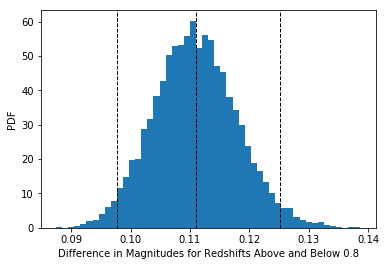

0.11092973224262229
0.15726999475830258
0.0463402625156803
p =  0.0
The mean difference in W753F_E between small and large redshift is 0.11520
95% confidence interval = 0.10073, 0.13010


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


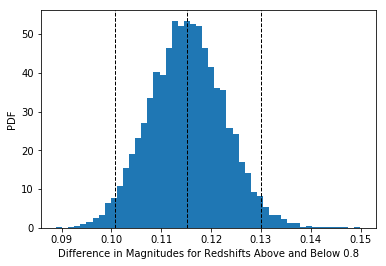

0.1151800809224843
0.1684386280044394
0.053258547081955106
p =  0.0
The mean difference in W815F_E between small and large redshift is 0.10561
95% confidence interval = 0.09153, 0.12051


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


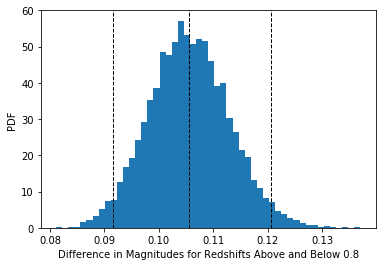

0.10574199257509734
0.16155401651109566
0.05581202393599833
p =  0.0
The mean difference in W856F_D between small and large redshift is 0.11572
95% confidence interval = 0.10034, 0.13239


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


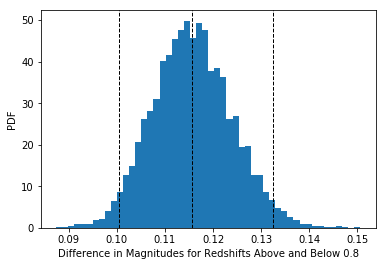

0.11573989214555837
0.18079178748719843
0.06505189534164006
p =  0.0
The mean difference in W914F_D between small and large redshift is 0.11365
95% confidence interval = 0.09728, 0.13100


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


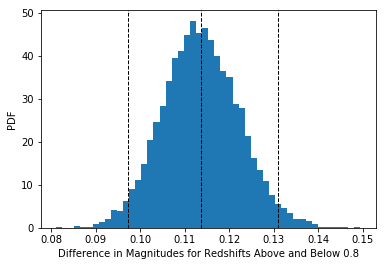

0.11362564364841798
0.17879546144781436
0.06516981779939637
p =  0.0
The mean difference in UF_G between small and large redshift is 0.02019
95% confidence interval = 0.01797, 0.02246


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


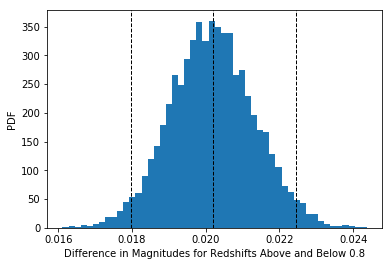

0.020203067337160013
0.04092882804631479
0.02072576070915478
p =  0.0
The mean difference in BF_D between small and large redshift is 0.05188
95% confidence interval = 0.04689, 0.05720


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


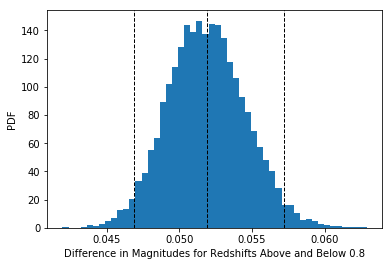

0.0519154152118687
0.07310800253894408
0.021192587327075373
p =  0.0
The mean difference in VF_D between small and large redshift is 0.08979
95% confidence interval = 0.08088, 0.09925


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


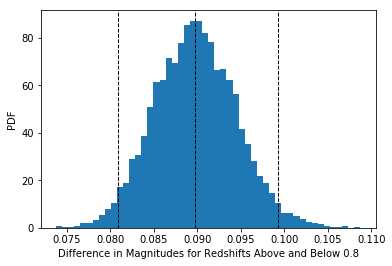

0.08980602841287395
0.11505886215019784
0.02525283373732389
p =  0.0
The mean difference in RF_D between small and large redshift is 0.11162
95% confidence interval = 0.09932, 0.12463


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


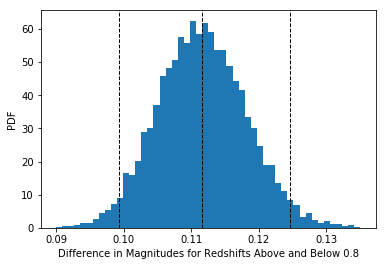

0.11171074708152406
0.1513463394635538
0.039635592382029745
p =  0.0
The mean difference in IF_D between small and large redshift is 0.10937
95% confidence interval = 0.09420, 0.12535


/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


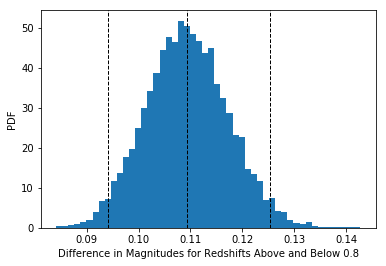

0.1093047635574663
0.16794312737890718
0.05863836382144089
p =  0.0


In [67]:
#look at the 95% confidence intervals and p-values
#for all fluxes split by above or below r=0.4

for column in flux:   
    draw_bs_reds(column, low_red, high_red)

In [8]:
#plot confidence intervals + means for different redshift bins 
#for the same flux on top of each other?

def get_conf_int(column, low, high):
    #make arrays from the excess readmission ratios of high and low
    low_red_arr = np.array(low[column])
    high_red_arr = np.array(high[column])

    #draw bs_replicates from both samples and take their difference
    #to find the difference of the averages of these samples
    bs_replicates_l = draw_bs_reps(low_red_arr, np.mean, 10000)
    bs_replicates_h = draw_bs_reps(high_red_arr, np.mean, 10000)
    bs_replicates = bs_replicates_l - bs_replicates_h

    #calculate the confidence intervals
    conf_int = np.percentile(bs_replicates, [2.5,97.5])

    #Find the p-value, assuming the null hypothesis that the difference in means is 0
    mean = np.mean(low_red_arr) - np.mean(high_red_arr)
    std = np.sqrt(np.std(low_red_arr)**2 - np.std(high_red_arr)**2)
    low_shifted = low_red_arr + mean - np.mean(low_red_arr)
    high_shifted = high_red_arr + mean - np.mean(high_red_arr)

    bs_replicates_l = draw_bs_reps(low_shifted, np.mean, 10000)
    bs_replicates_h = draw_bs_reps(high_shifted, np.mean, 10000)
    bs_replicates = bs_replicates_l - bs_replicates_h

    if mean >= 0:
        p = np.sum(bs_replicates >= mean) / 10000
    else:
        p = np.sum(bs_replicates <= mean) / 10000

    return (conf_int[0], conf_int[1], p)

W420F_E


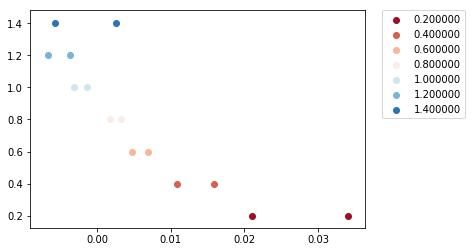

W462F_E


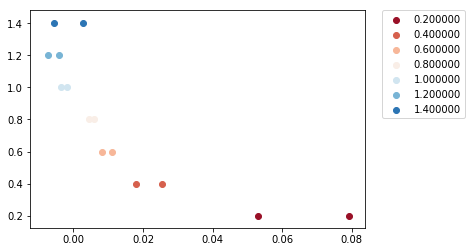

W485F_D


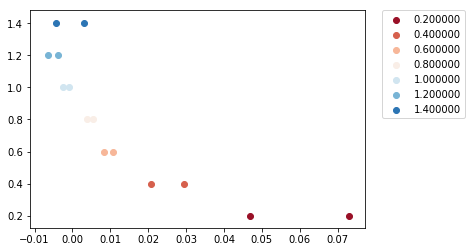

W518F_E


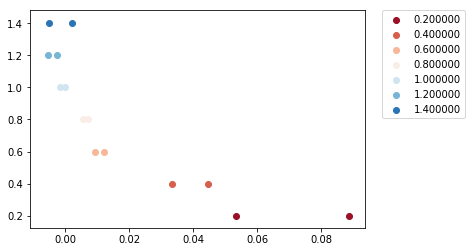

W571F_E


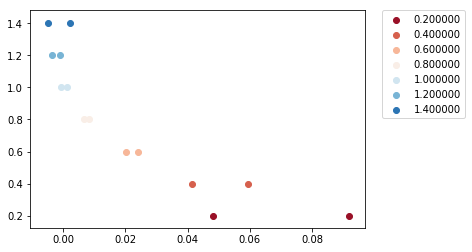

W604F_E


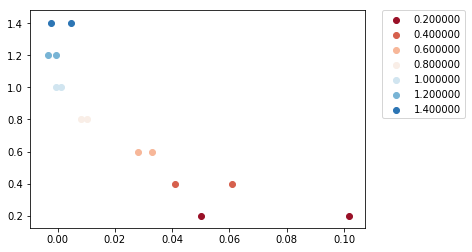

W646F_D


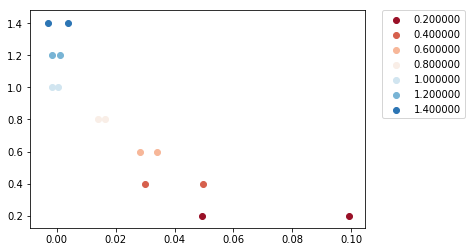

W696F_E


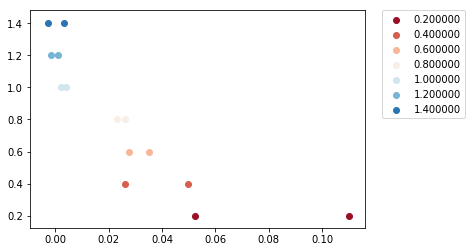

W753F_E


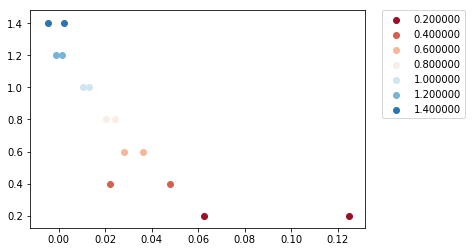

W815F_E


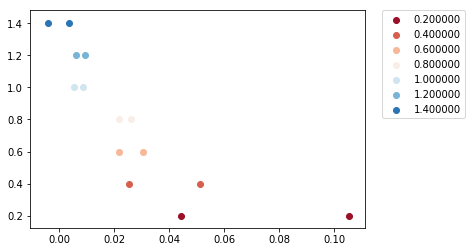

W856F_D


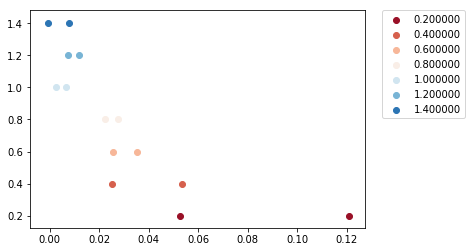

W914F_D


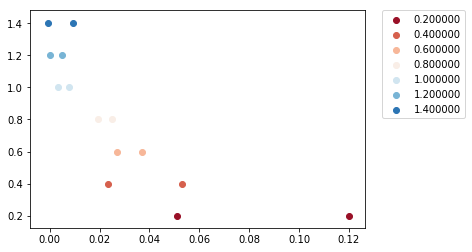

UF_G


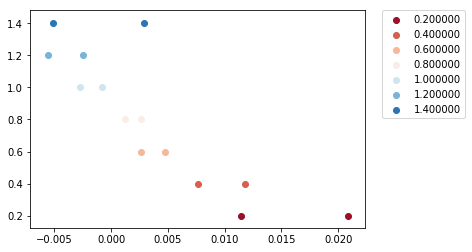

BF_D


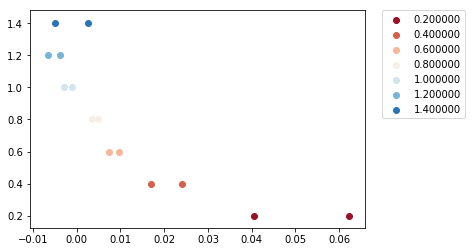

VF_D


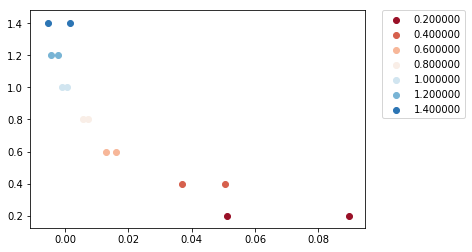

RF_D


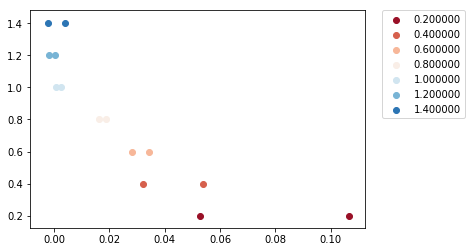

IF_D


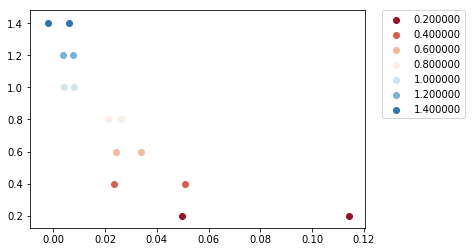

In [26]:
for column in flux:
    print(column)
    color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
    for i in range(0,13,2):
        c=next(color)
        c=next(color)
        low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
        high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
        low_red = flux[low_filter]
        high_red = flux[high_filter]
        b, t, p = get_conf_int(column, low_red, high_red)
        plt.scatter(b,(i/10)+0.2, color=c, label='{:1f}'.format((i/10)+0.2))
        plt.scatter(t, (i/10)+0.2,color=c)
        #plt.axvline(p, linestyle='dashed', linewidth=1, label=column)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
    plt.title('95% Confidence Intervals {}'.format(column))    
    plt.show()
        
        
        

In [ ]:
#same process for magnitudes

UjMag


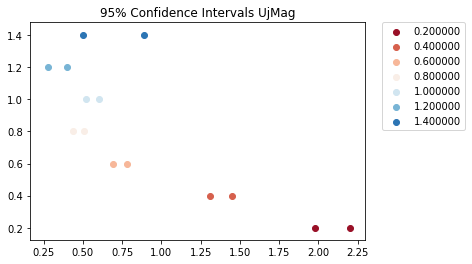

BjMag


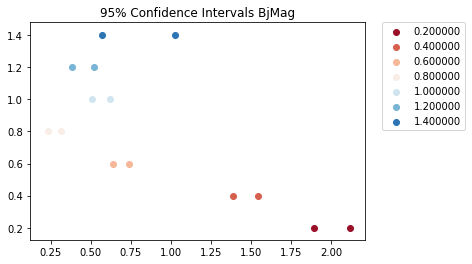

VjMag


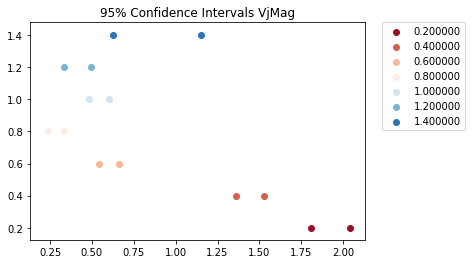

usMag


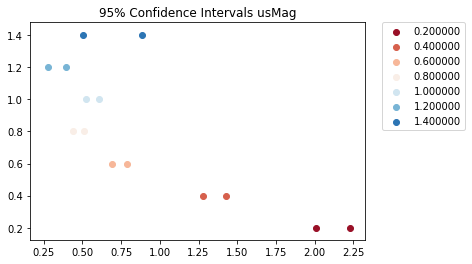

gsMag


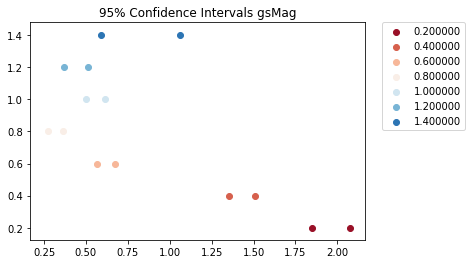

rsMag


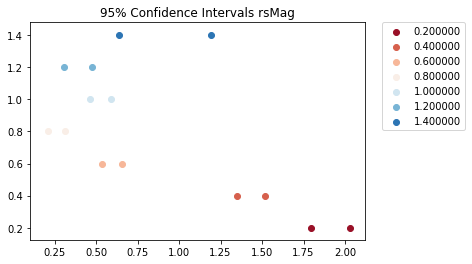

S280Mag


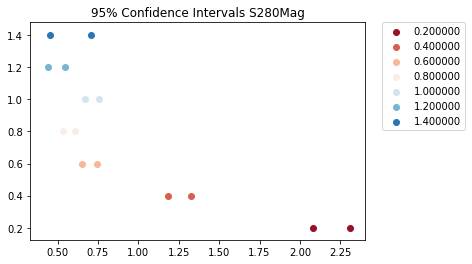

In [27]:
for column in mags:
    color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
    for i in range(0,13,2):
        c=next(color)
        c=next(color)
        low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
        high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
        low_red = mags[low_filter]
        high_red = mags[high_filter]
        b, t, p = get_conf_int(column, low_red, high_red)
        plt.scatter(b,(i/10)+0.2, color=c, label='{:1f}'.format((i/10)+0.2))
        plt.scatter(t, (i/10)+0.2,color=c)
        #plt.axvline(p, linestyle='dashed', linewidth=1, label=column)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
    plt.title('95% Confidence Intervals {}'.format(column))    
    plt.show()

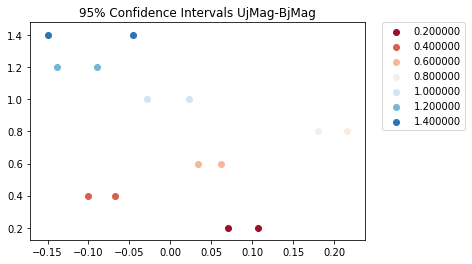

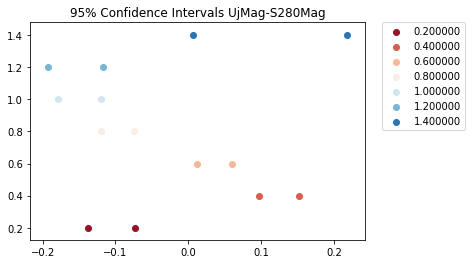

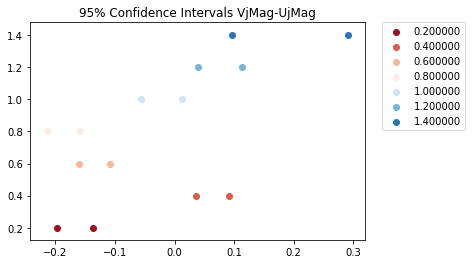

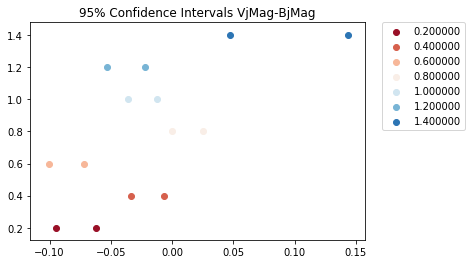

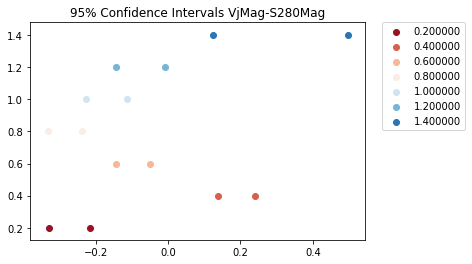

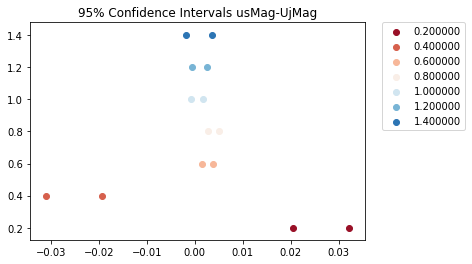

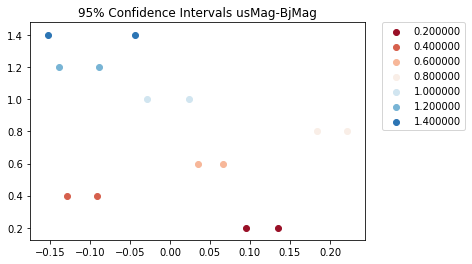

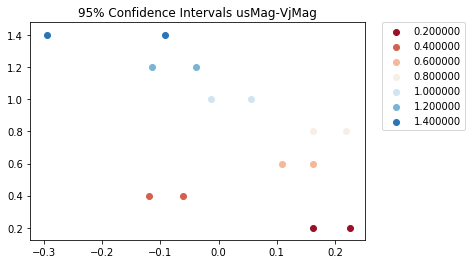

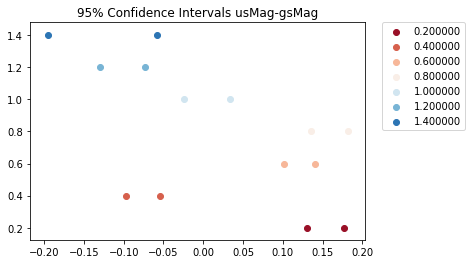

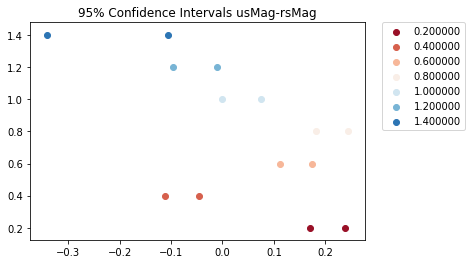

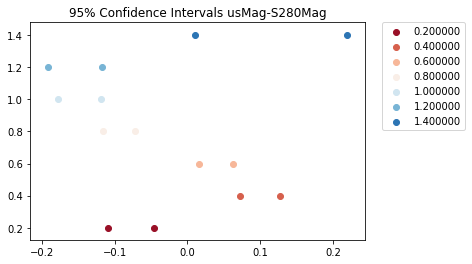

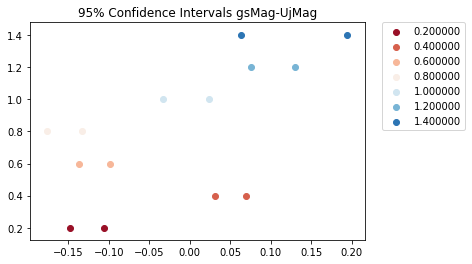

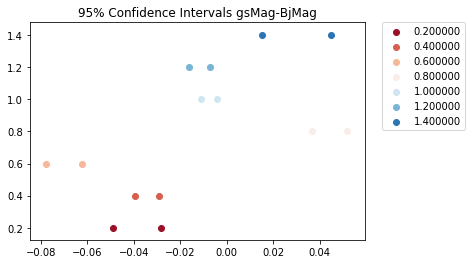

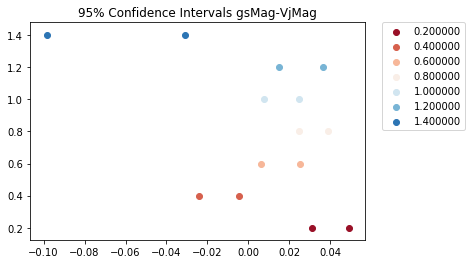

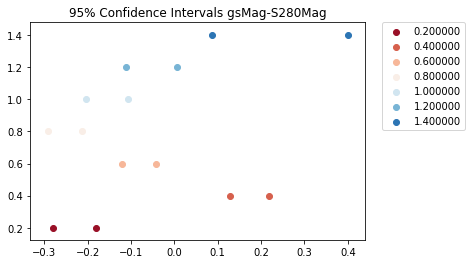

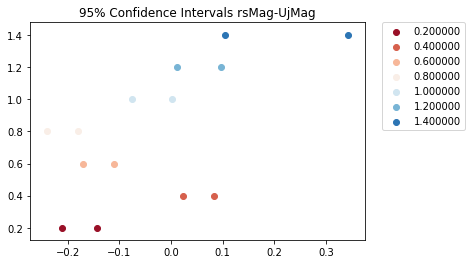

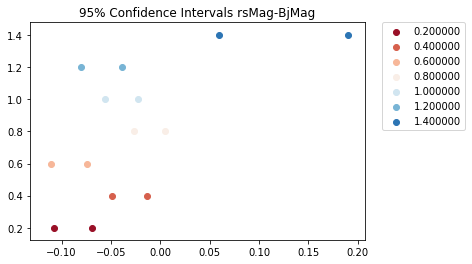

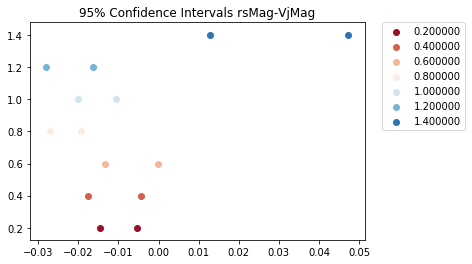

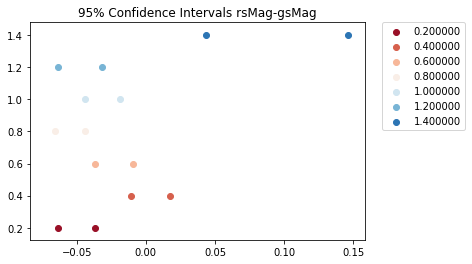

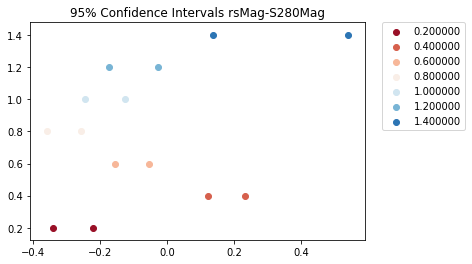

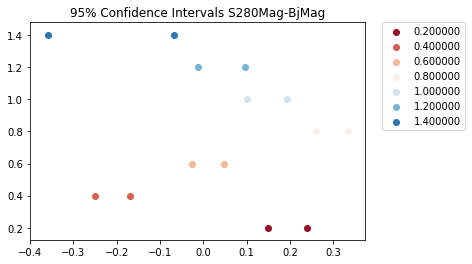

In [9]:
# look at the differences between the magnitudes vs redshifts
magDiffs = pd.DataFrame()
for column in mags:
    for column2 in mags:
        if (column > column2):
            magDiffs[column + '-' + column2] = mags[column] - mags[column2]
            
for column in magDiffs:
    color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
    for i in range(0,13,2):
        c=next(color)
        c=next(color)
        low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
        high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
        low_red = magDiffs[low_filter]
        high_red = magDiffs[high_filter]
        b, t, p = get_conf_int(column, low_red, high_red)
        plt.scatter(b,(i/10)+0.2, color=c, label='{:1f}'.format((i/10)+0.2))
        plt.scatter(t, (i/10)+0.2,color=c)
        #plt.axvline(p, linestyle='dashed', linewidth=1, label=column)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
    plt.title('95% Confidence Intervals {}'.format(column))    
    plt.show()

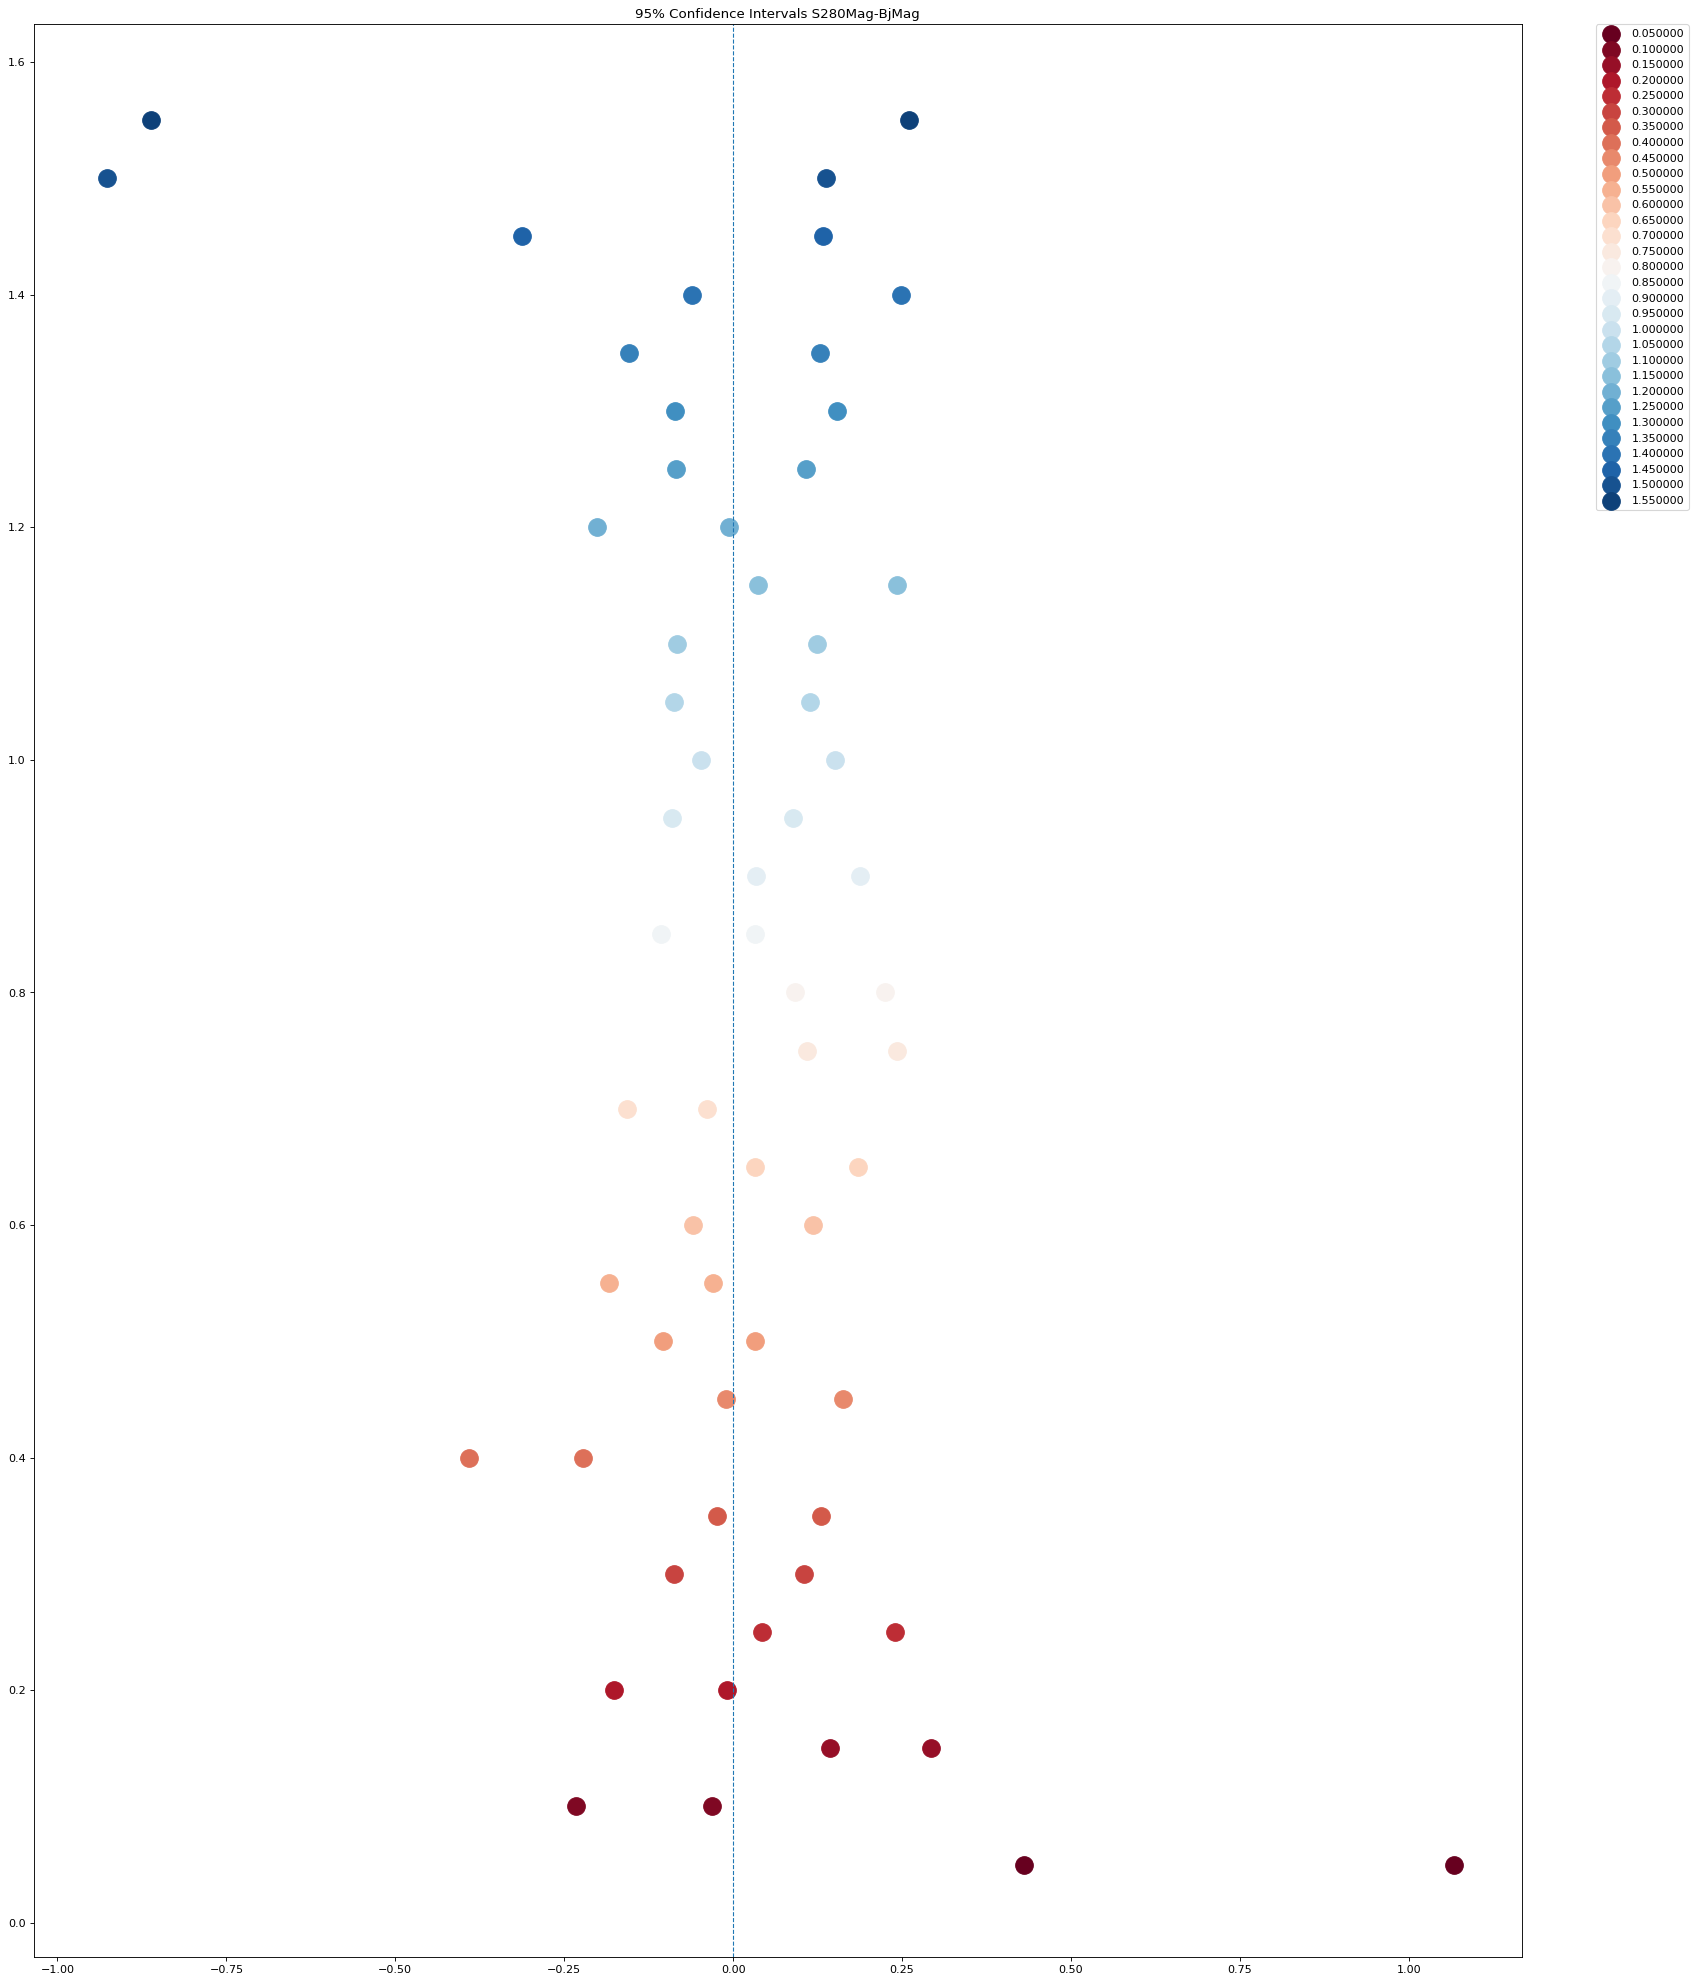

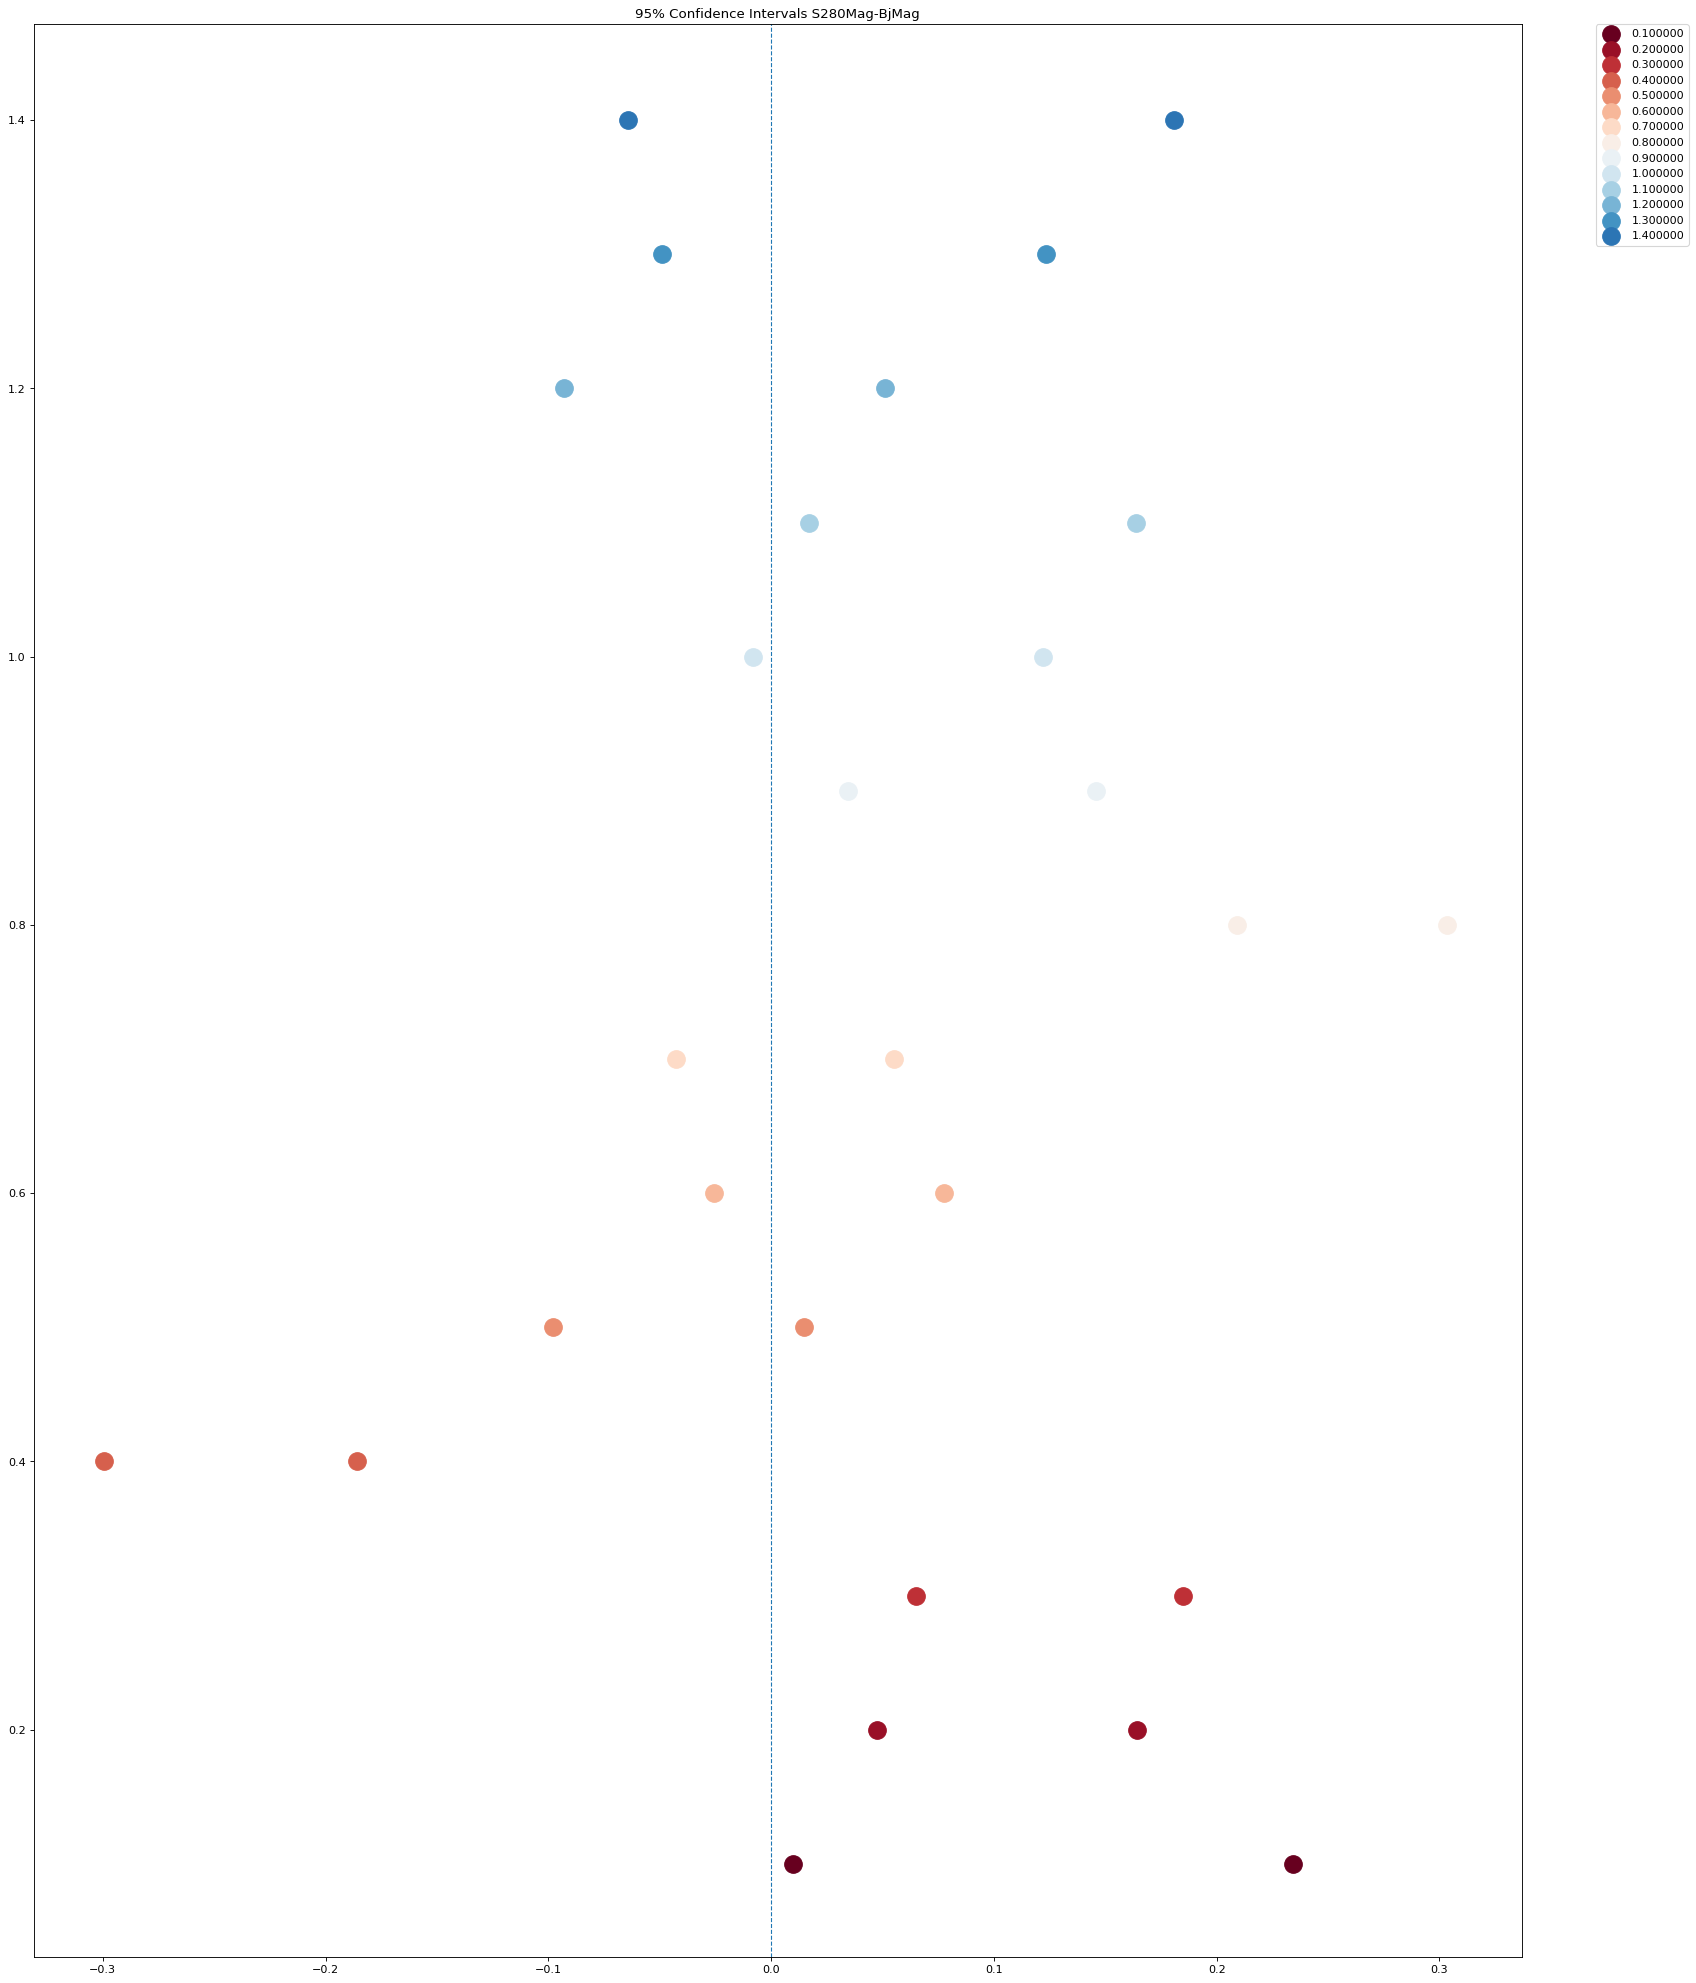

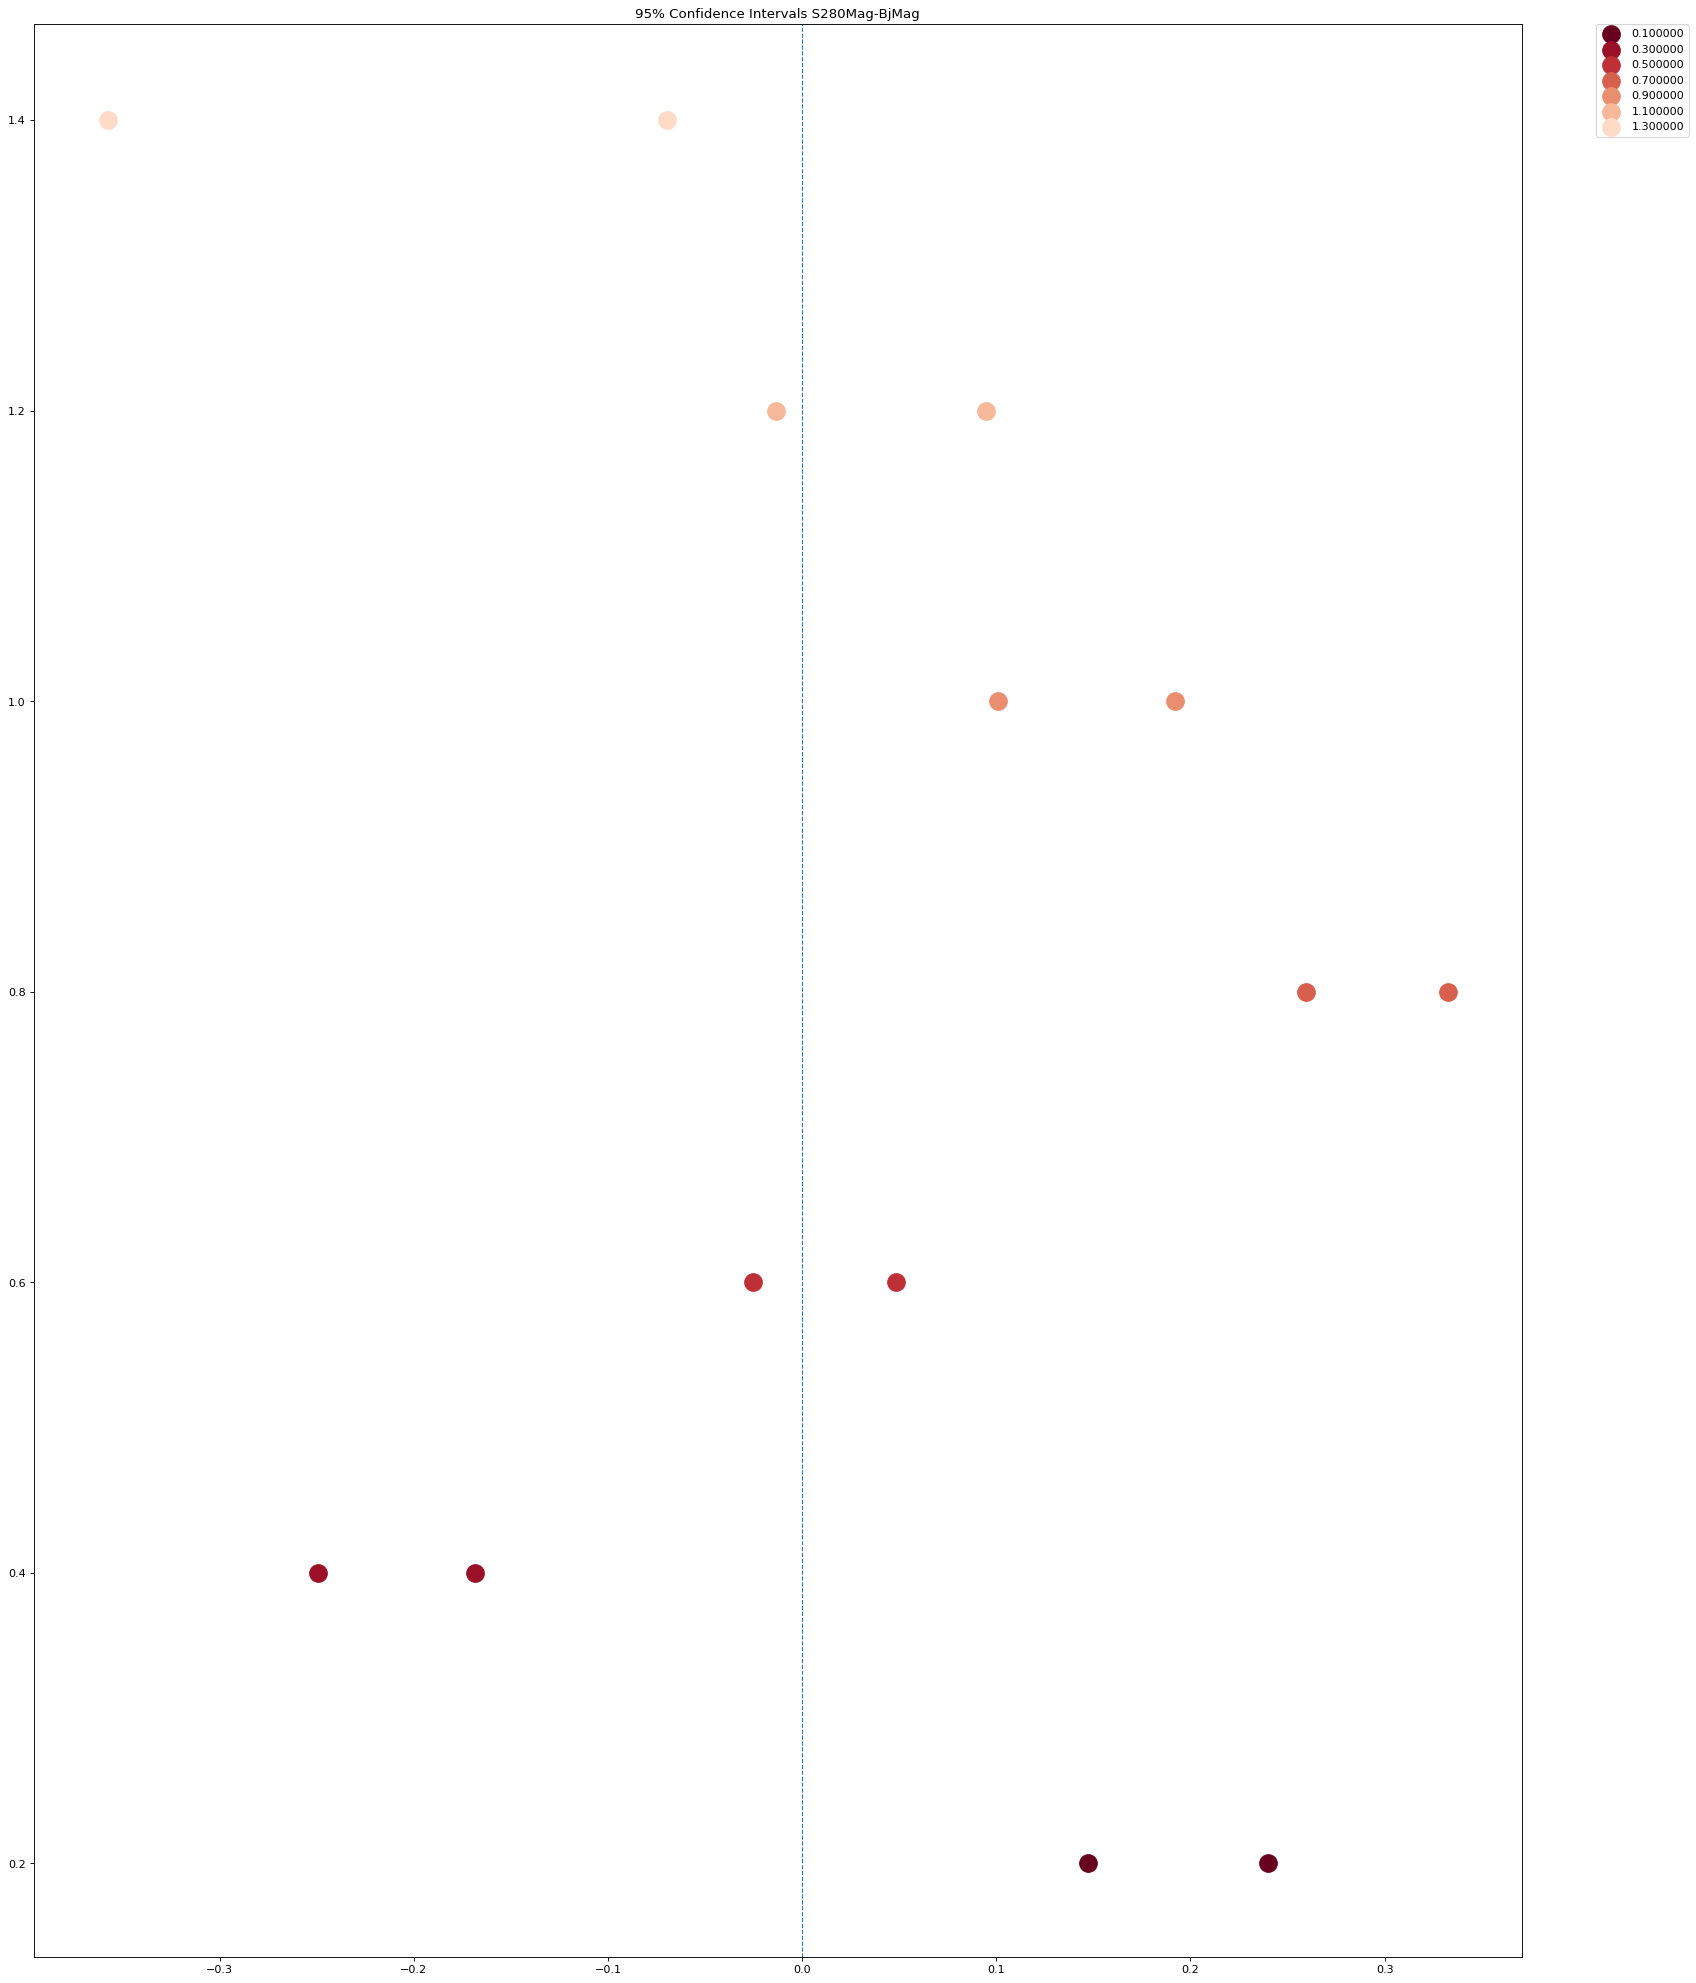

In [41]:
#look at the 95% confidence intervals for bins of 005, 0.1, and 0.2
#on magnitude differences, magnitudes, and photon fluxes 
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('UjMag-BjMag', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag-BjMag')    
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('UjMag-BjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag-BjMag')    
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('UjMag-BjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag-BjMag')
plt.show()

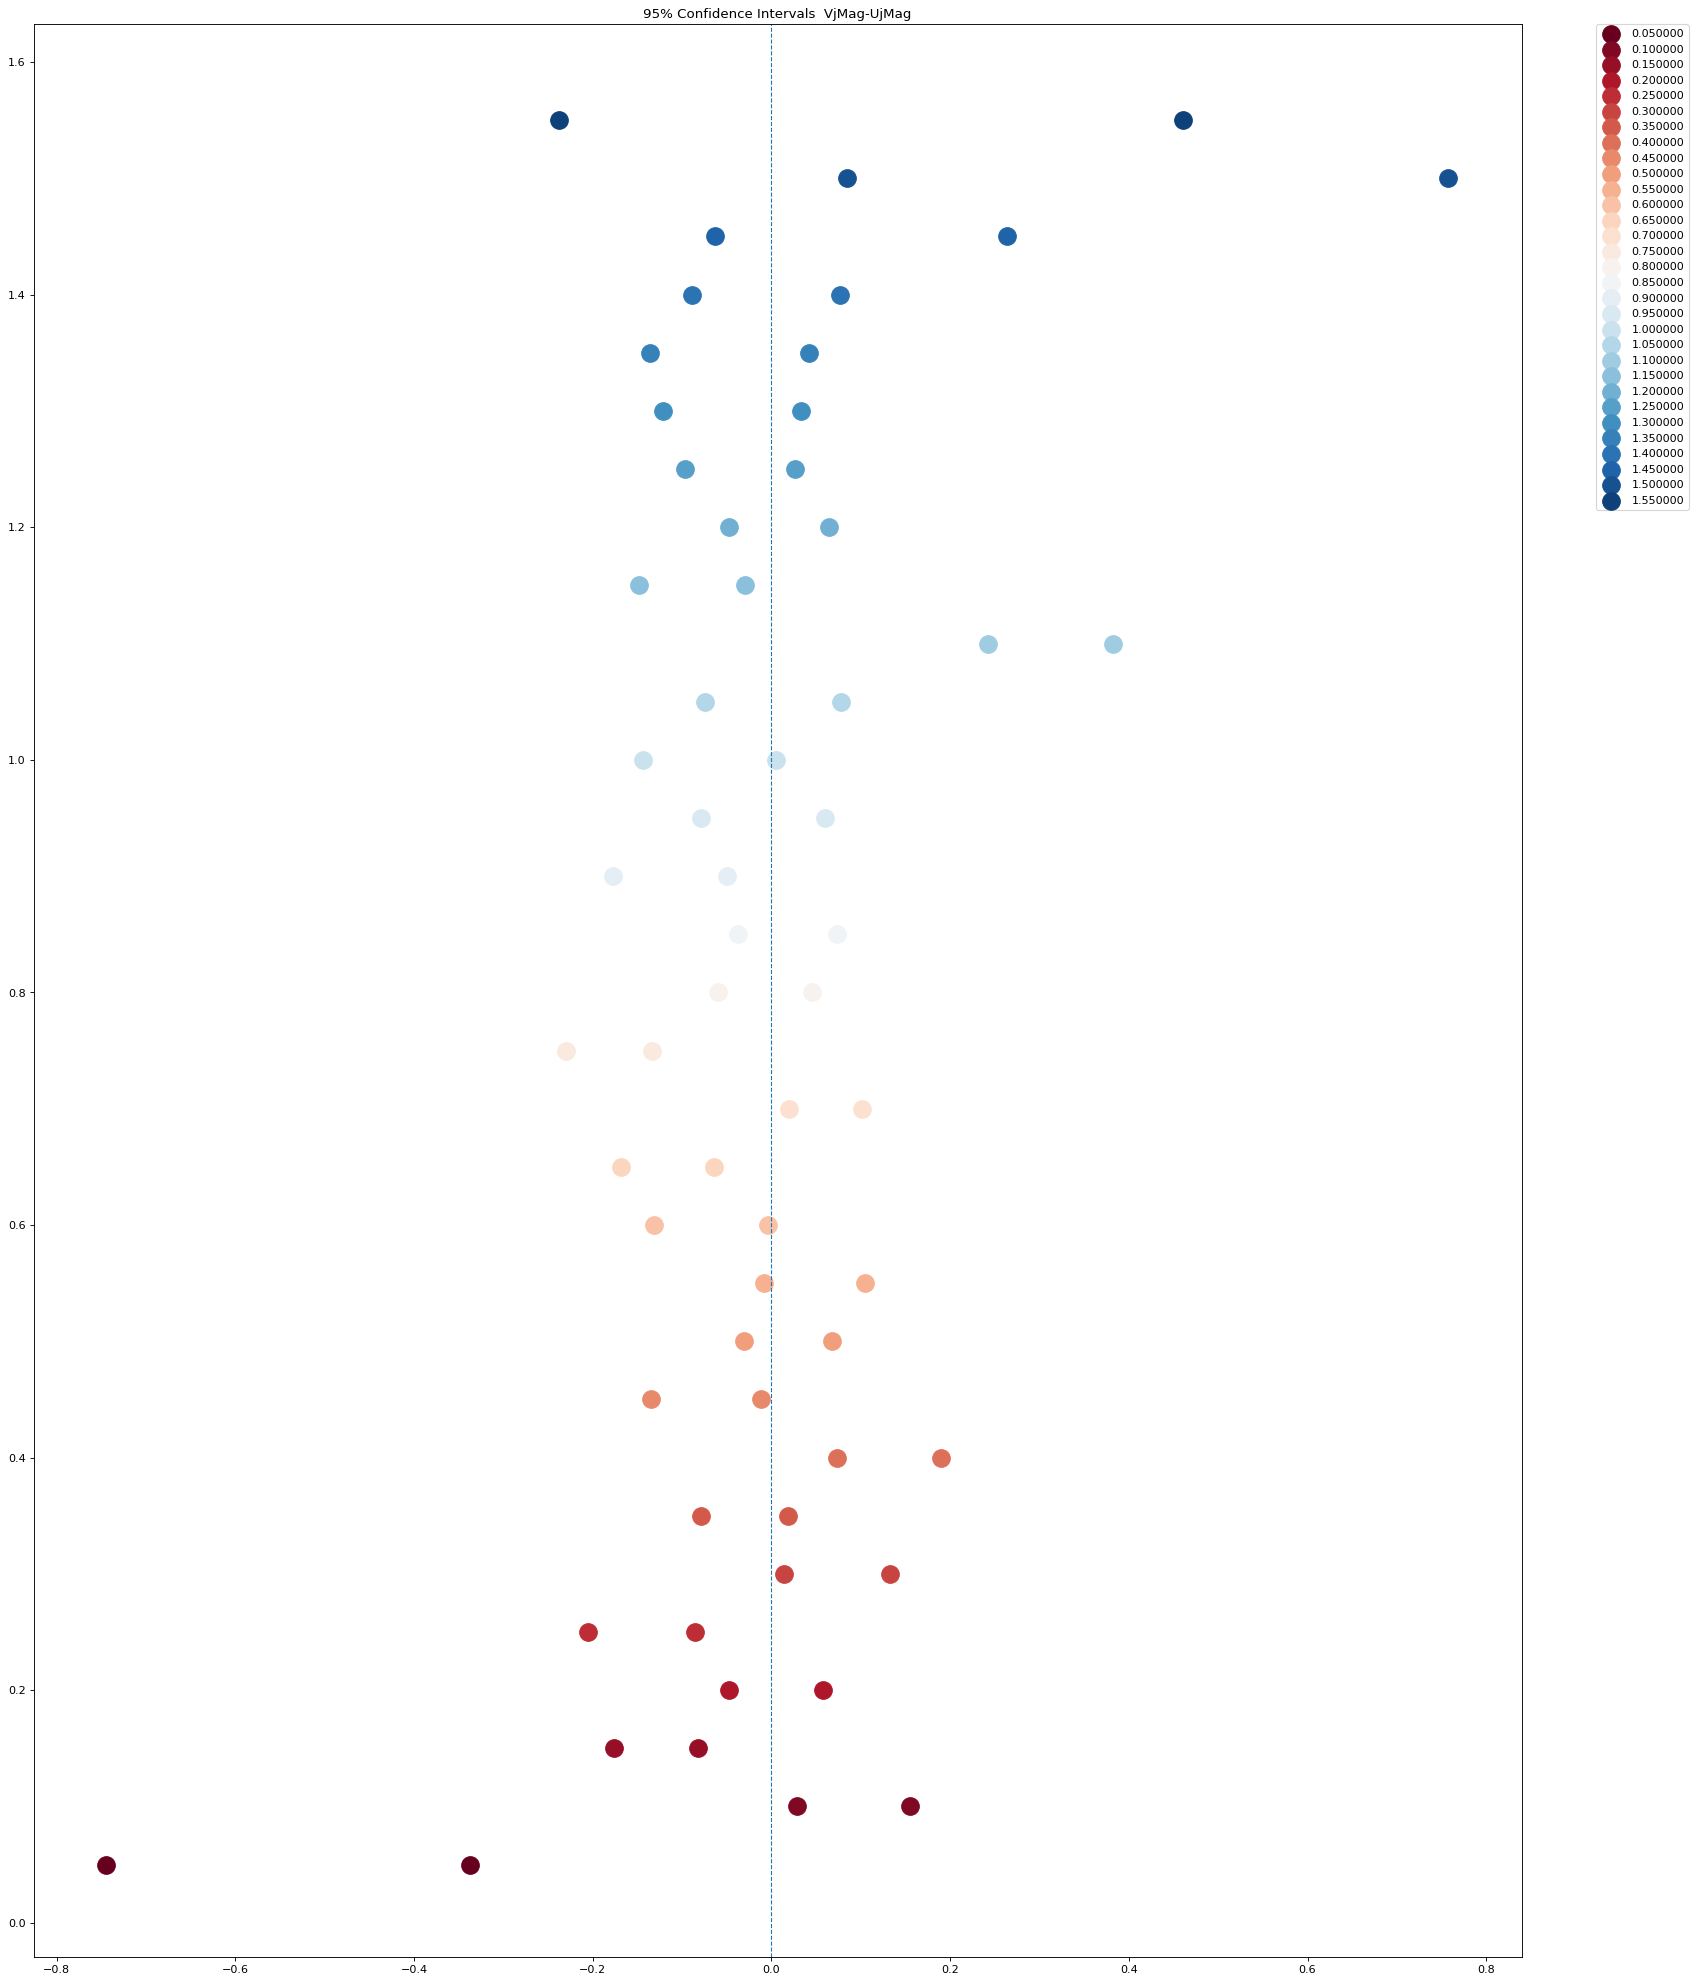

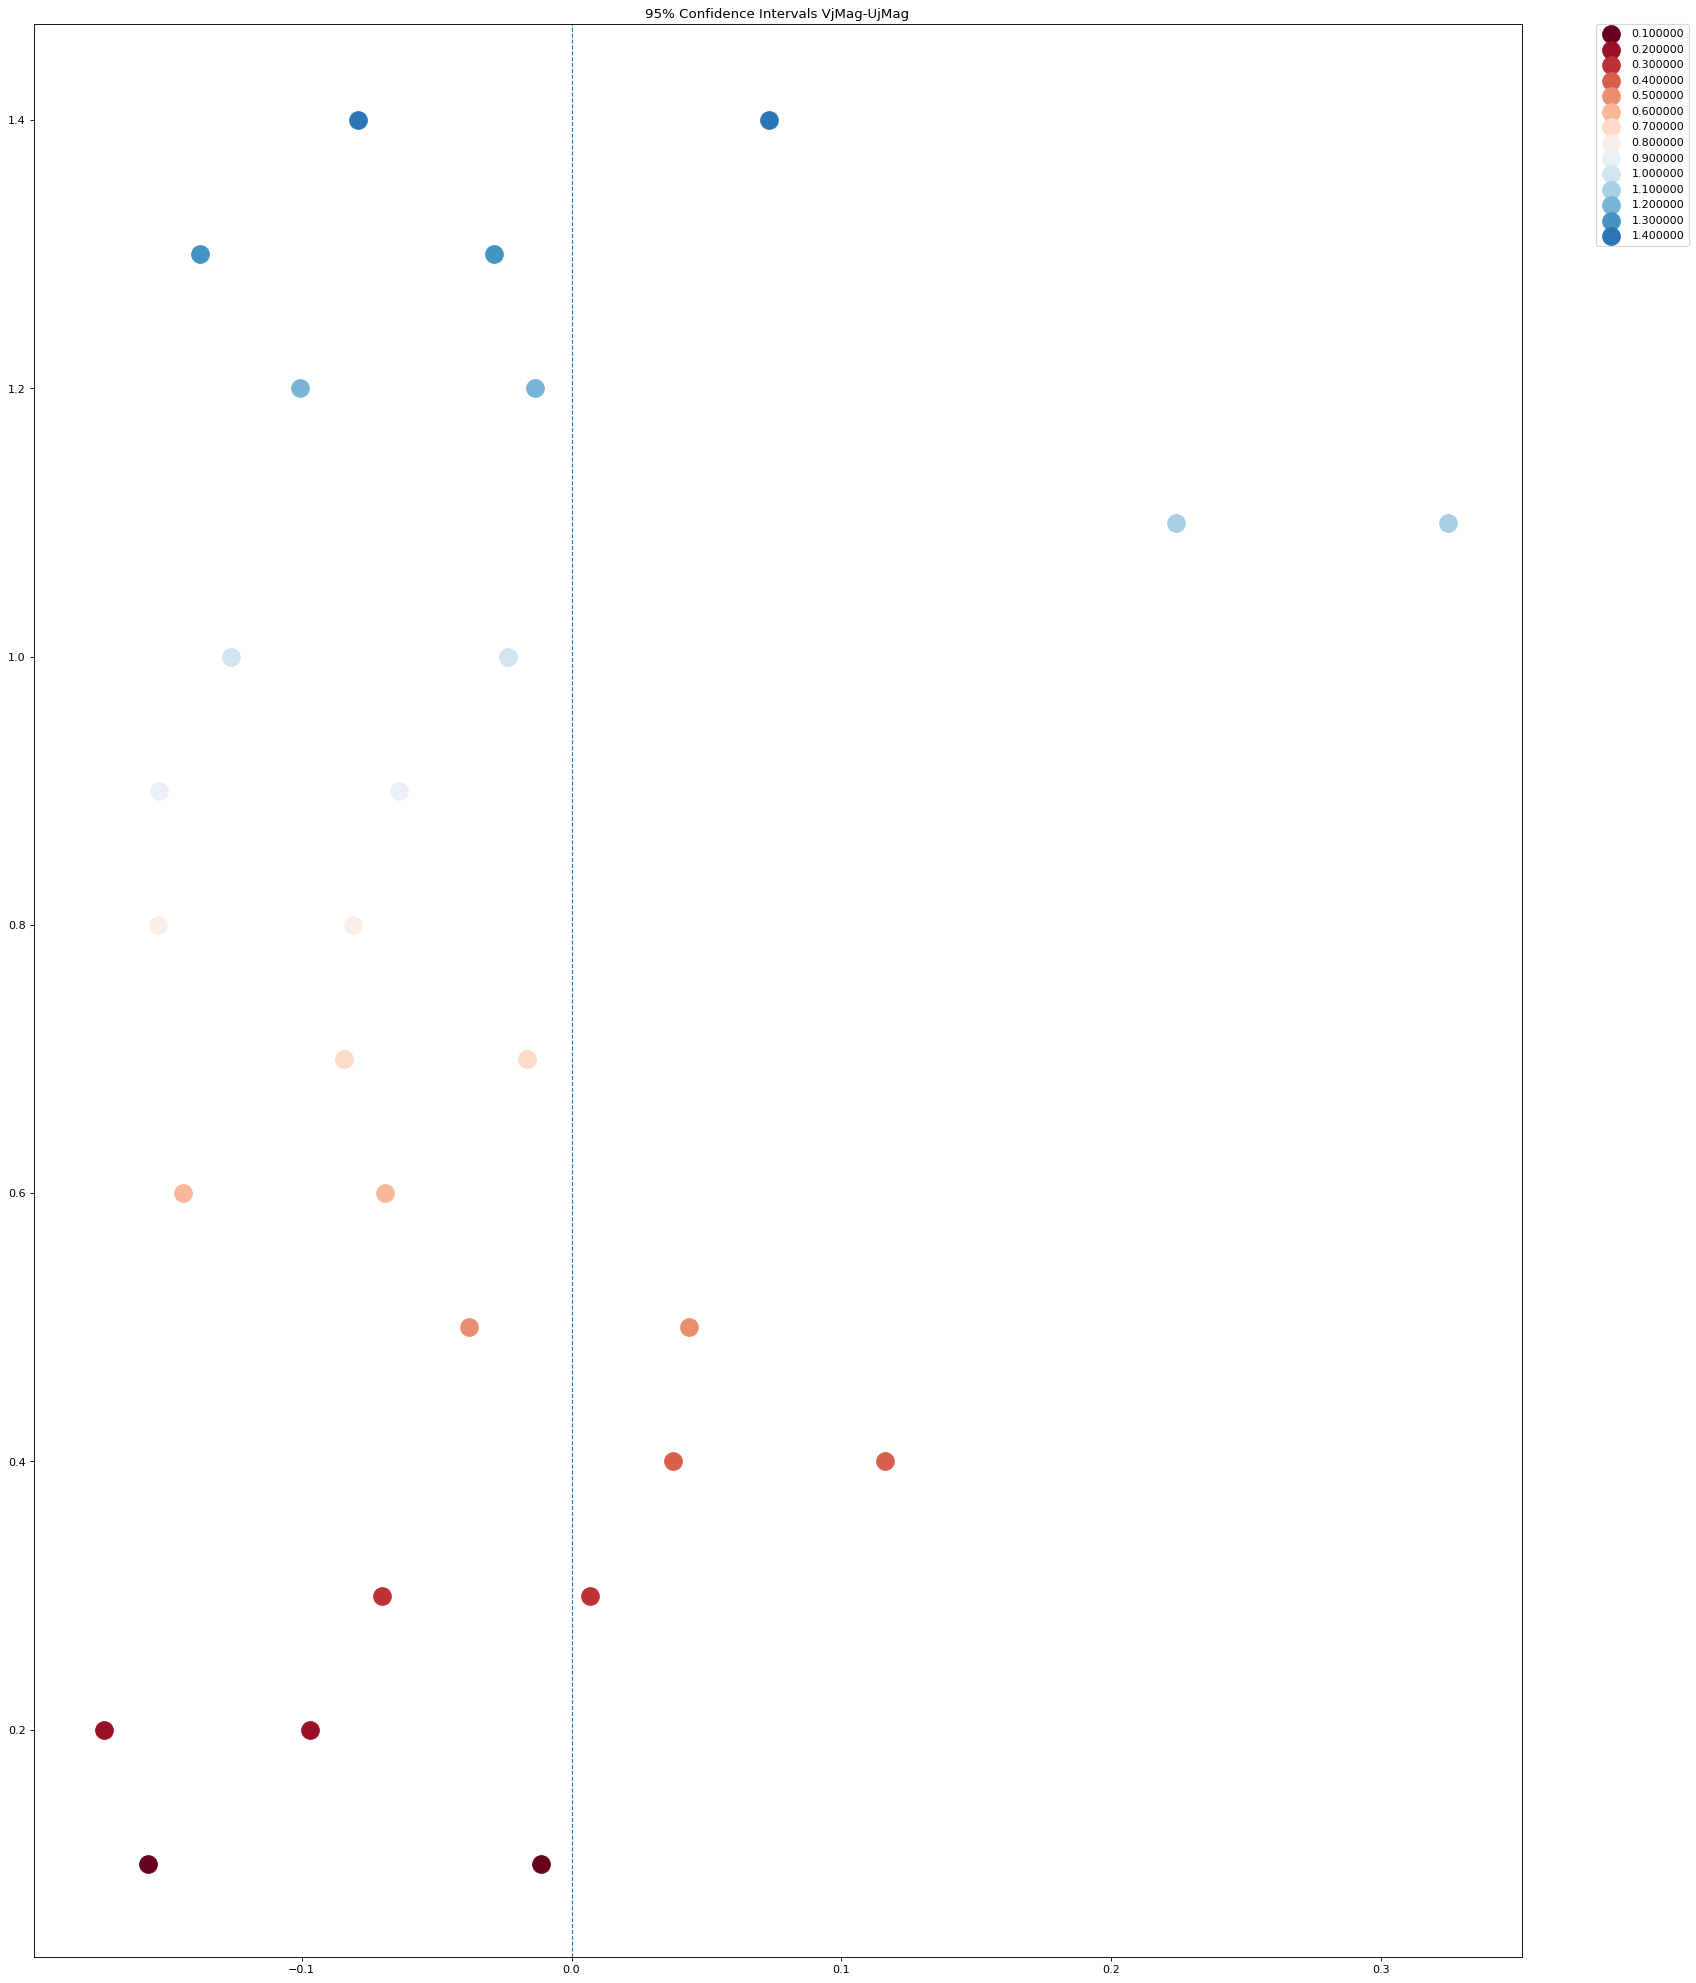

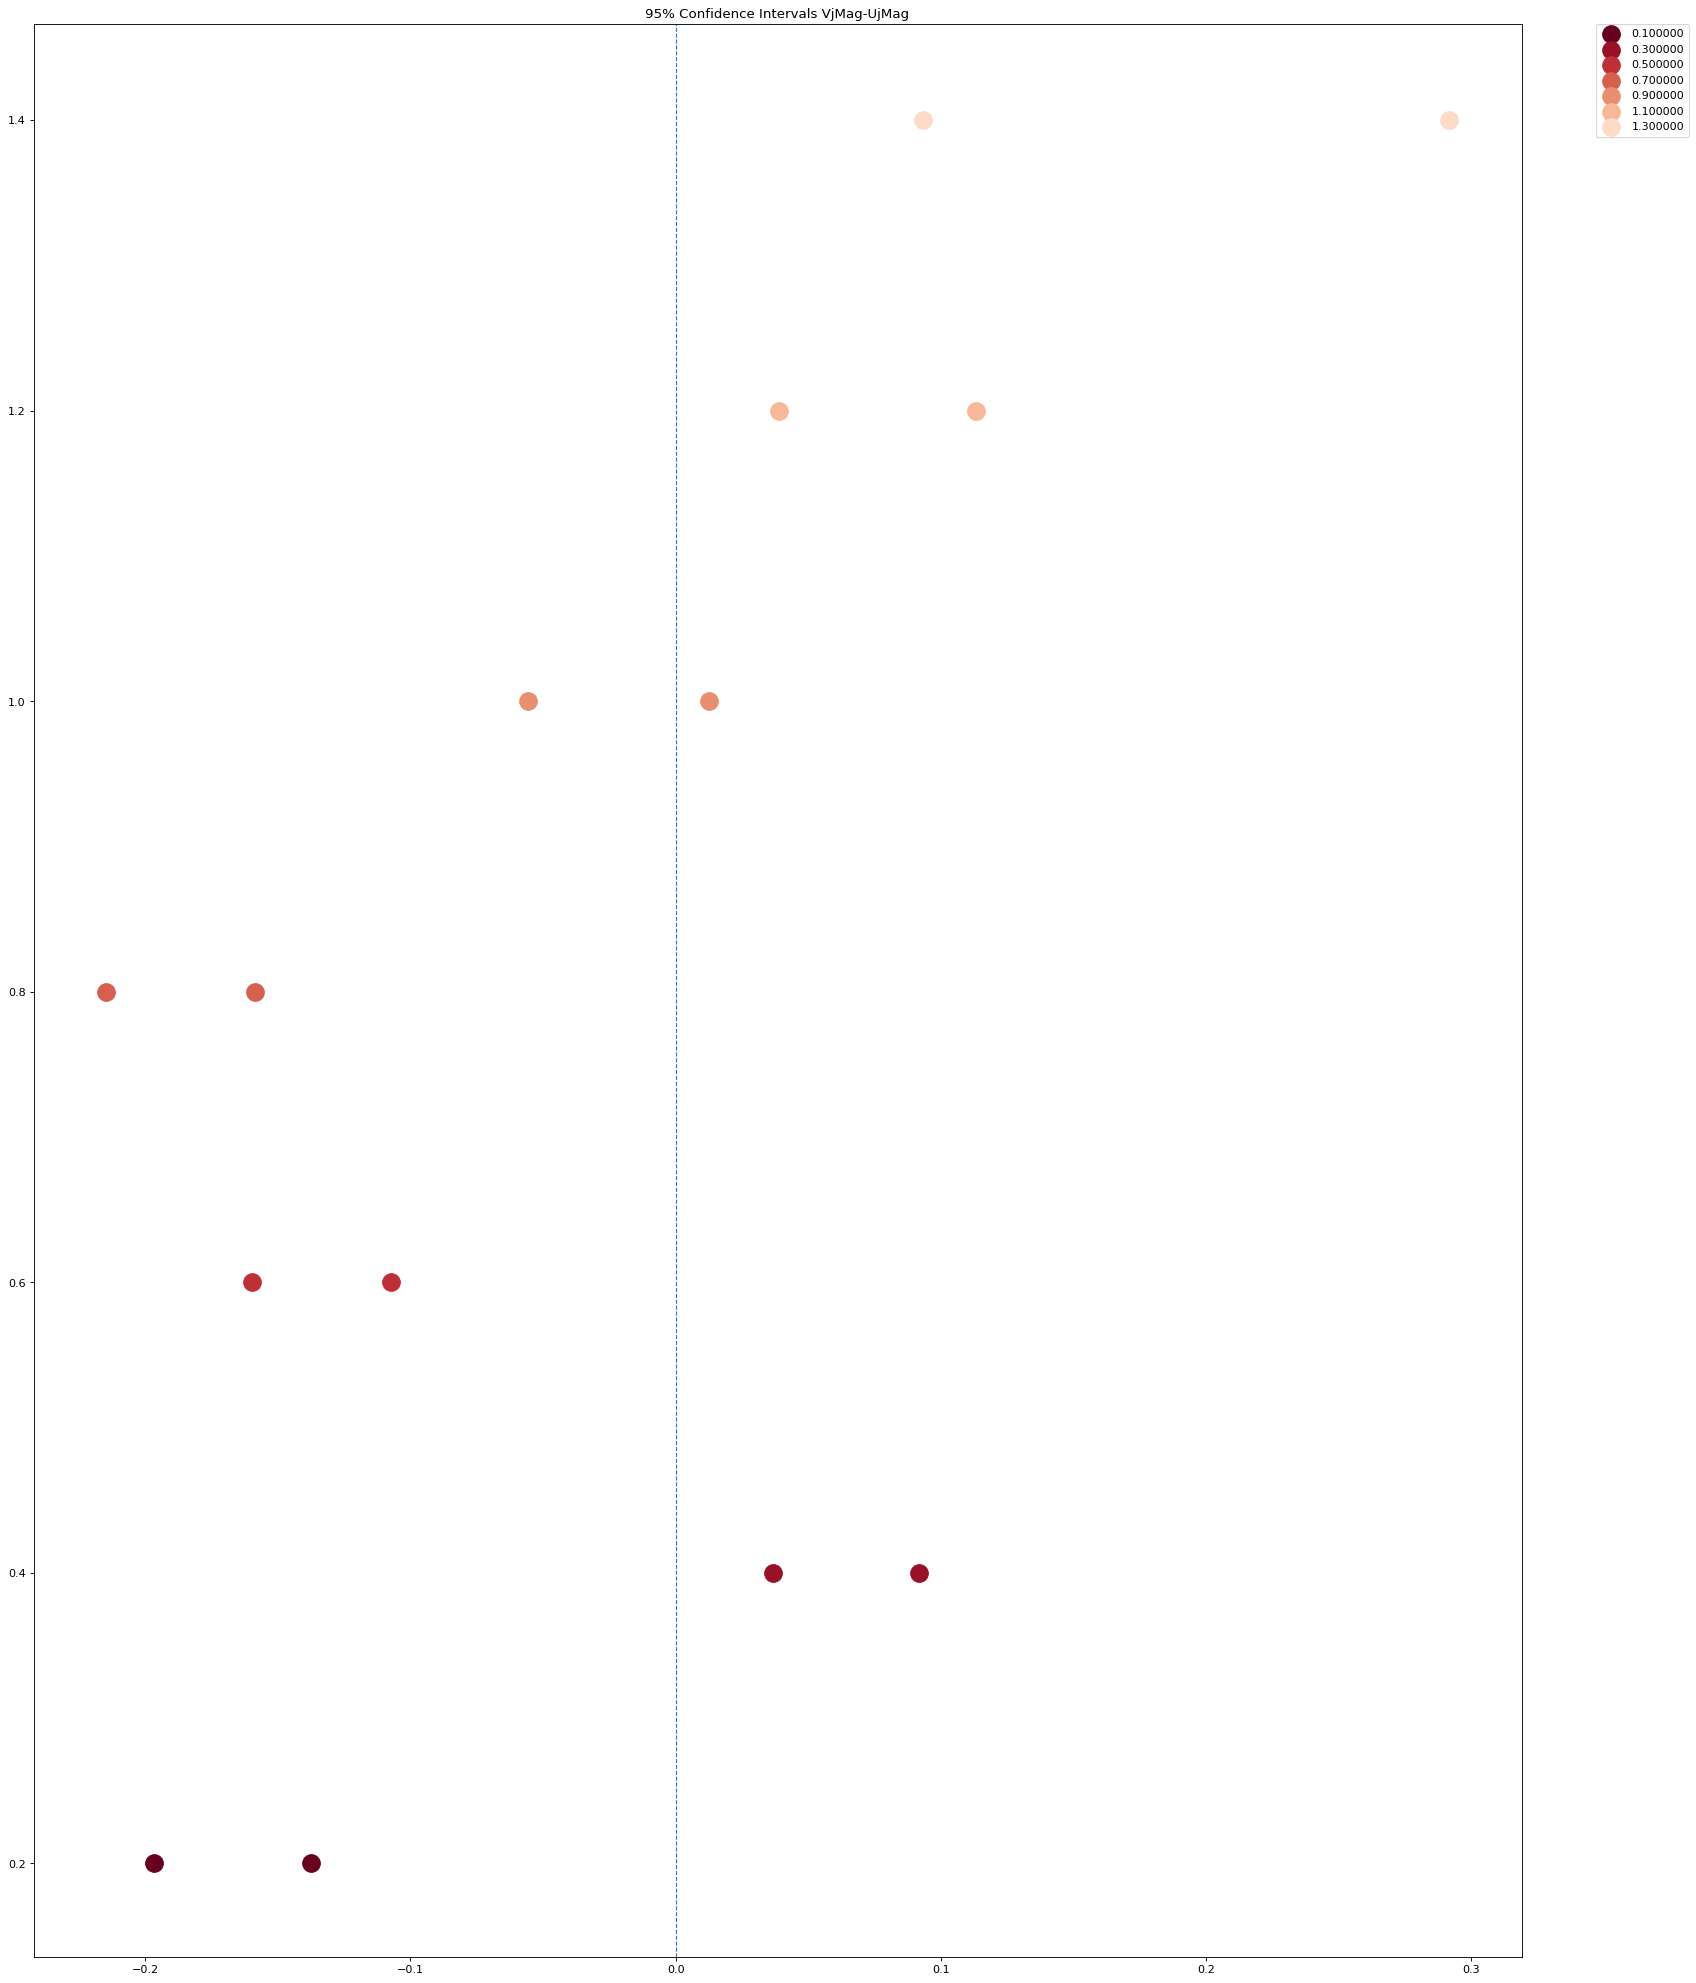

In [12]:
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('VjMag-UjMag', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals  VjMag-UjMag')   
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('VjMag-UjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals VjMag-UjMag')   
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = magDiffs[low_filter]
    high_red = magDiffs[high_filter]
    b, t, p = get_conf_int('VjMag-UjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals VjMag-UjMag')    
plt.show()

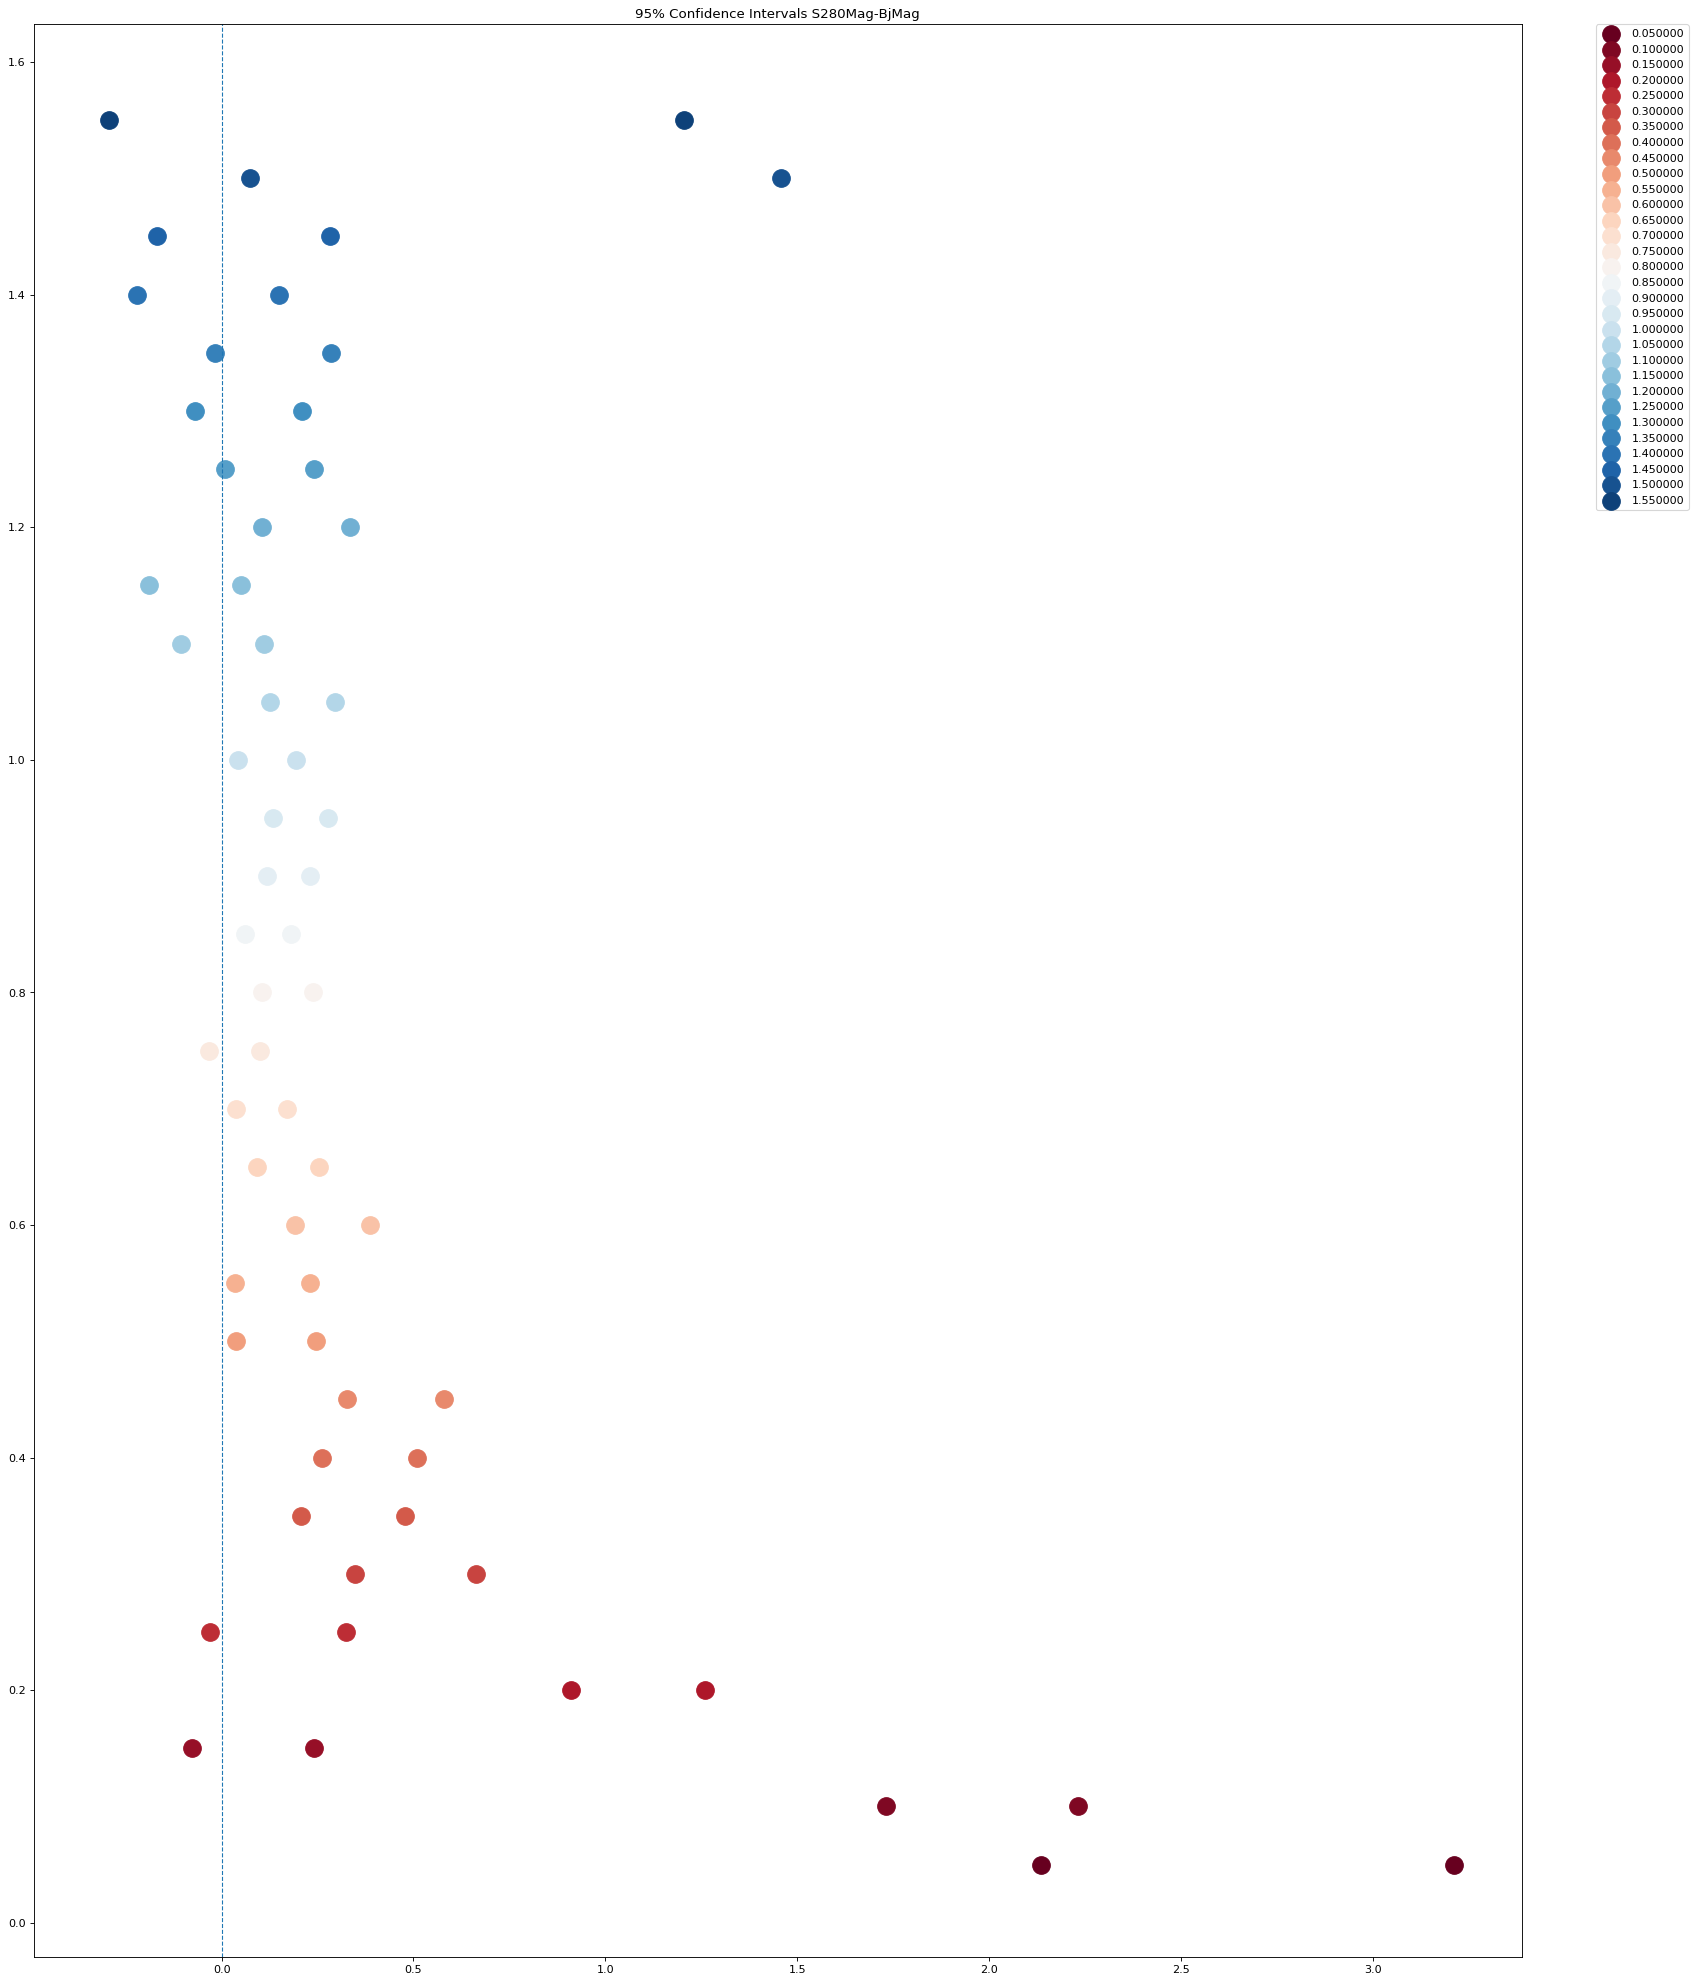

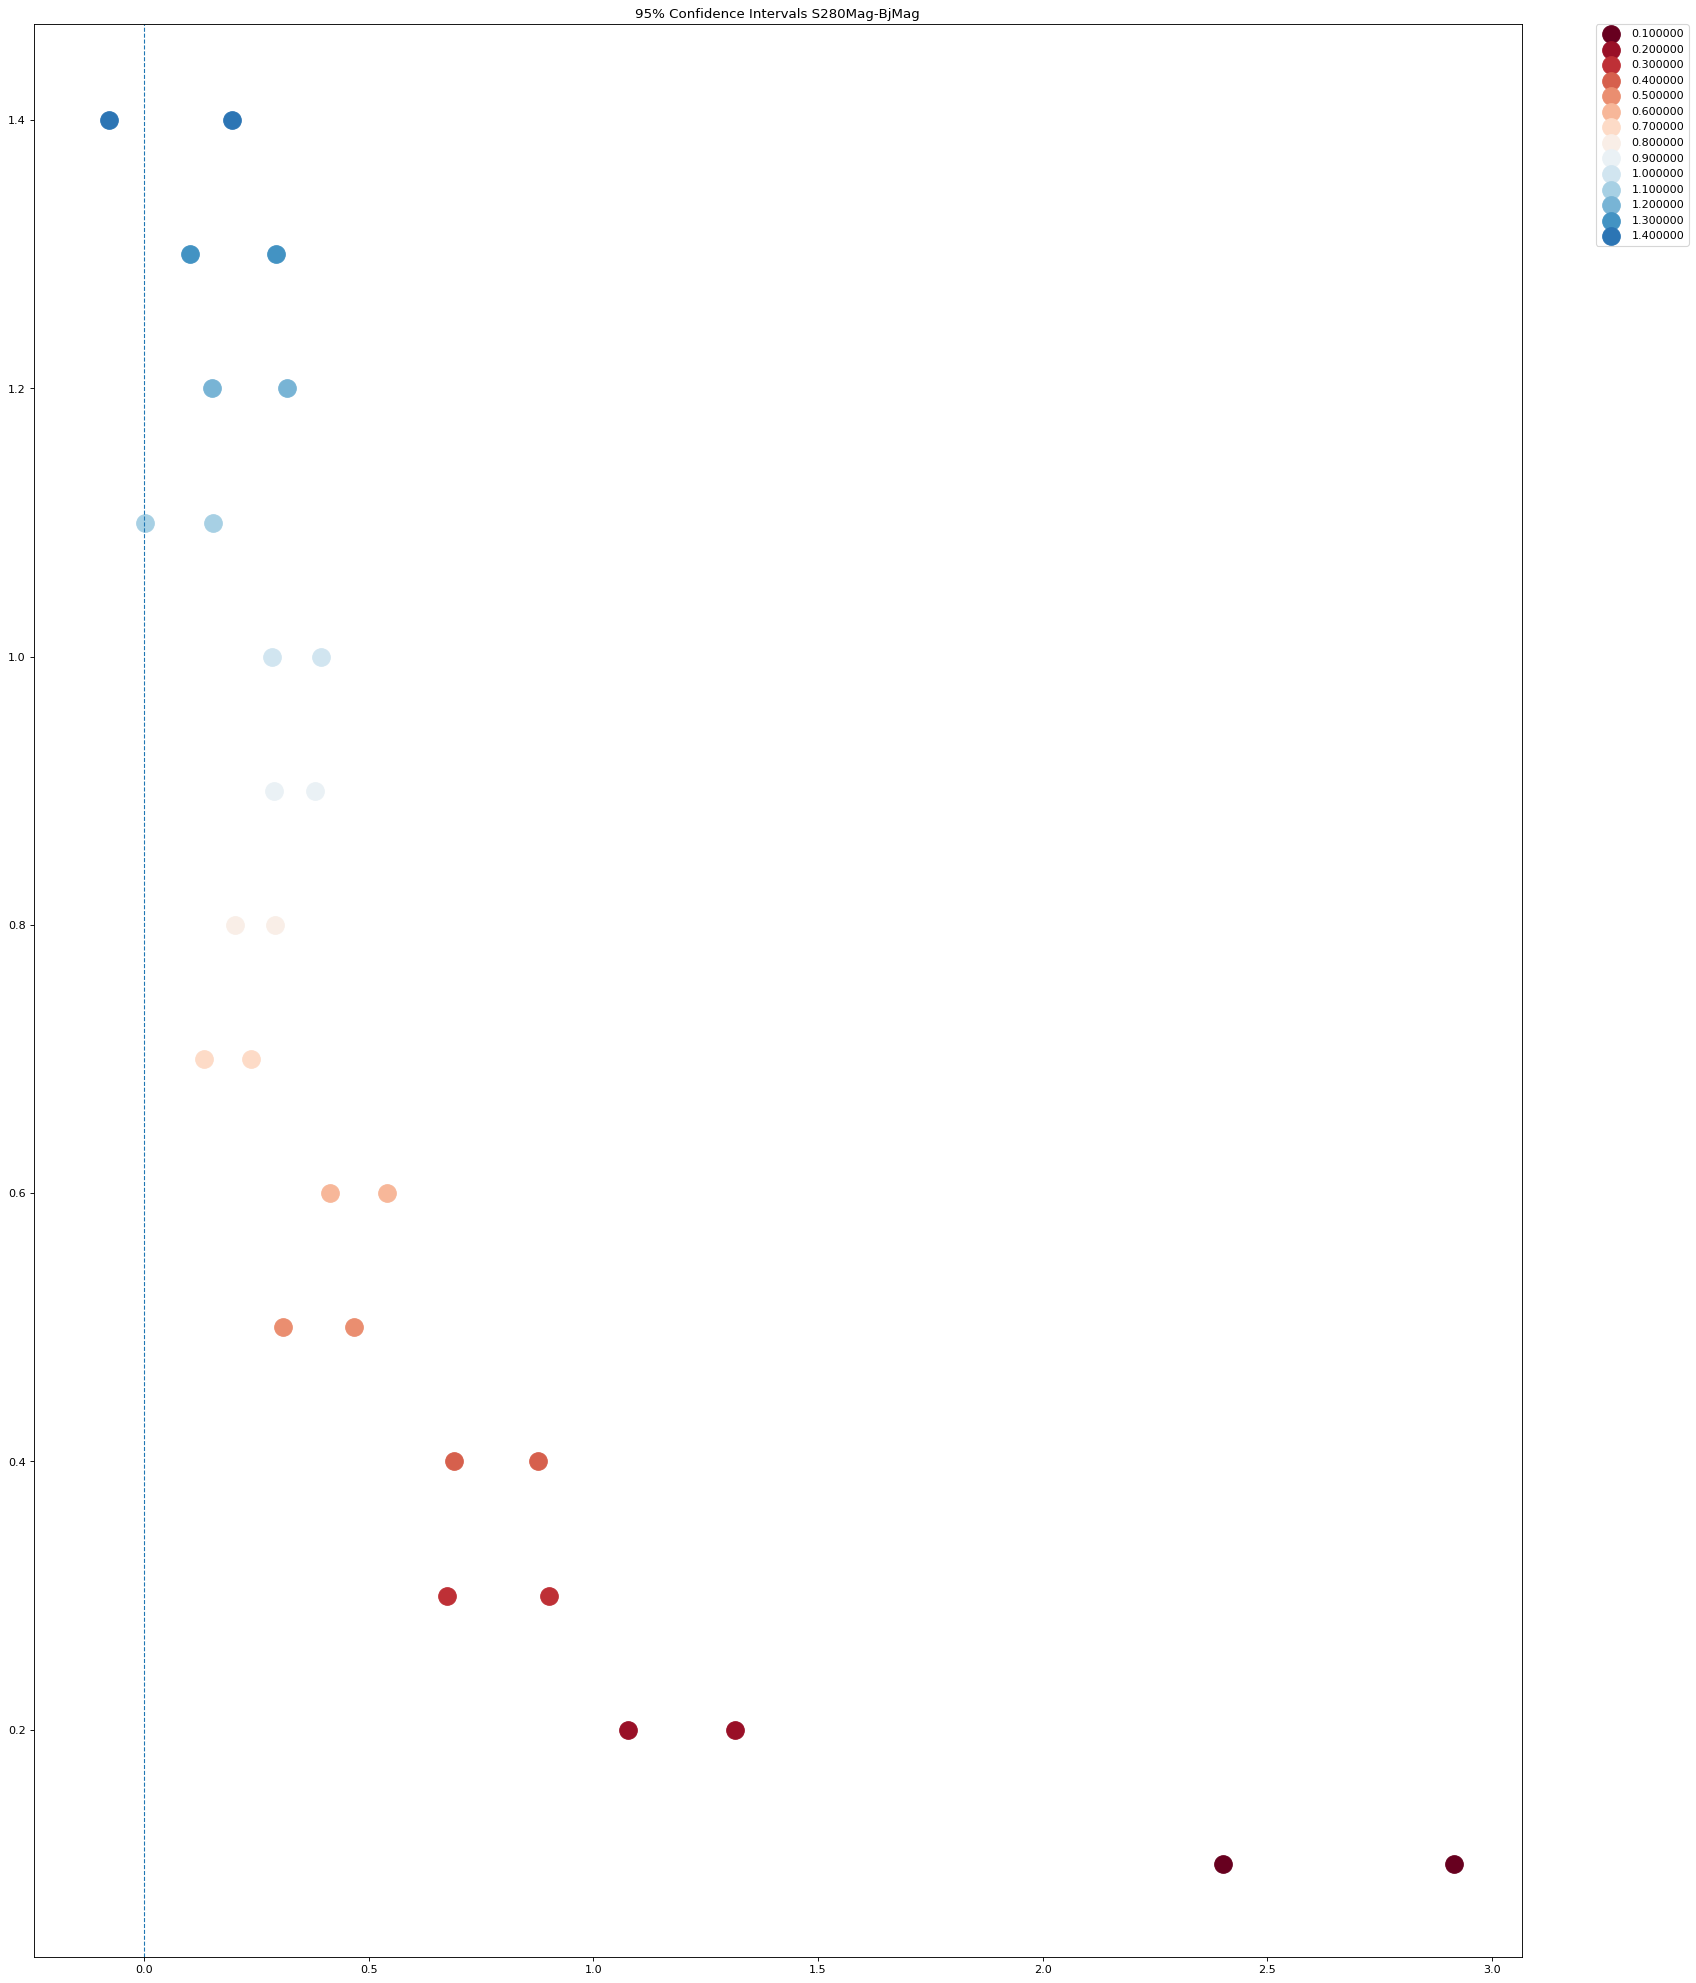

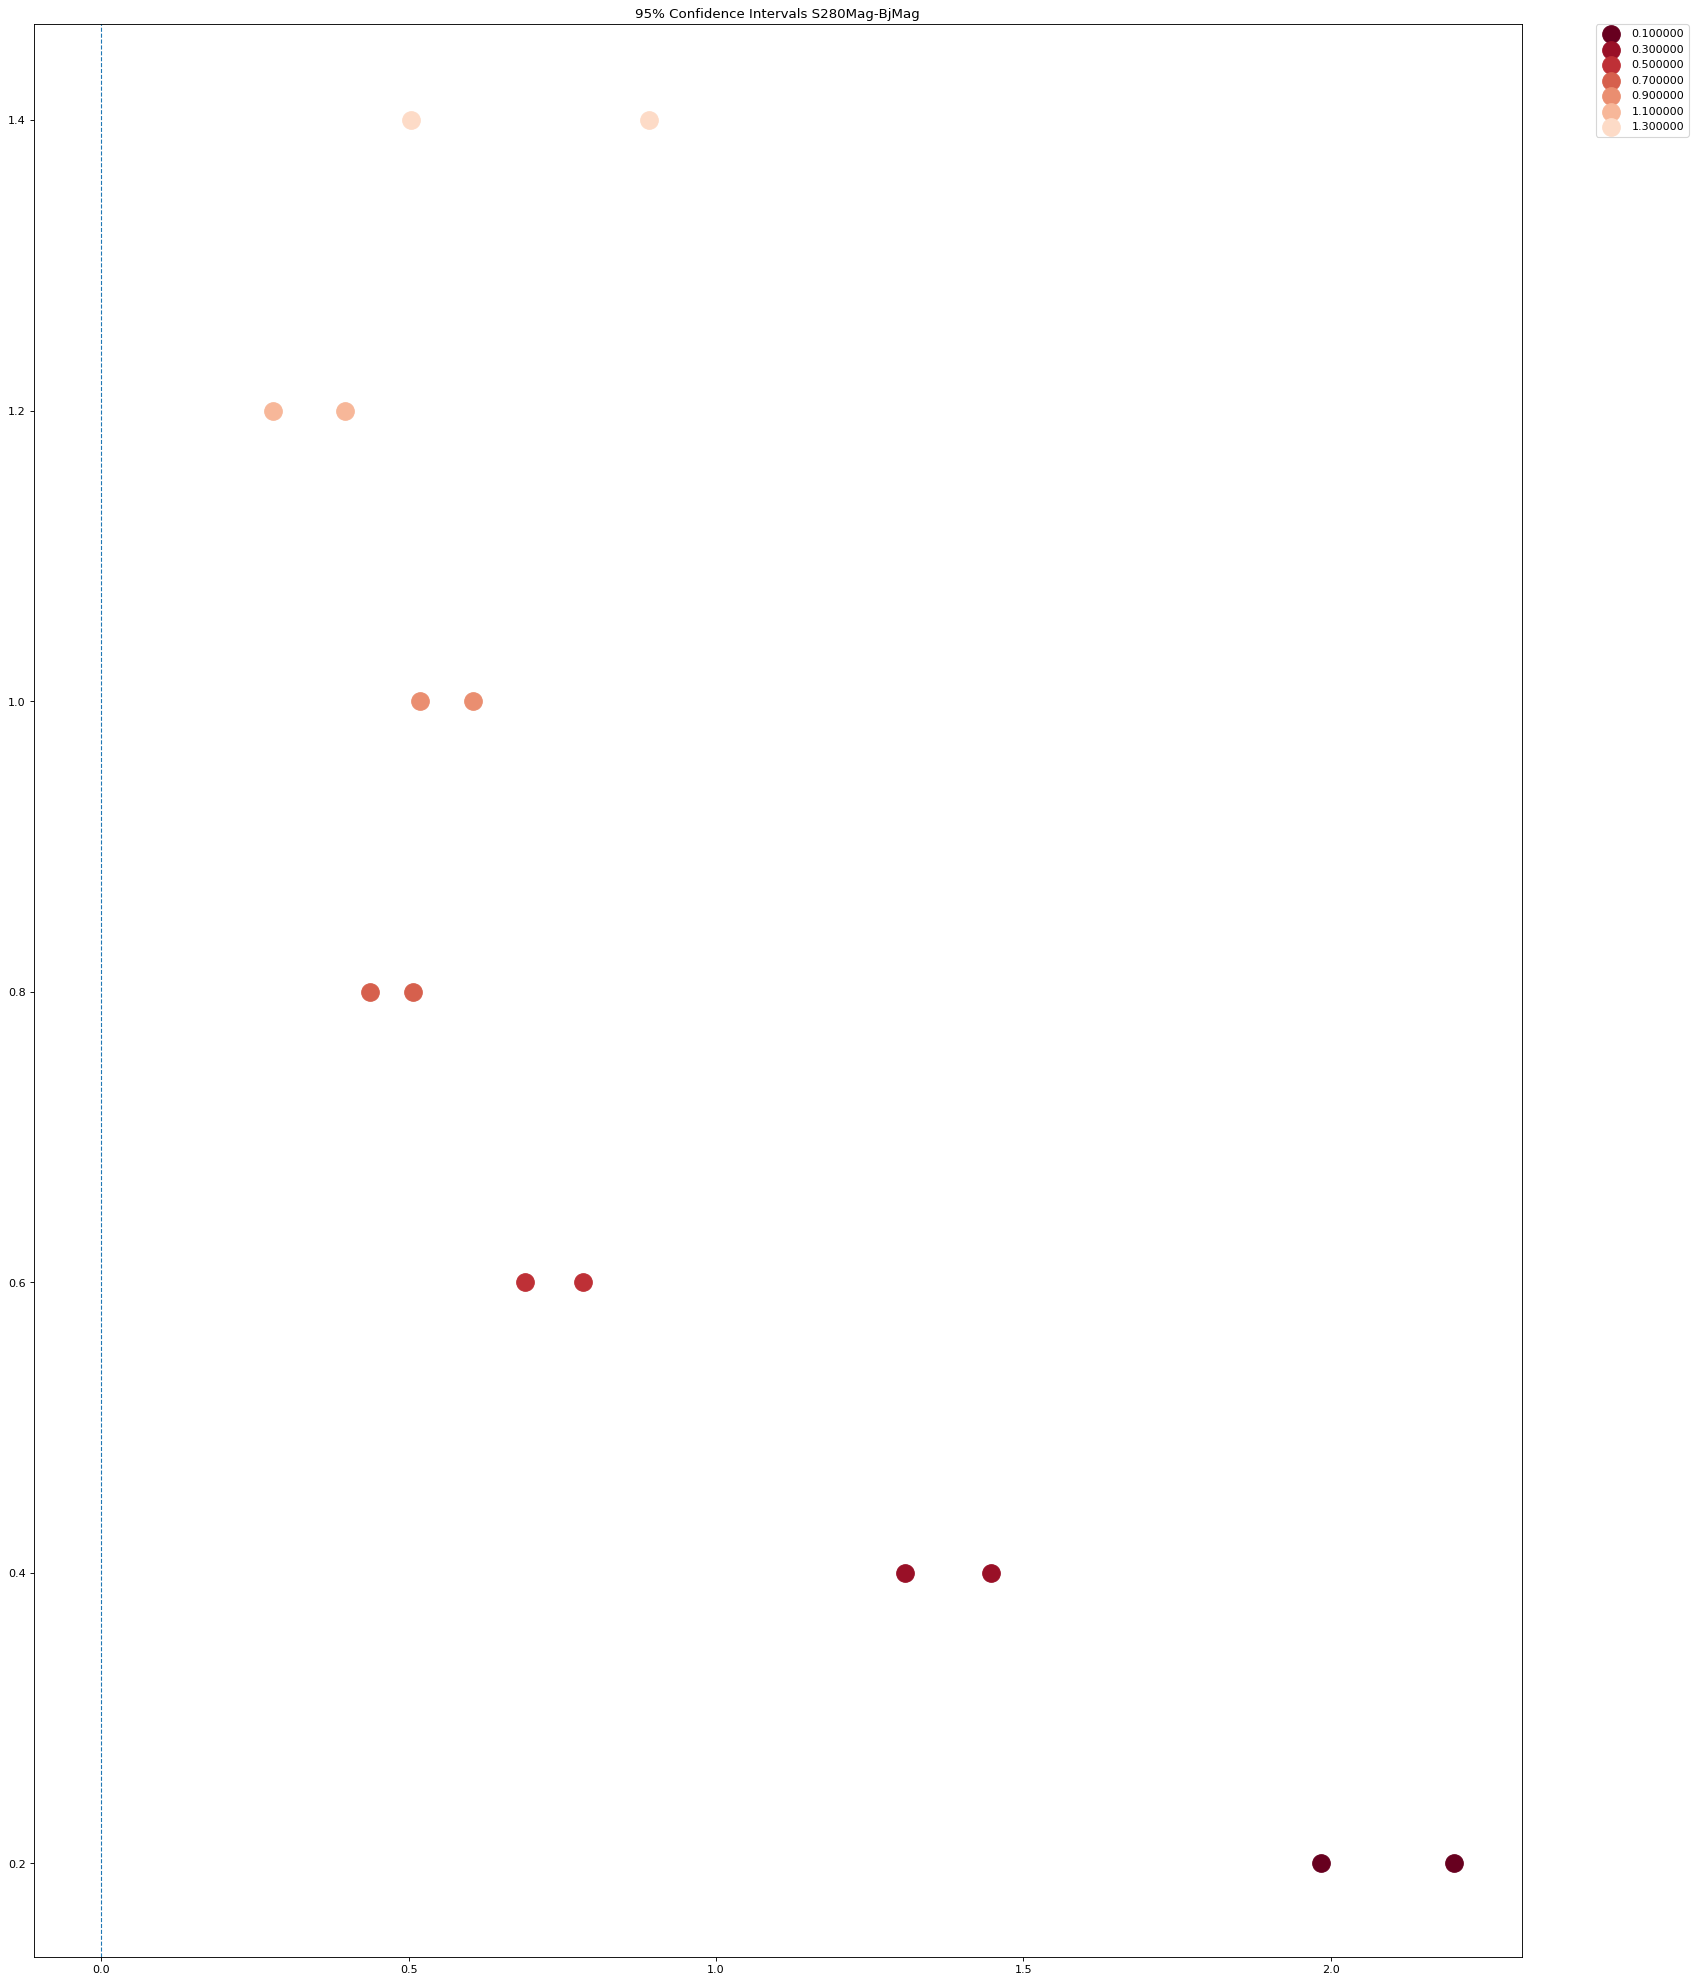

In [42]:
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('UjMag', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag')   
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('UjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag')    
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('UjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals UjMag')  
plt.show()

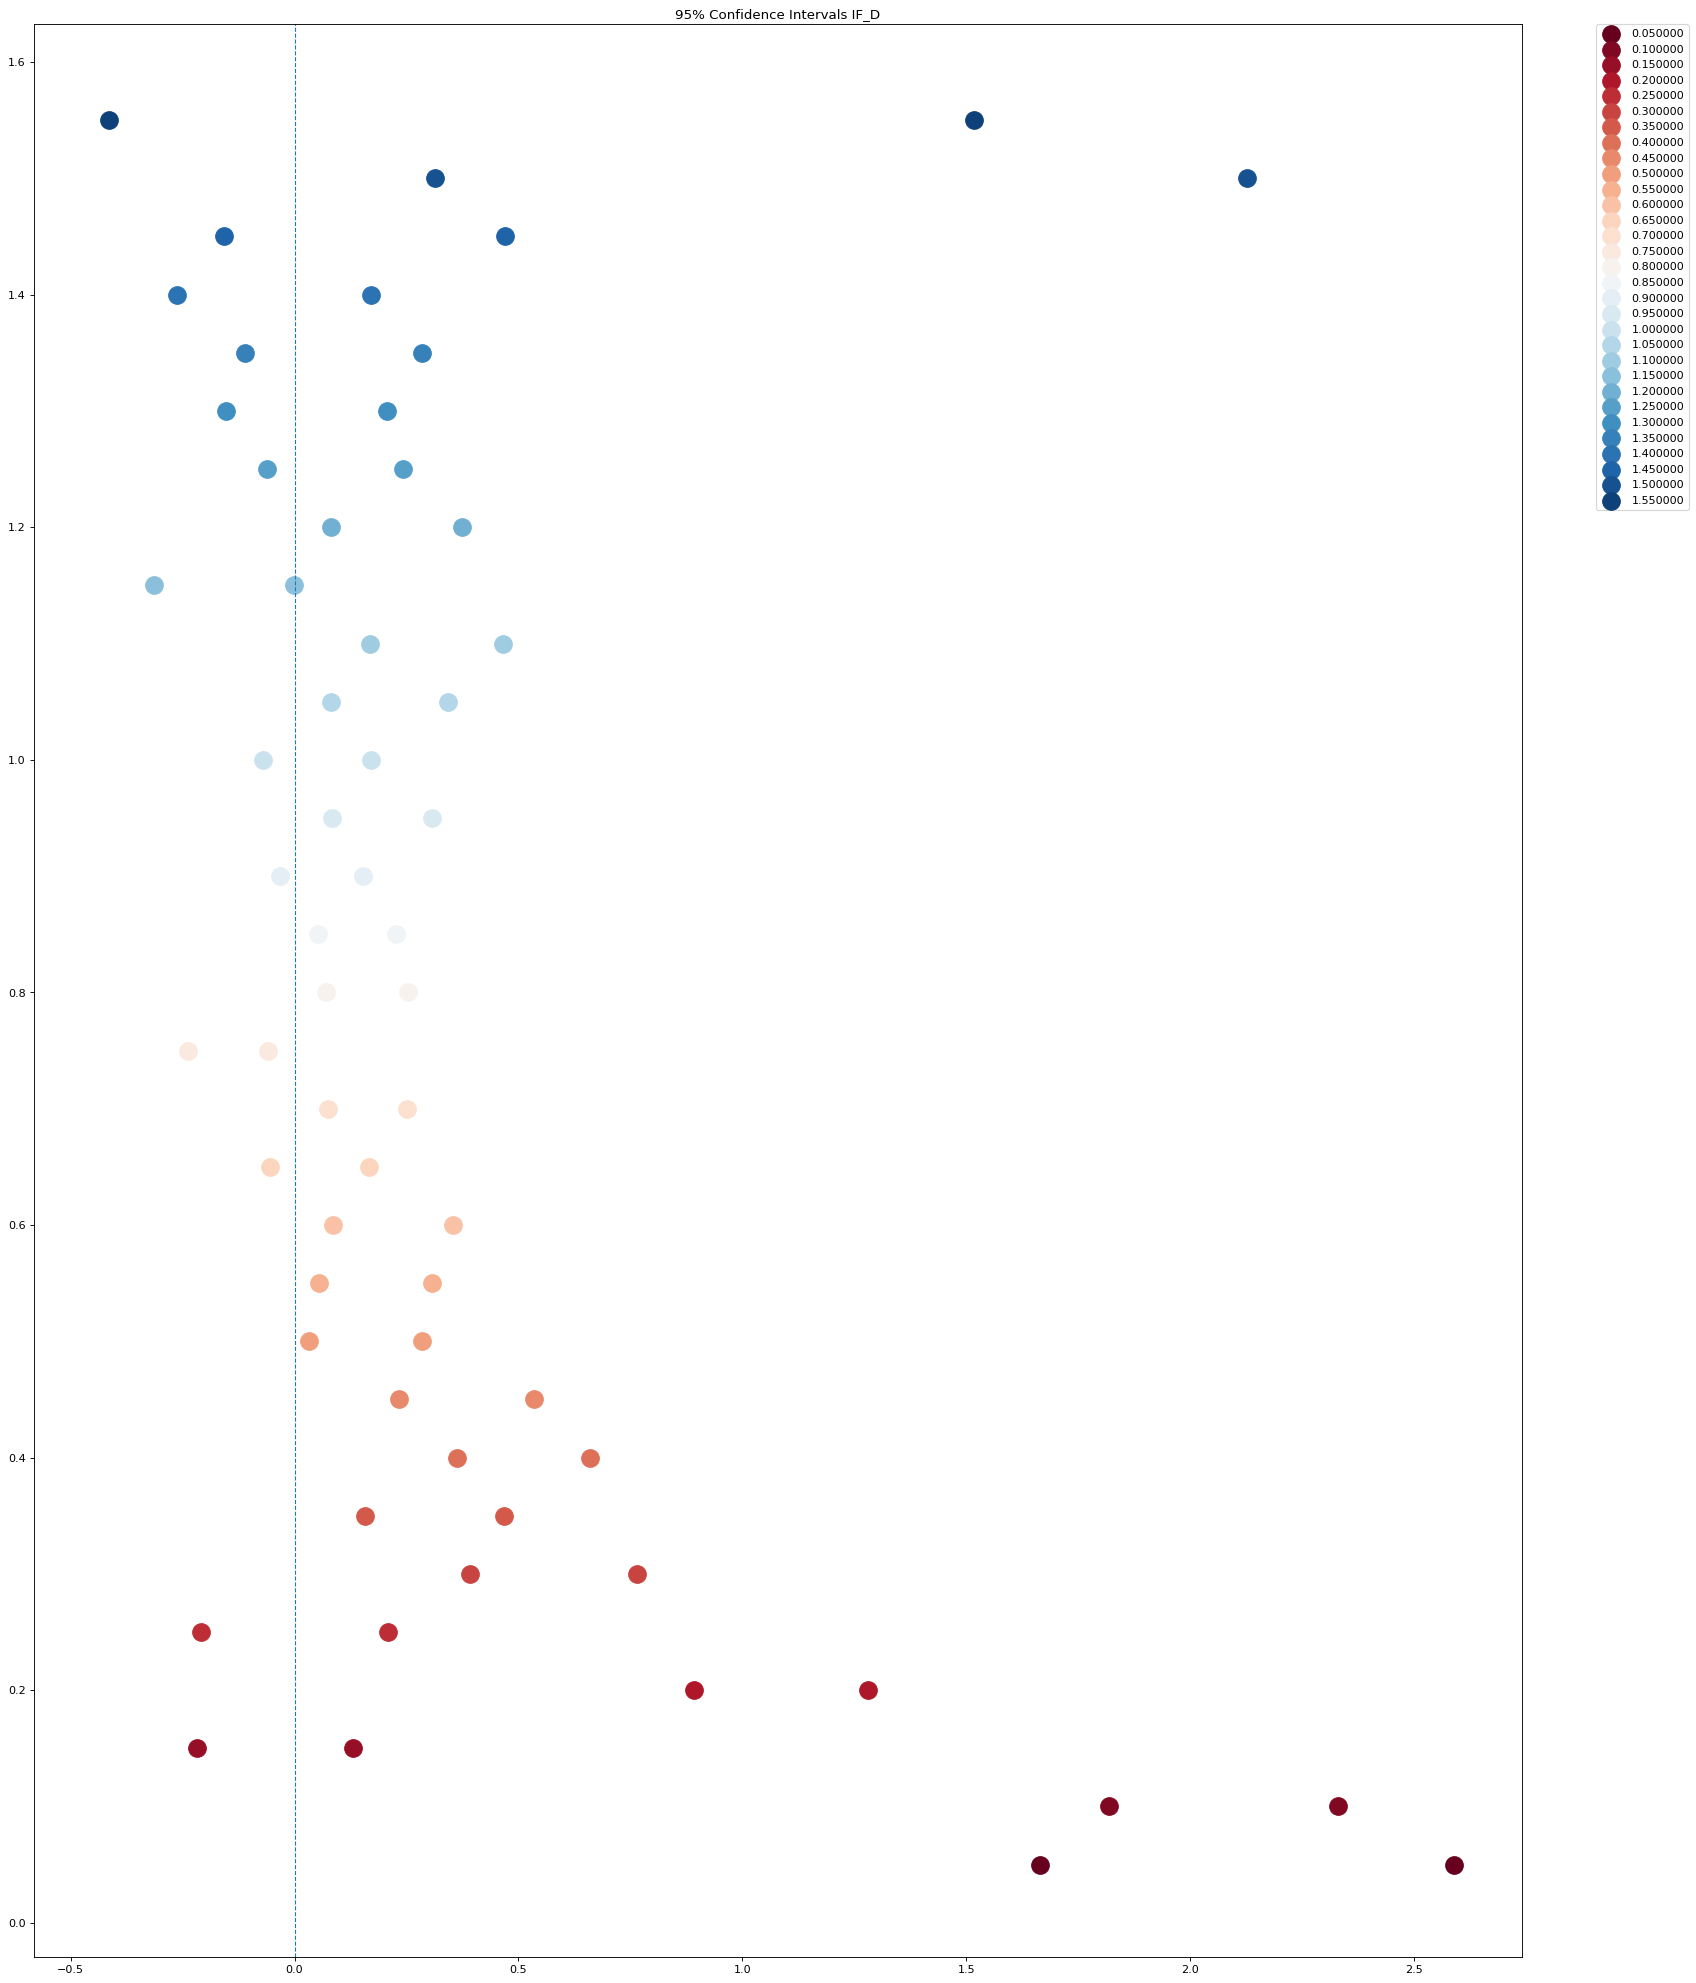

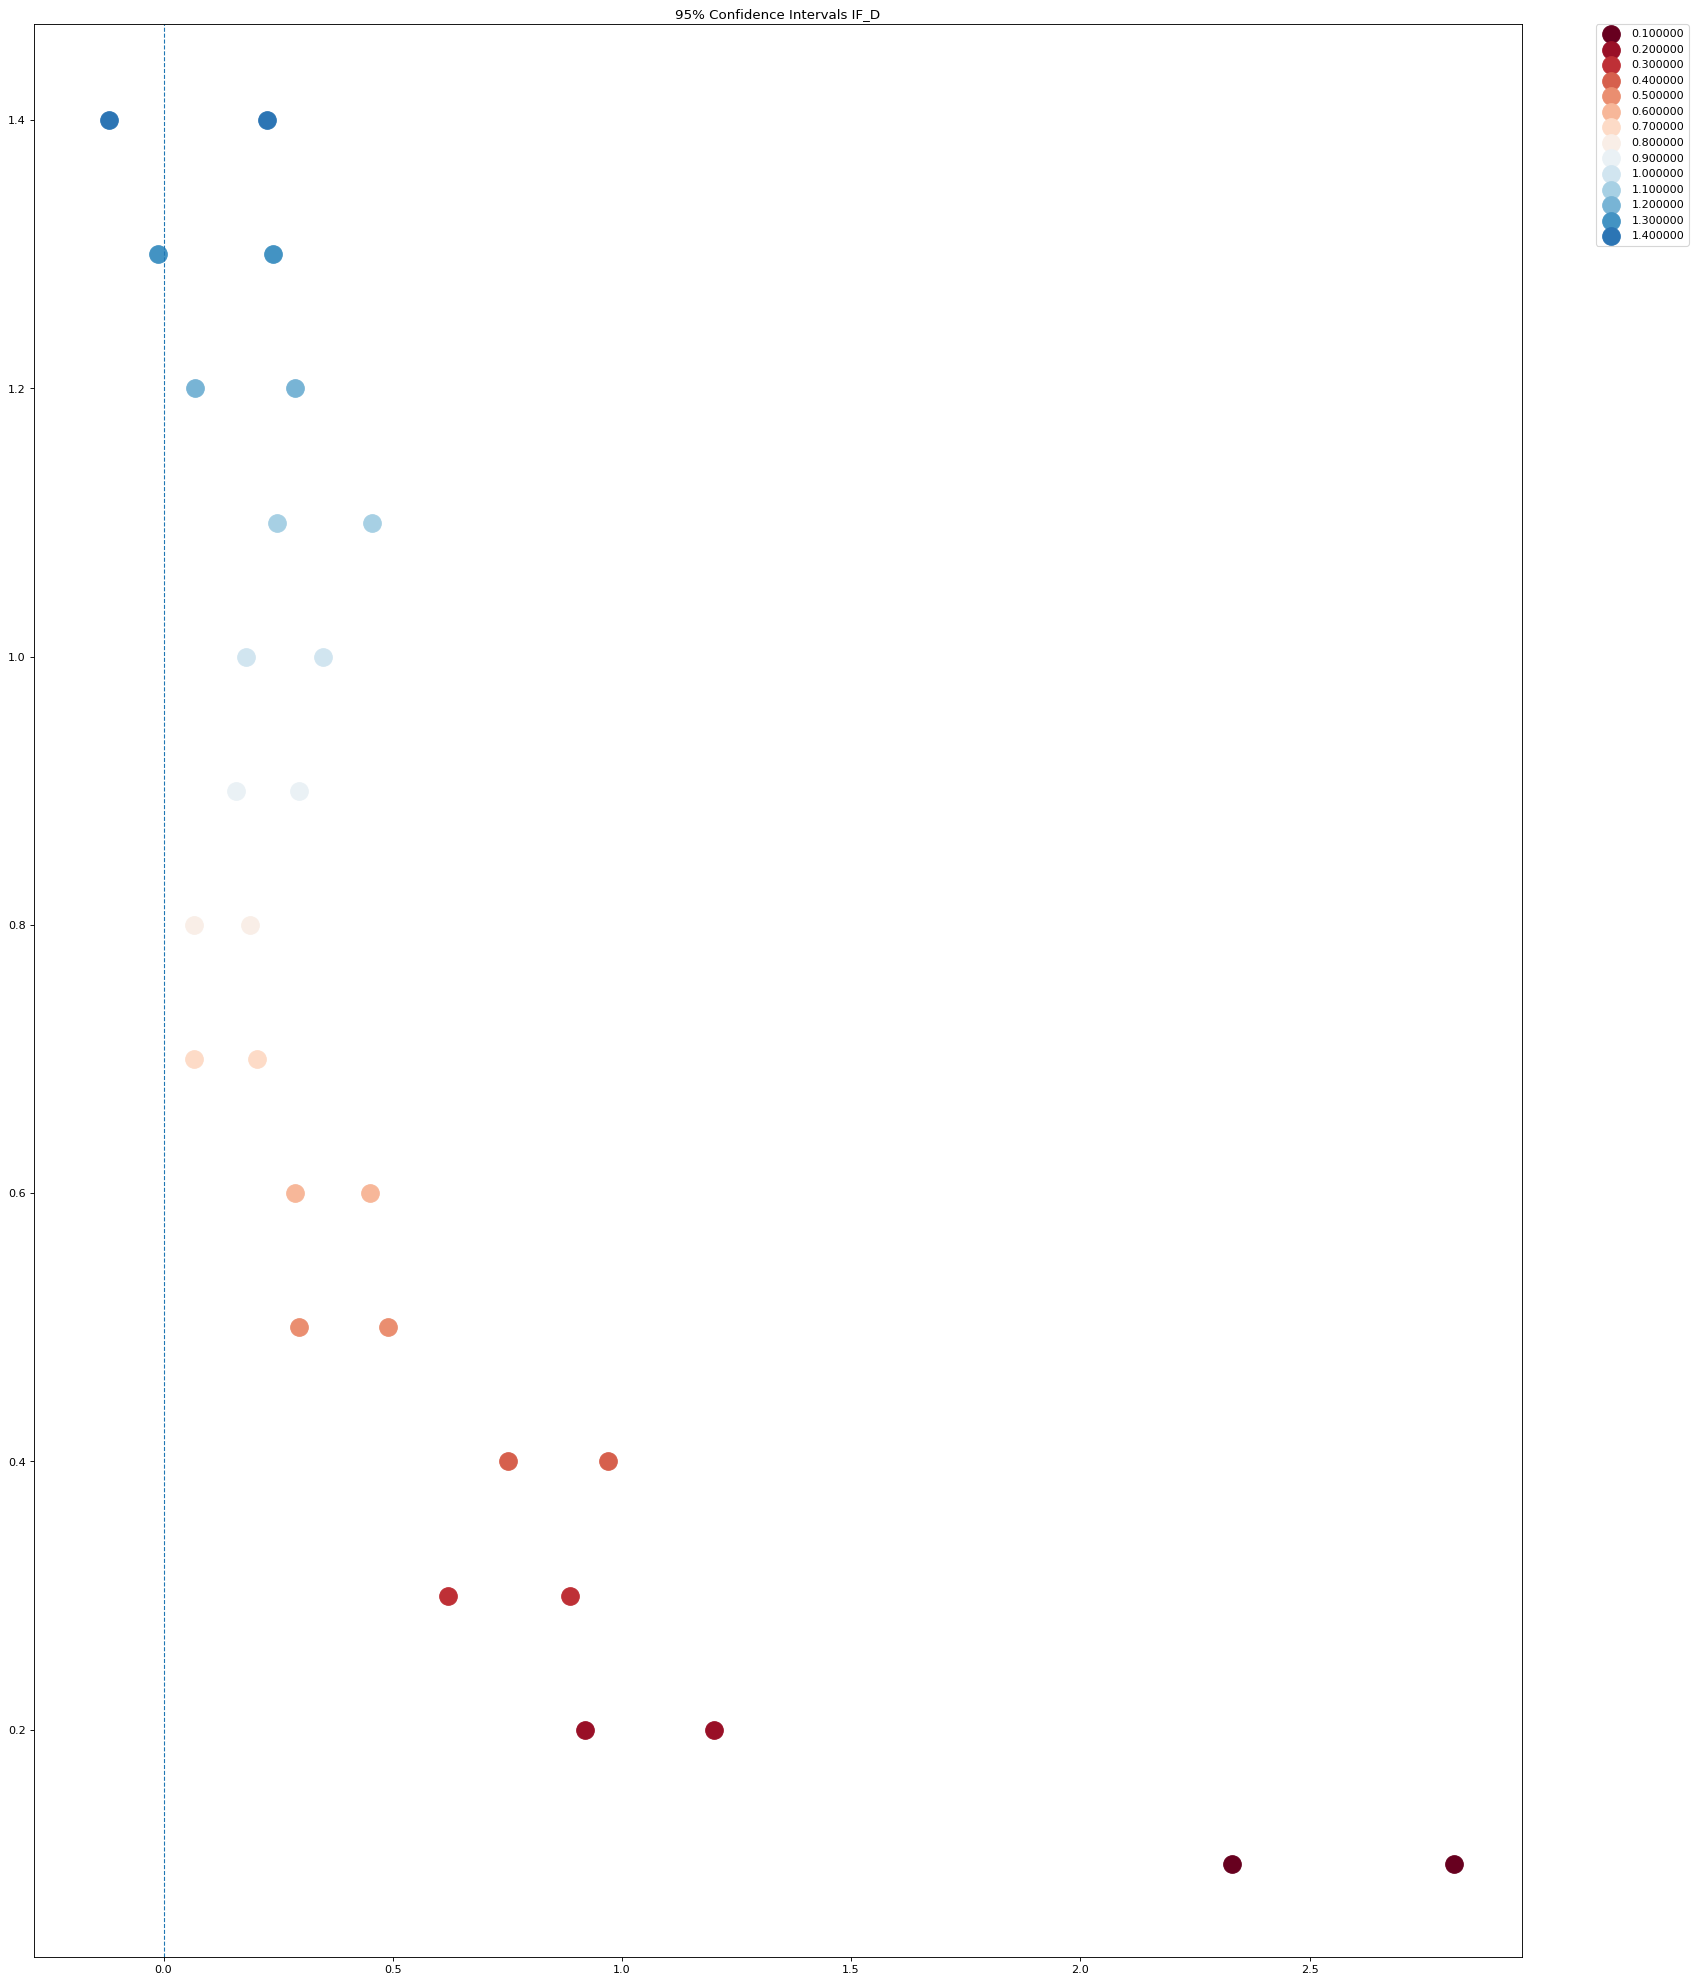

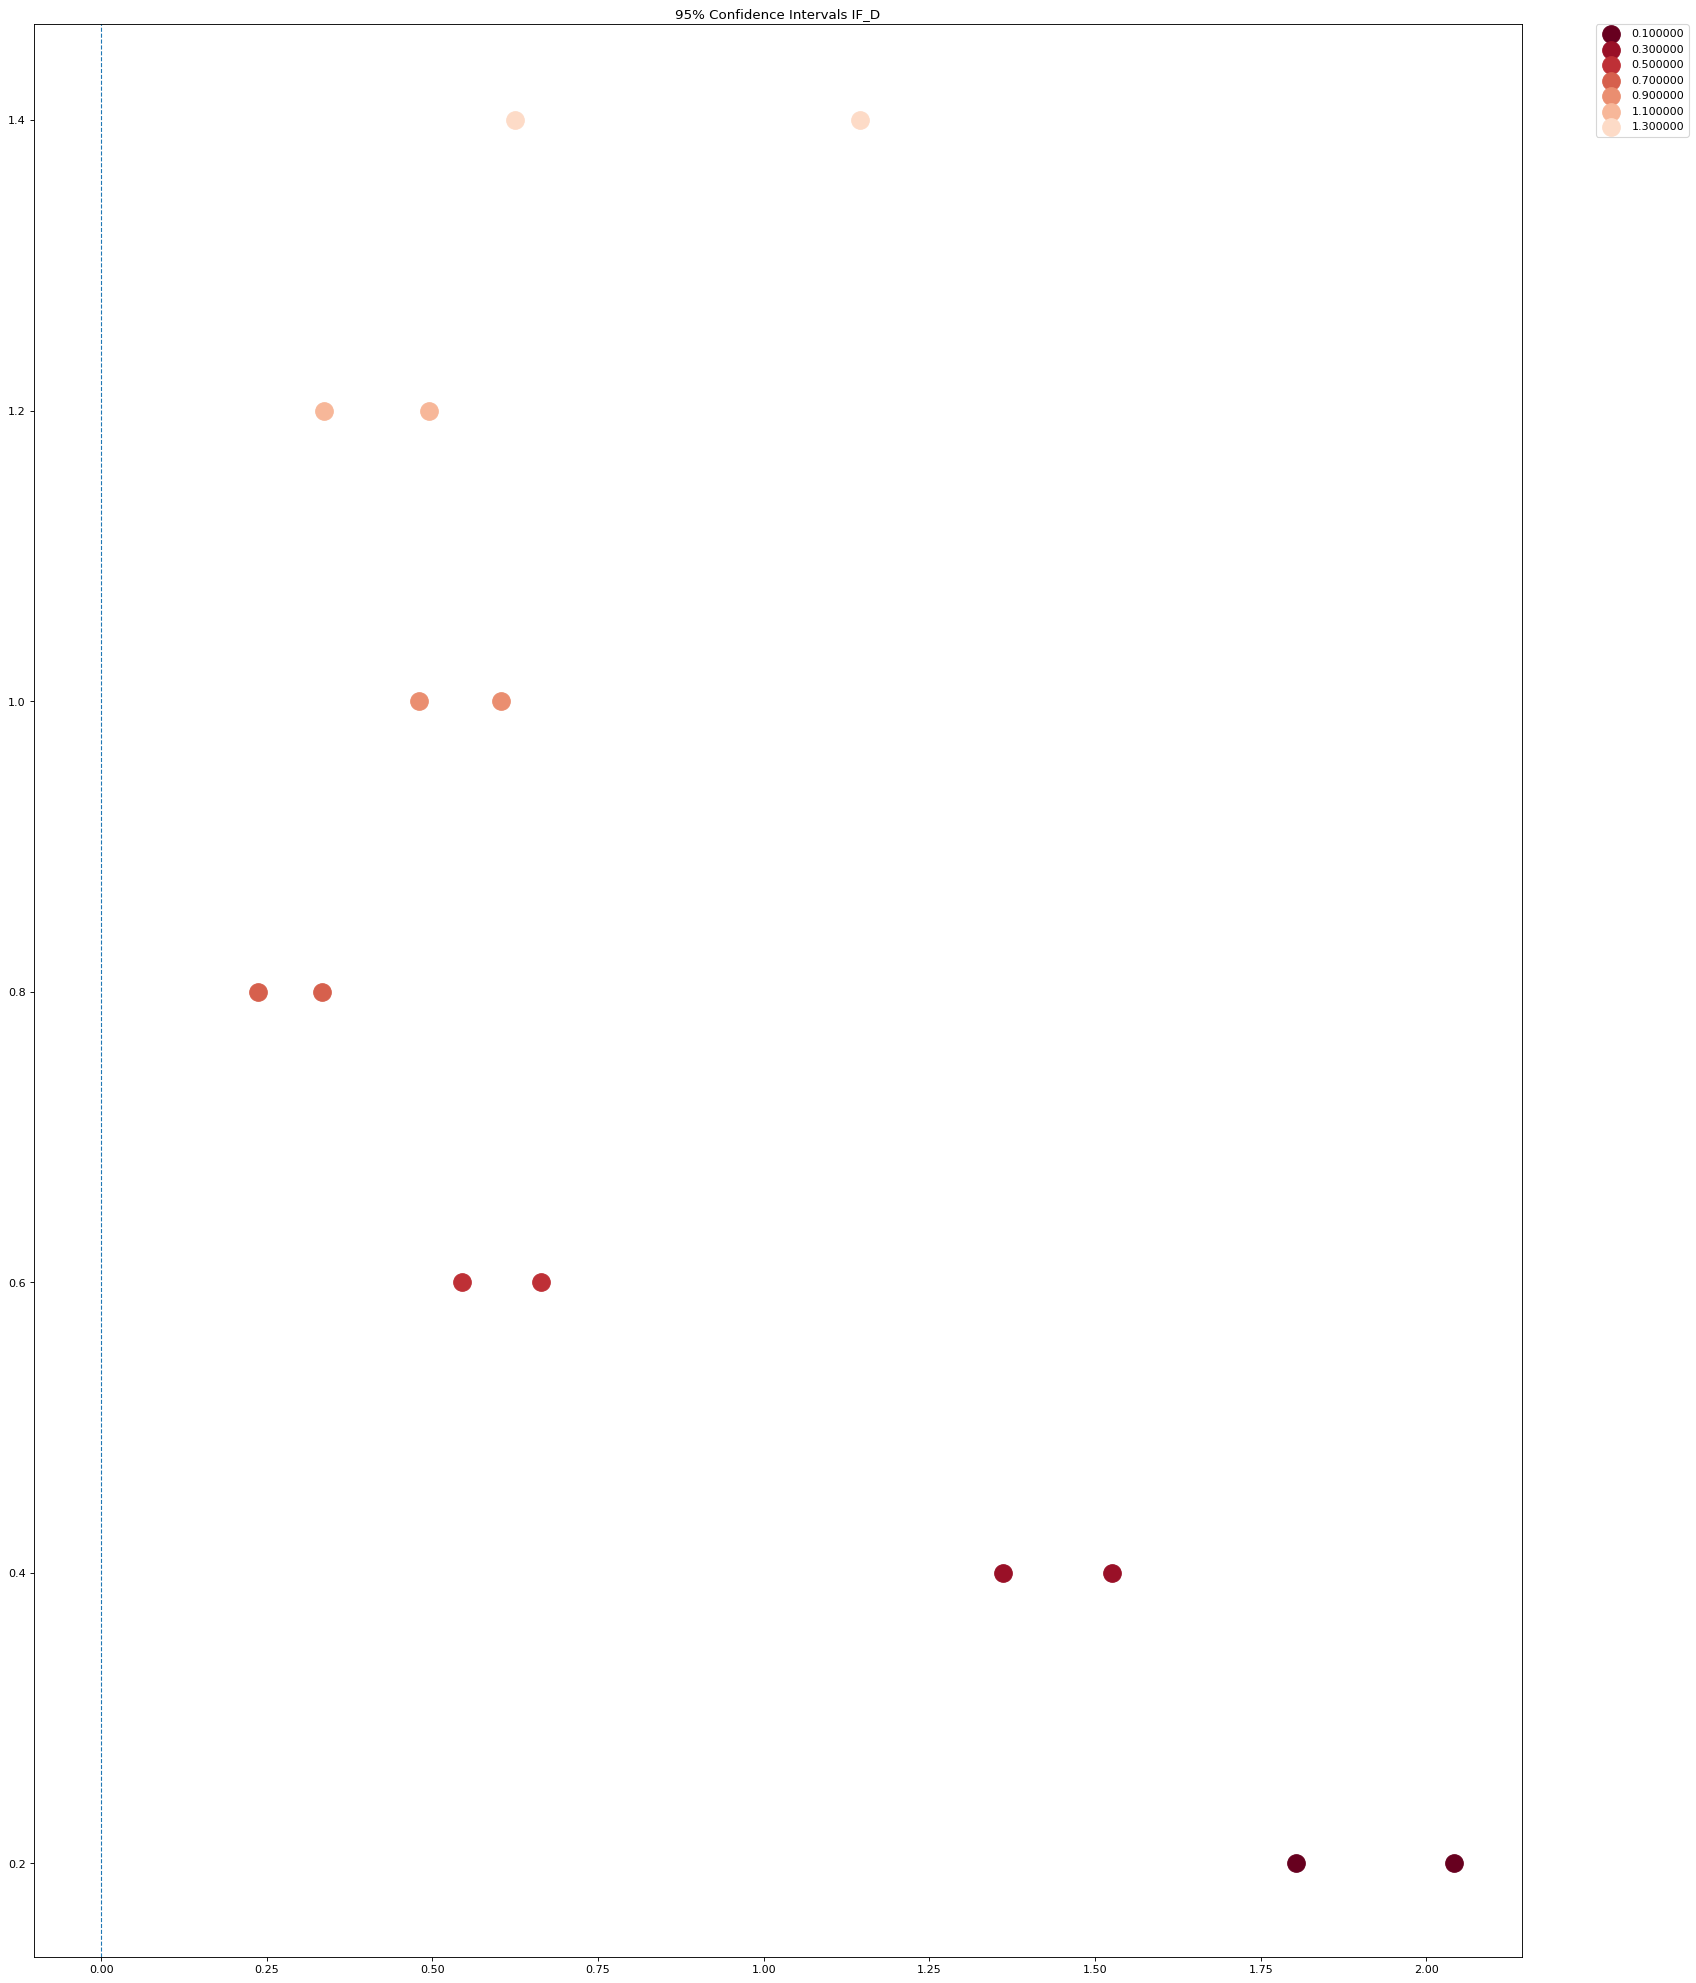

In [11]:
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('VjMag', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals VjMag')   
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('VjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals VjMag')  
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = mags[low_filter]
    high_red = mags[high_filter]
    b, t, p = get_conf_int('VjMag', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals VjMag')   
plt.show()

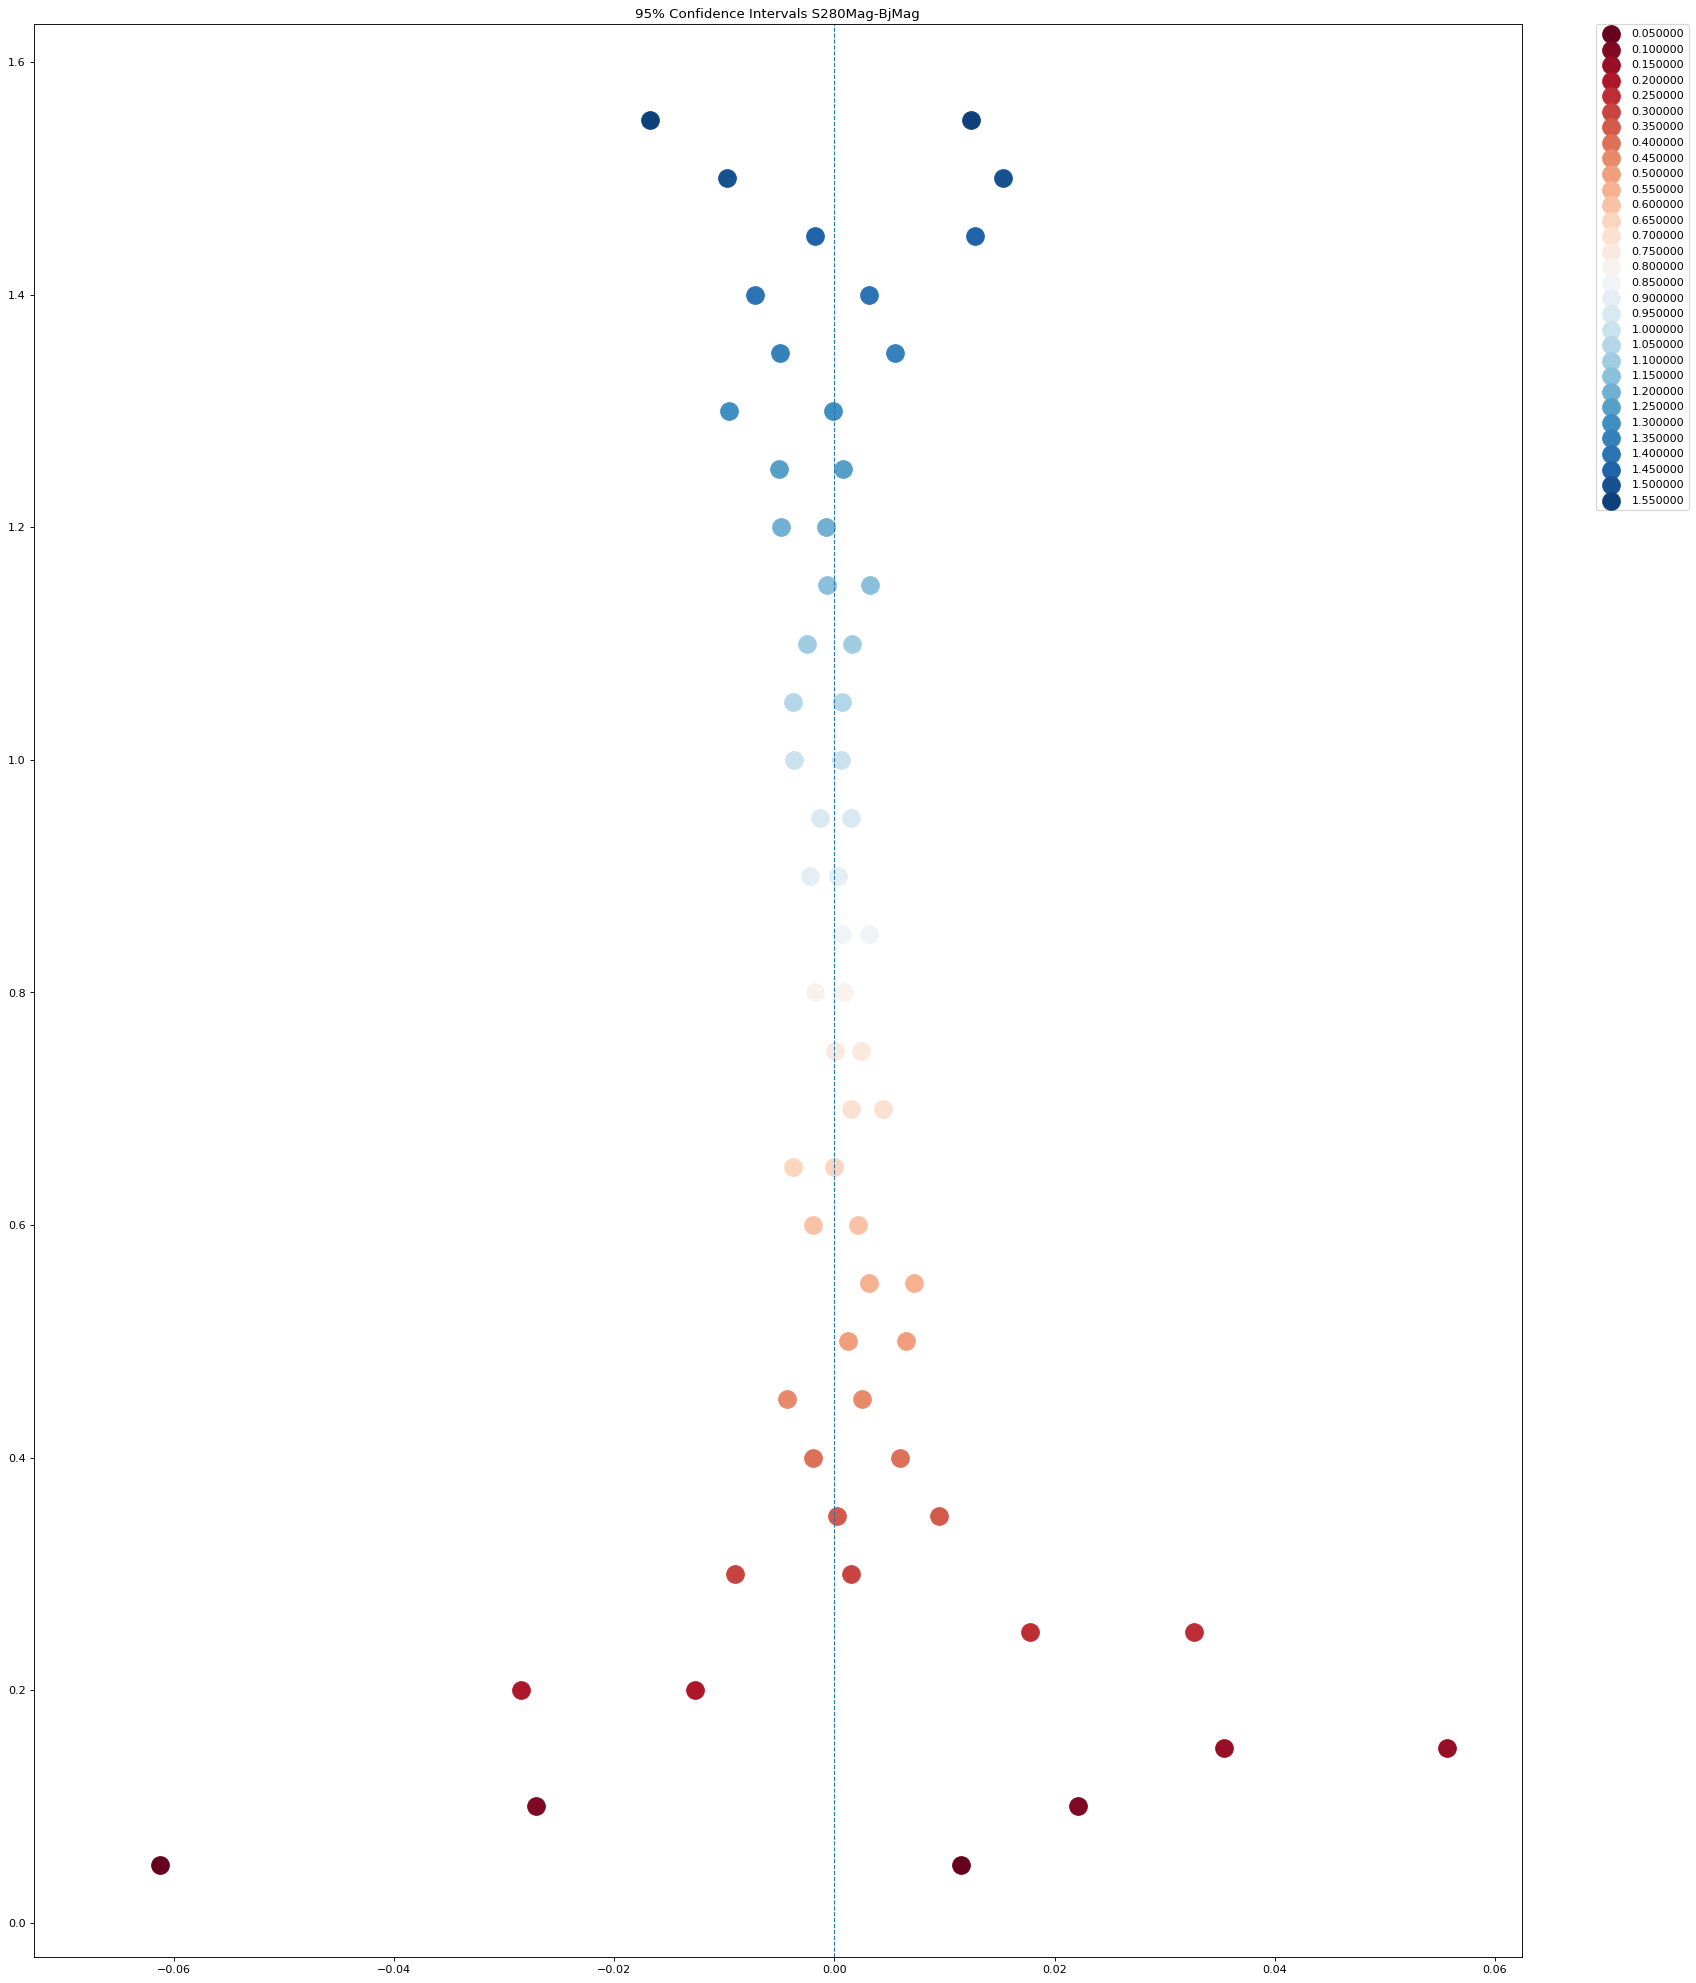

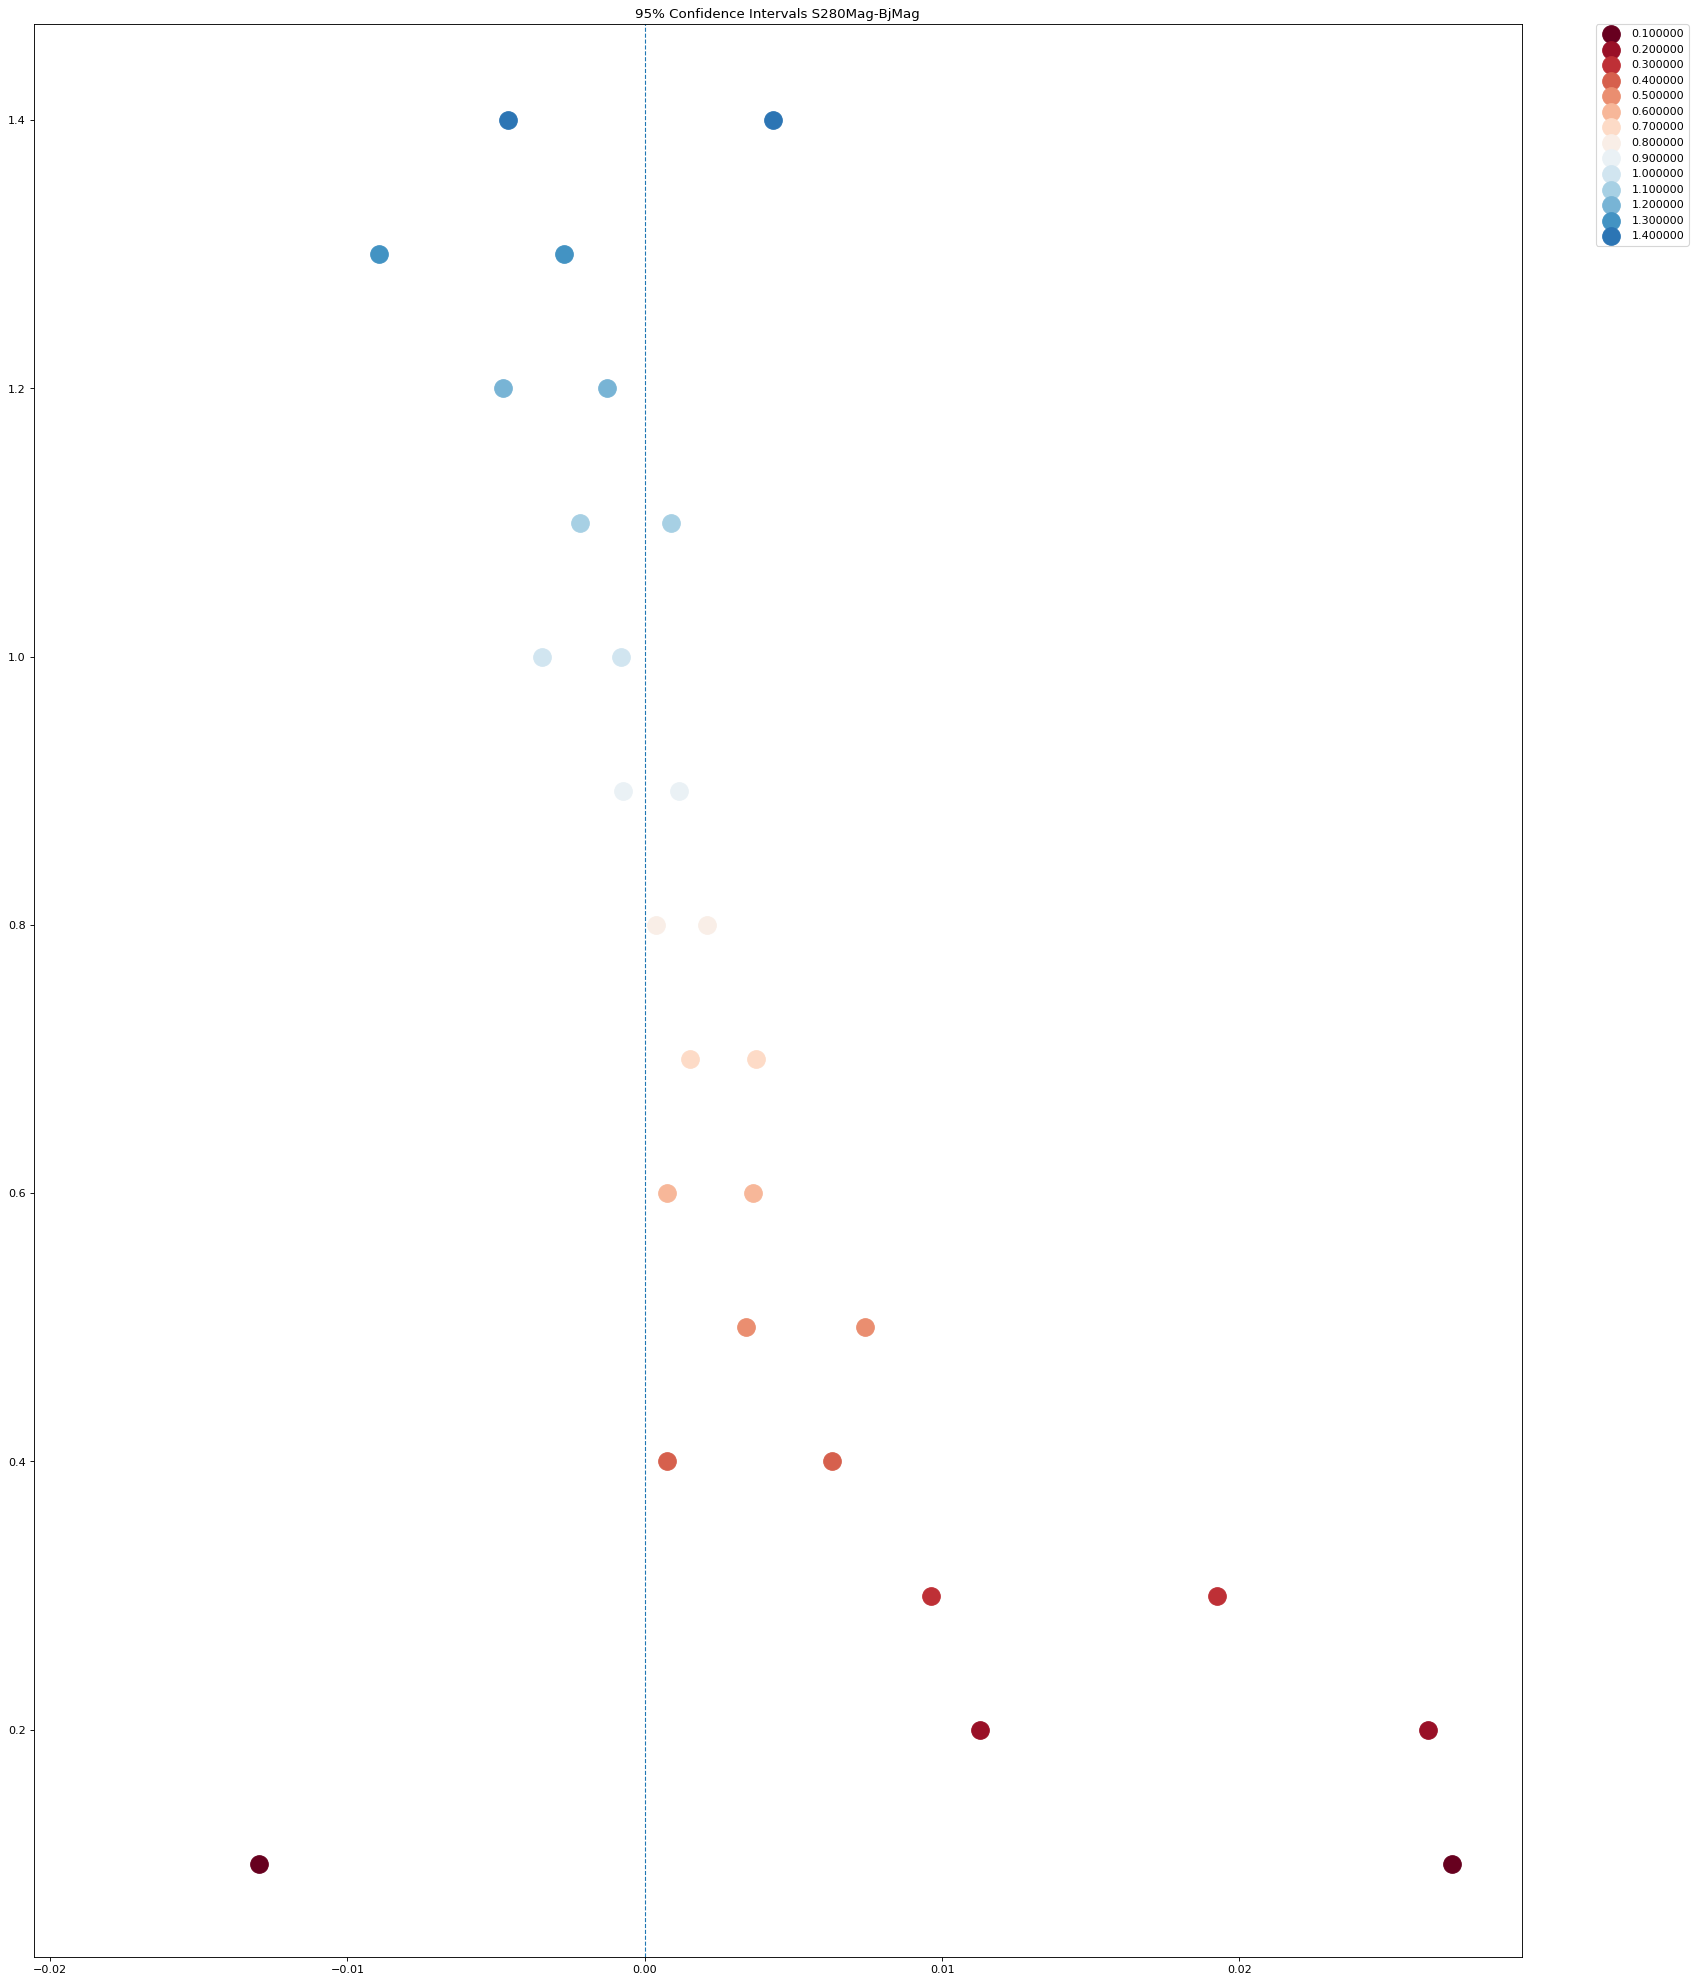

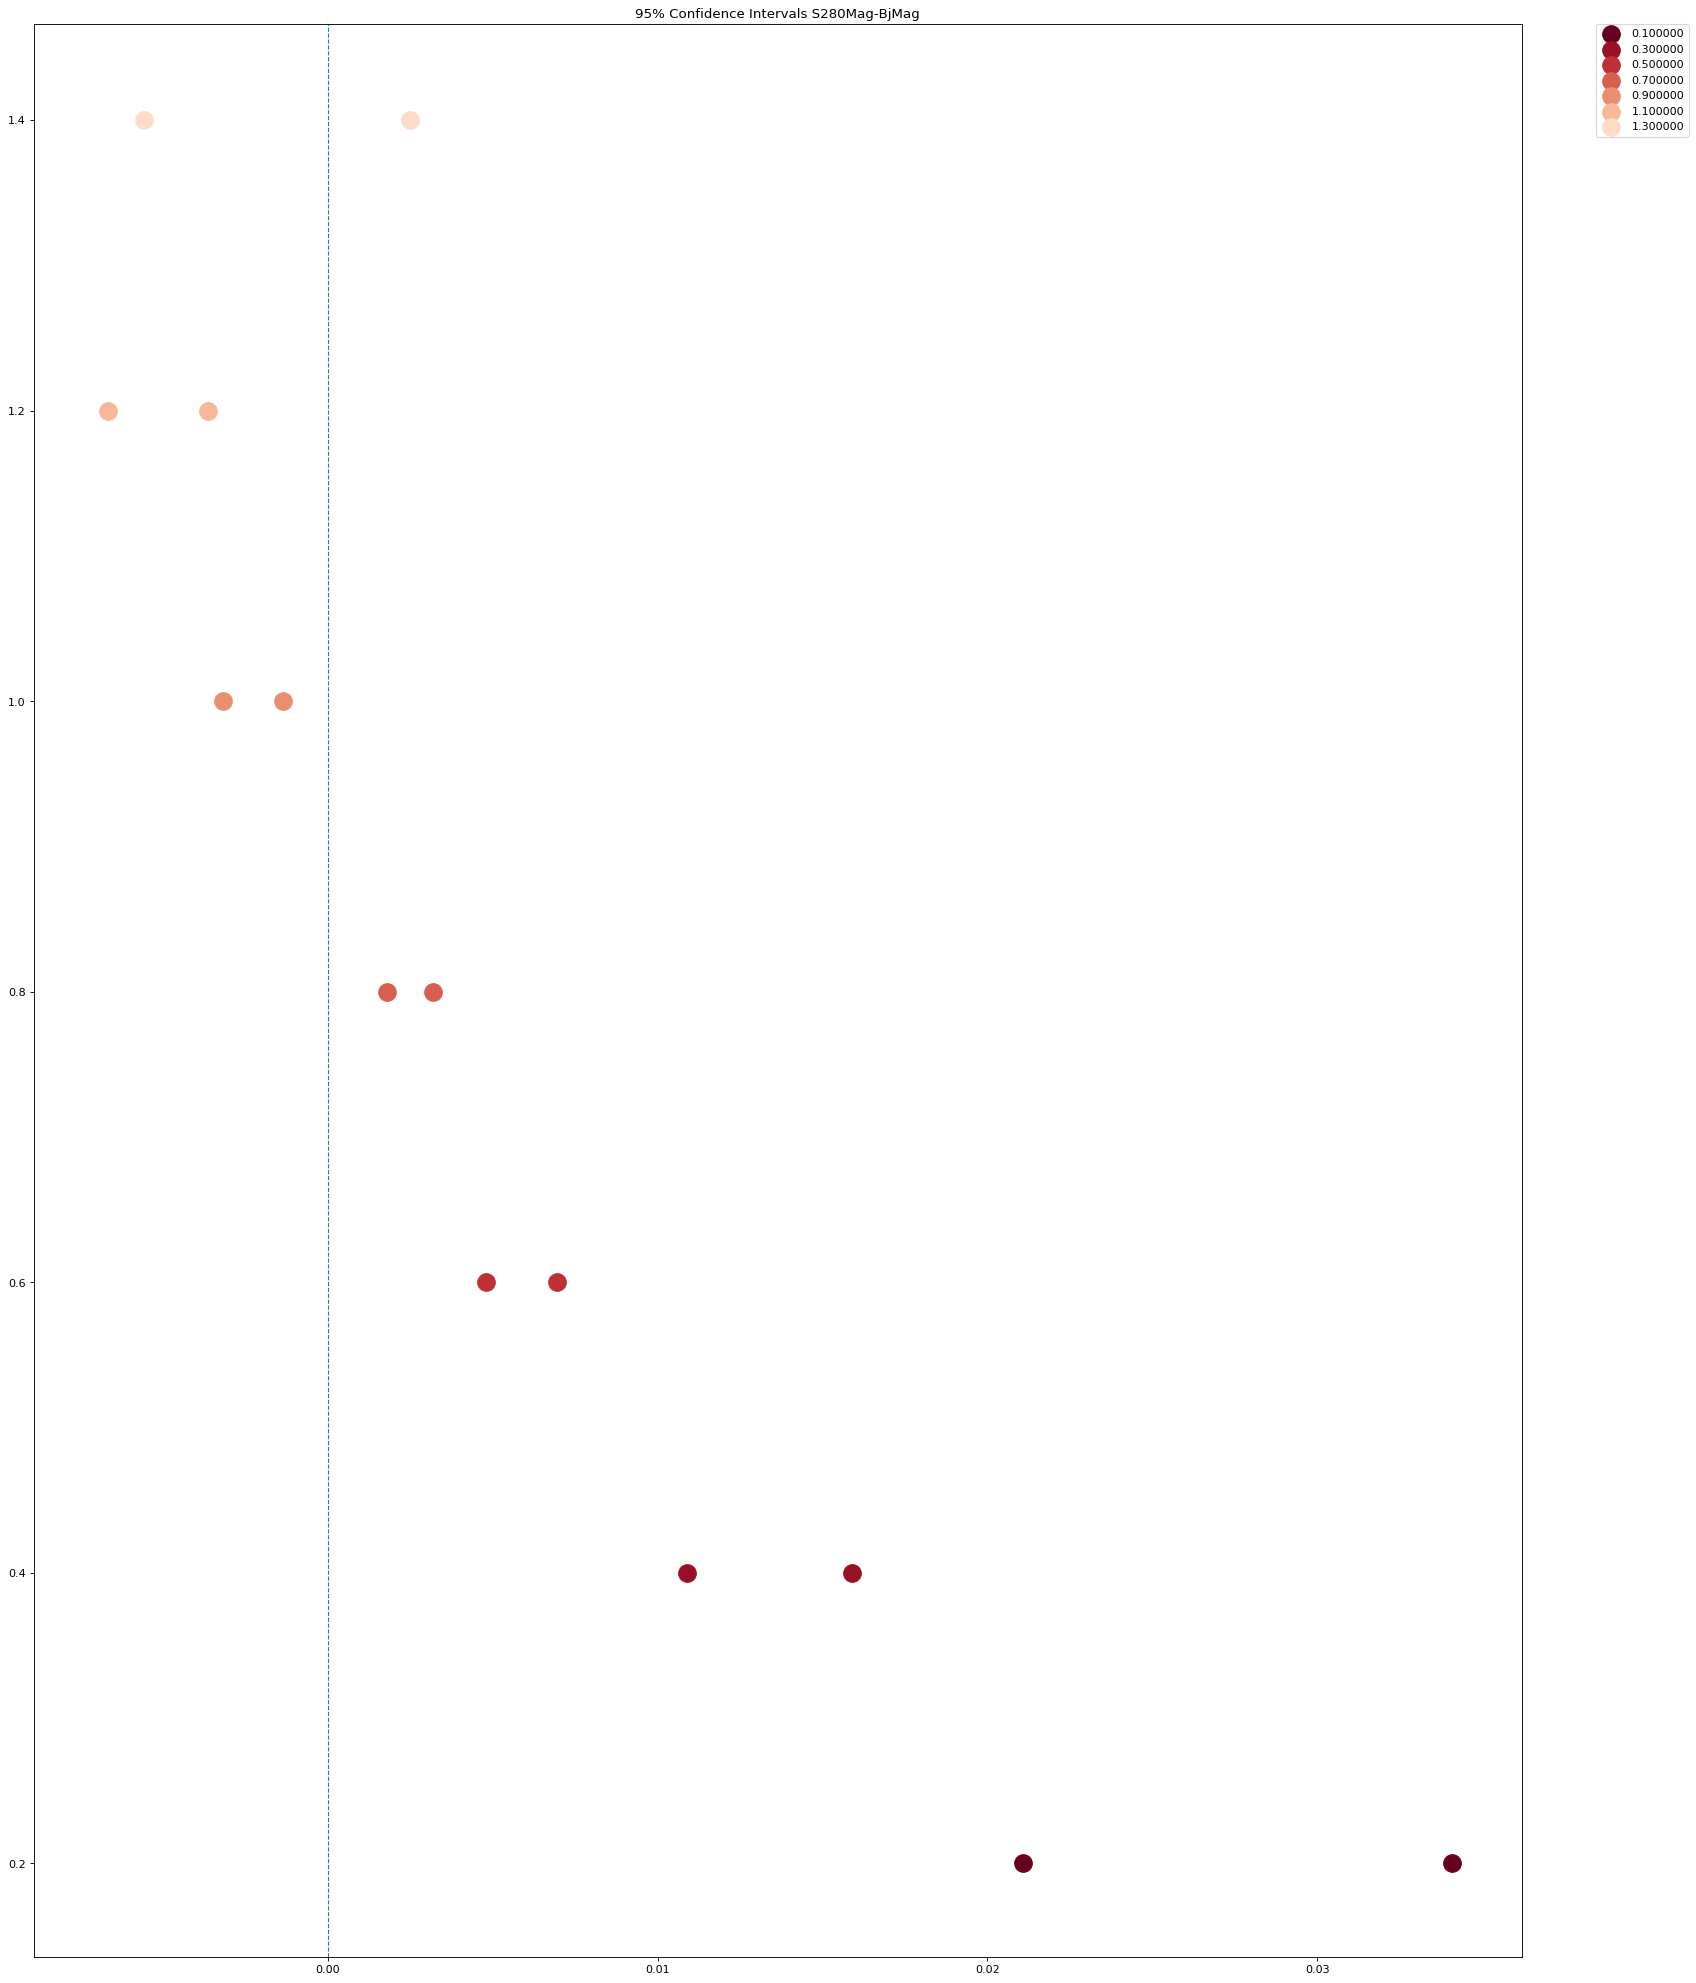

In [43]:
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('W420F_E', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals W420F_E')    
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('W420F_E', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals W420F_E') 
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('W420F_E', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals W420F_E')  
plt.show()

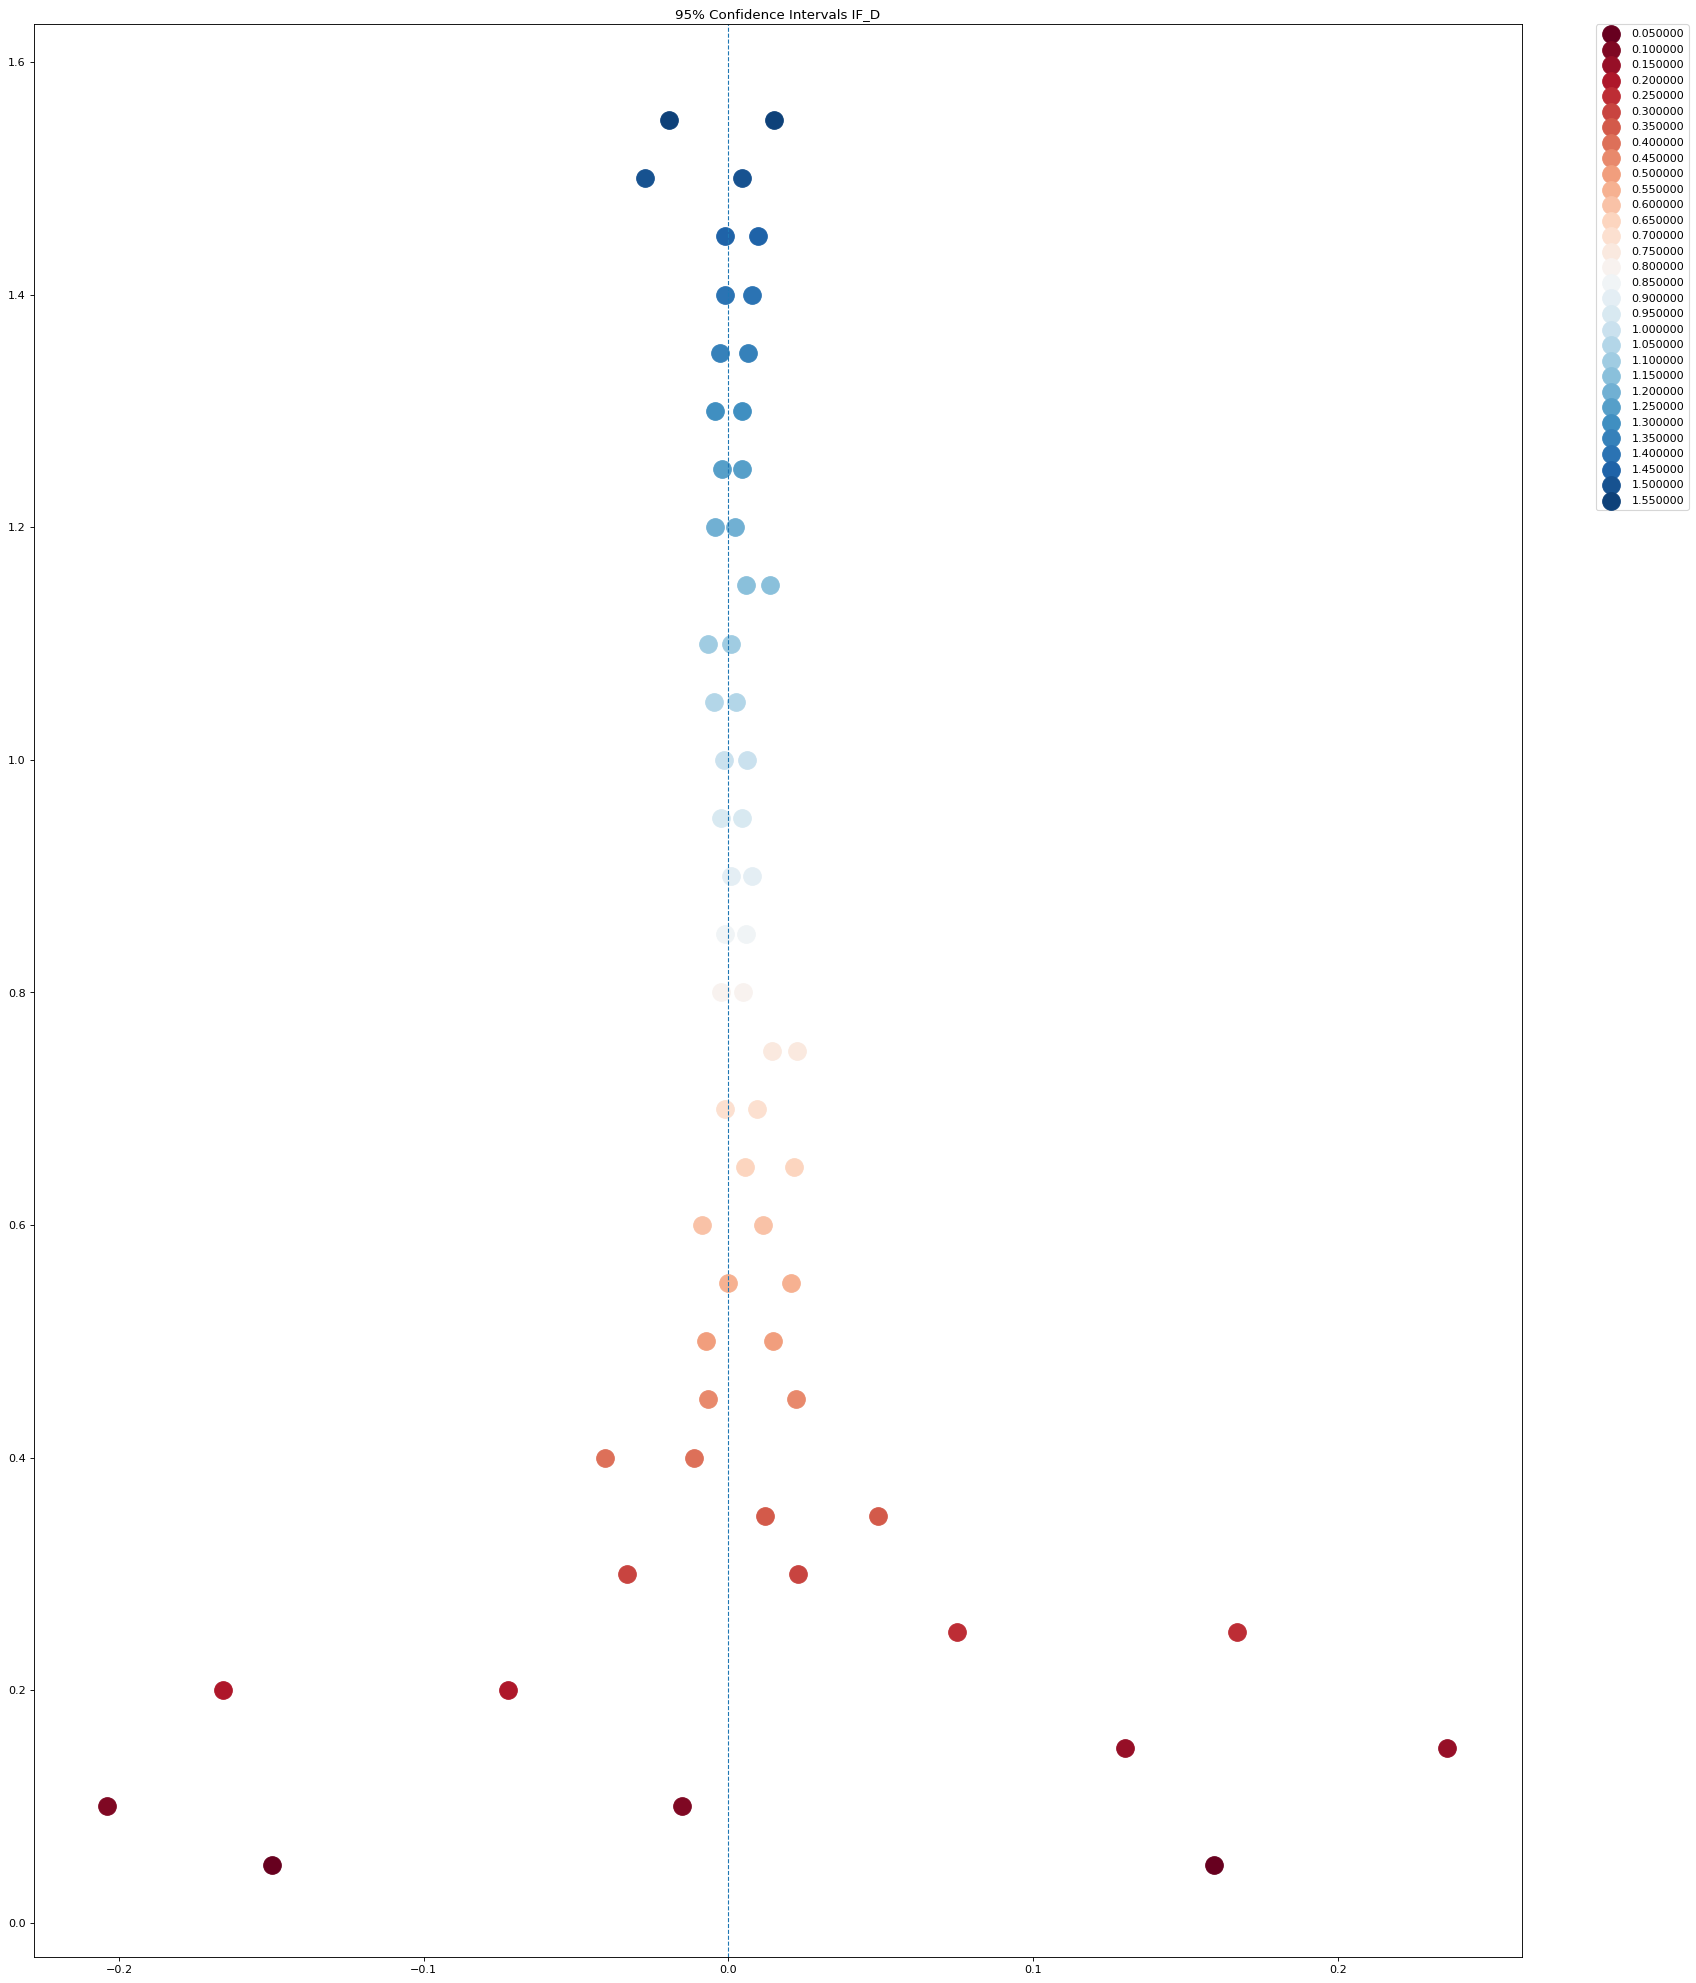

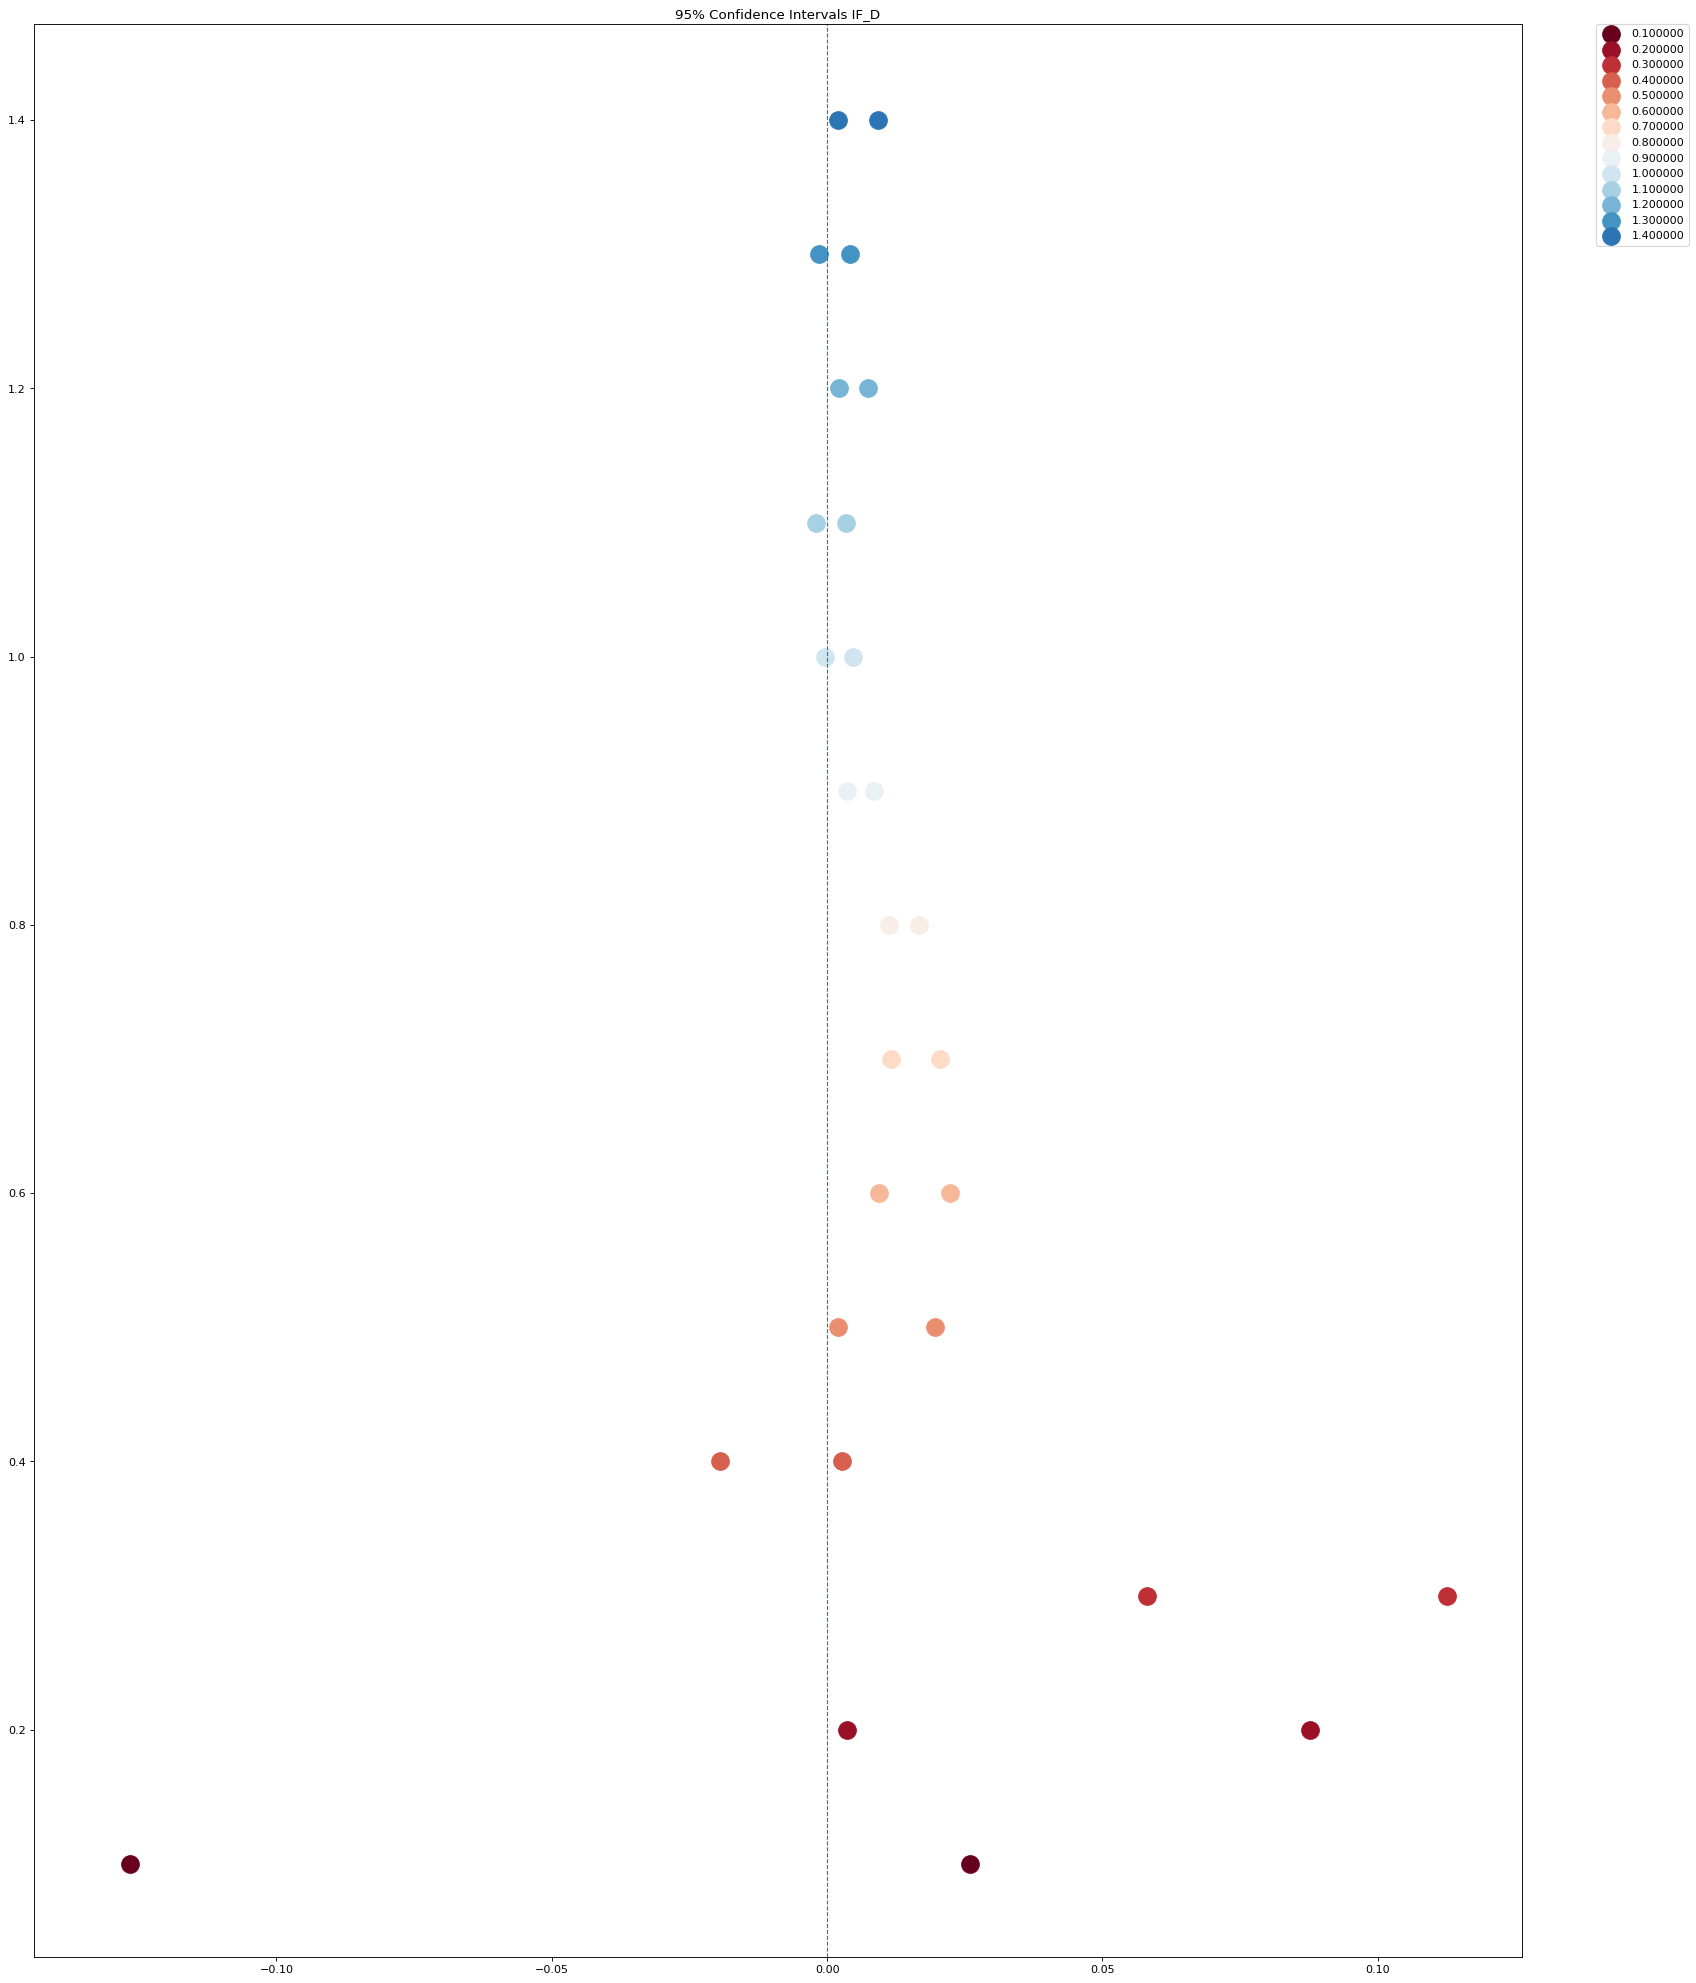

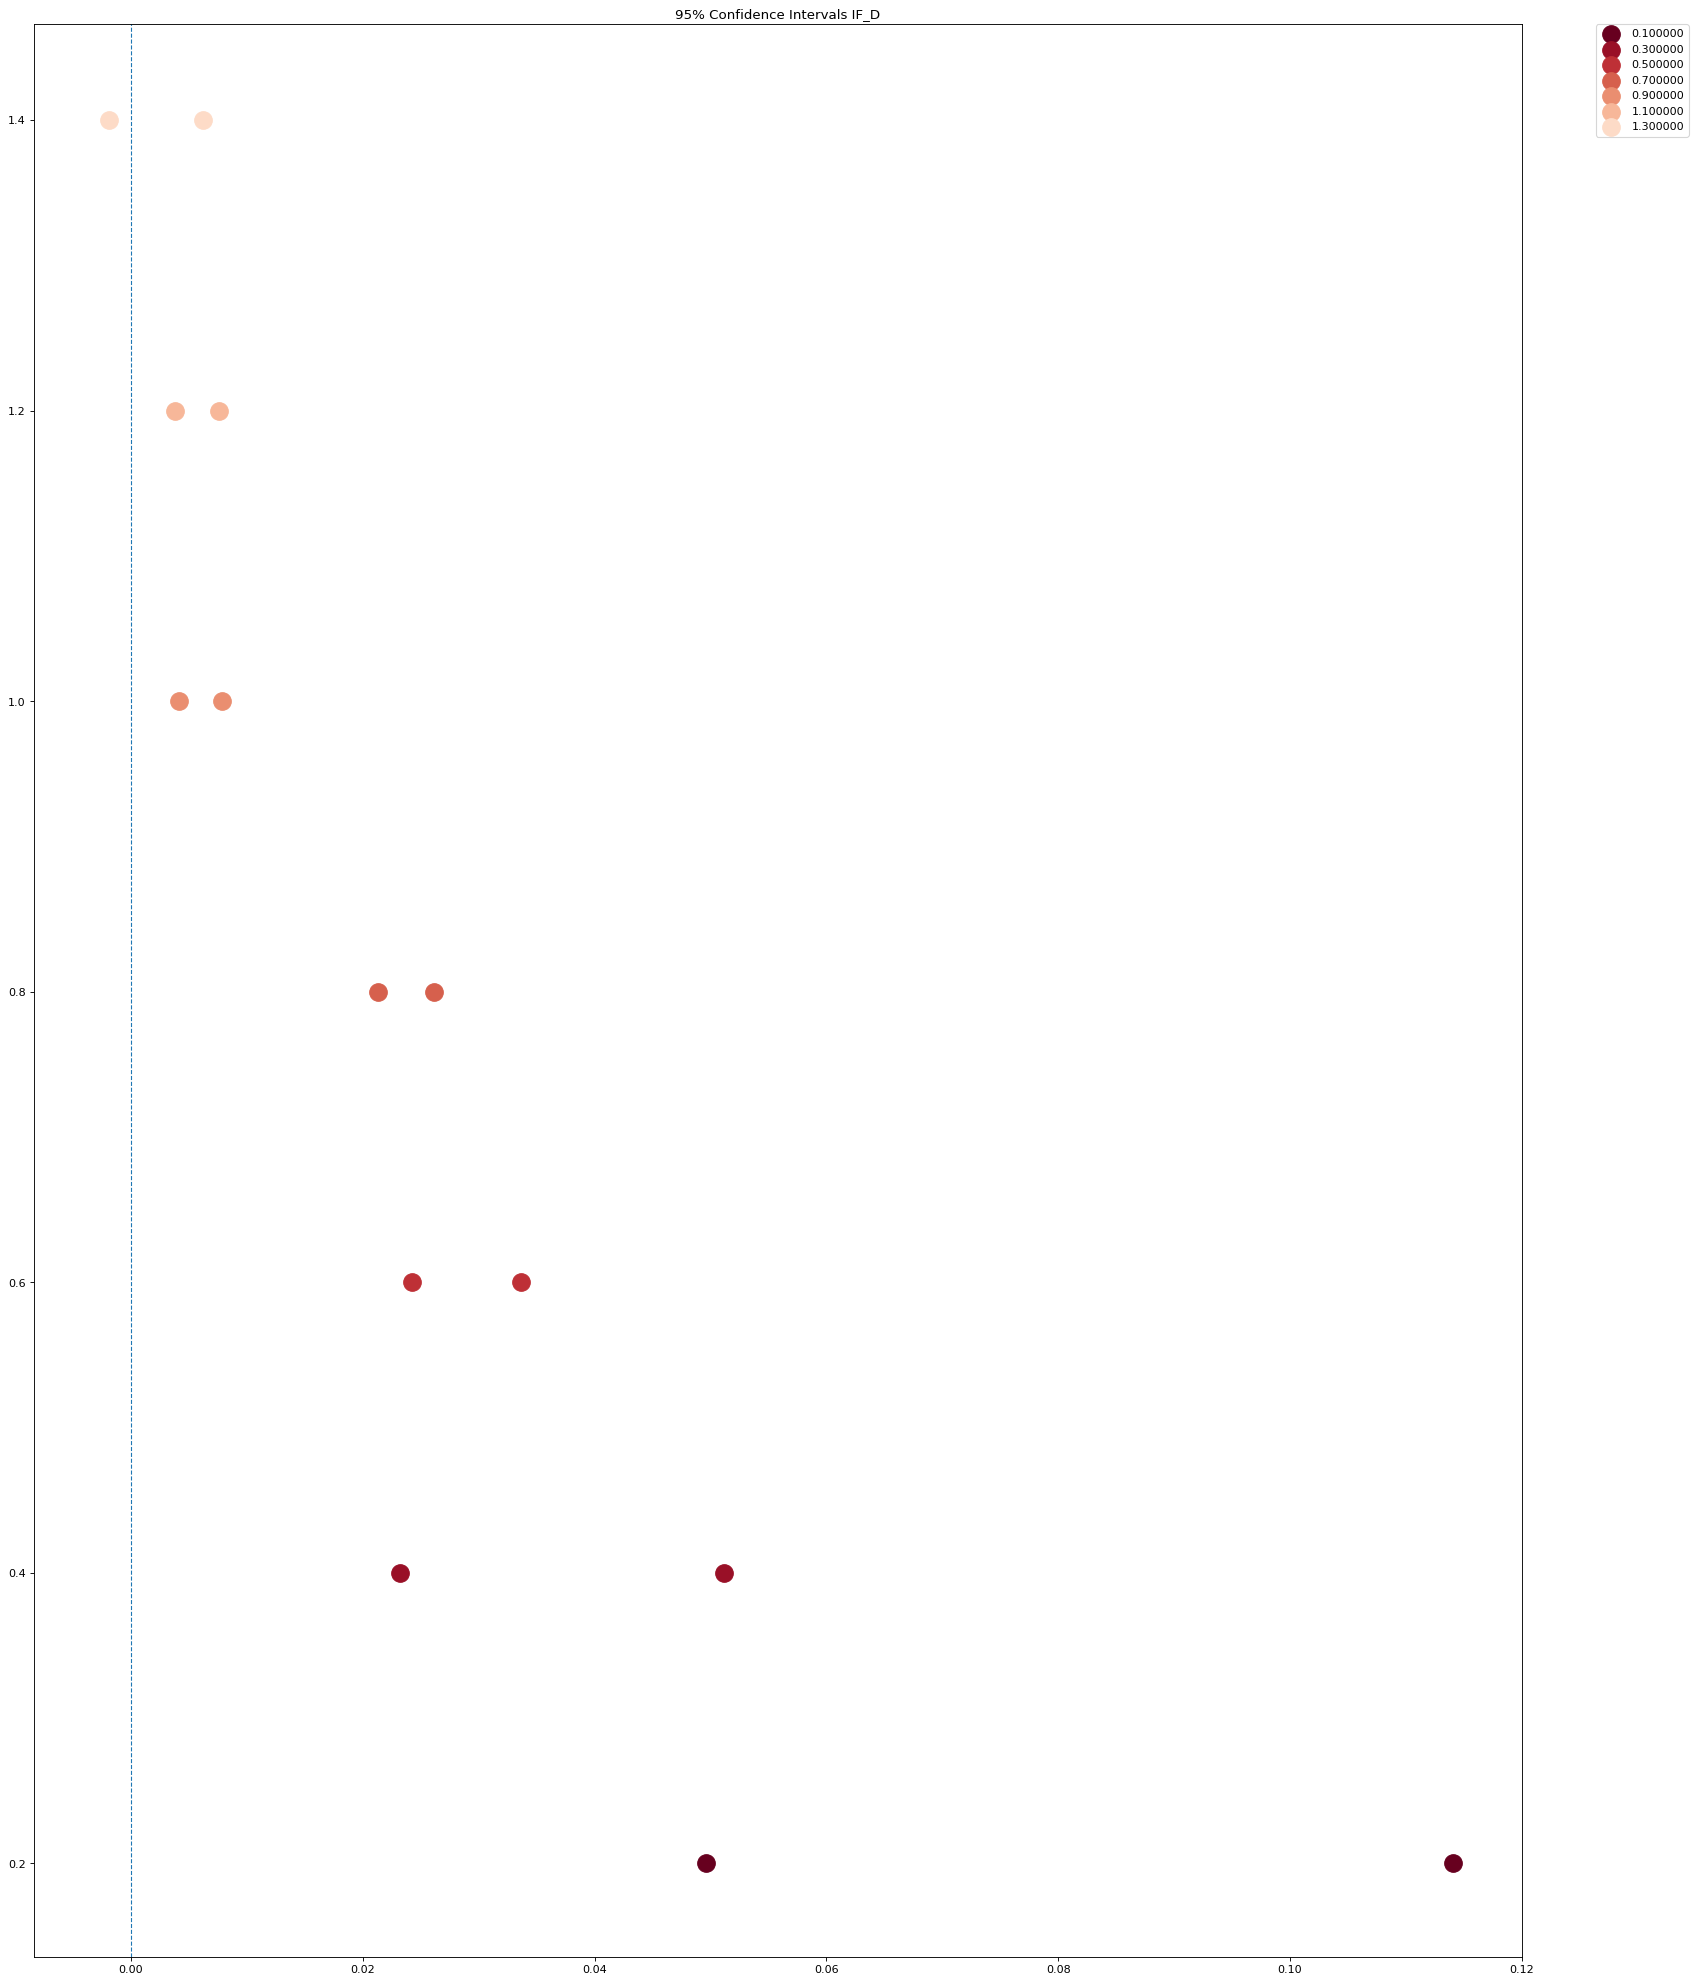

In [13]:
color=iter(plt.cm.RdBu(np.linspace(0,1,32)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,31):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/20)+0.05) & (redshift['MC_z'] >(i/20))
    high_filter = (redshift['MC_z'] > (i/20)+0.05) & (redshift['MC_z'] <= (i/20)+0.1)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('IF_D', low_red, high_red)
    plt.scatter(b,(i/20)+0.05, color=c, s=250, label='{:1f}'.format((i/20)+0.05))
    plt.scatter(t, (i/20)+0.05,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals IF_D')   
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,14):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.1) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.1) & (redshift['MC_z'] <= (i/10)+0.2)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('IF_D', low_red, high_red)
    plt.scatter(b,(i/10)+0.1, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.1,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals IF_D')  
plt.show()


color=iter(plt.cm.RdBu(np.linspace(0,1,16)))
fig=plt.figure(figsize=(24, 32), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0,13,2):
    c=next(color)
    low_filter = (redshift['MC_z'] <=(i/10)+0.2) & (redshift['MC_z'] >(i/10))
    high_filter = (redshift['MC_z'] > (i/10)+0.2) & (redshift['MC_z'] <= (i/10)+0.4)
    low_red = flux[low_filter]
    high_red = flux[high_filter]
    b, t, p = get_conf_int('IF_D', low_red, high_red)
    plt.scatter(b,(i/10)+0.2, color=c, s=250, label='{:1f}'.format((i/10)+0.1))
    plt.scatter(t, (i/10)+0.2,color=c, s=250)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.axvline(0, linestyle='dashed', linewidth=1)
plt.title('95% Confidence Intervals IF_D')    
plt.show()